In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from sklearn.model_selection import train_test_split

# **Reading Data**

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
#get to know the data
print(df.head())
print(df.shape)

   Unnamed: 0  hemoglobin  hearing(right)  dental caries  fasting blood sugar  \
0           0        16.5               1              0                   94   
1           1        16.2               2              1                  147   
2           2        17.4               1              0                   79   
3           3        15.9               1              1                   91   
4           4        15.4               1              0                   91   

   LDL  height(cm)  weight(kg)  Cholesterol  serum creatinine  Gtp  smoking  
0   75         165          60          172               1.0   27        1  
1  126         165          65          194               1.1   37        0  
2   93         170          75          178               0.8   53        1  
3  102         180          95          180               1.0   30        0  
4   93         165          60          155               0.8   17        1  
(159256, 12)


Splitting the data into train, validation, and test sets

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (127404, 12)
Validation set shape: (15926, 12)
Test set shape: (15926, 12)


# **Univariate Data Analysis**

Target (Smoking) Disribution

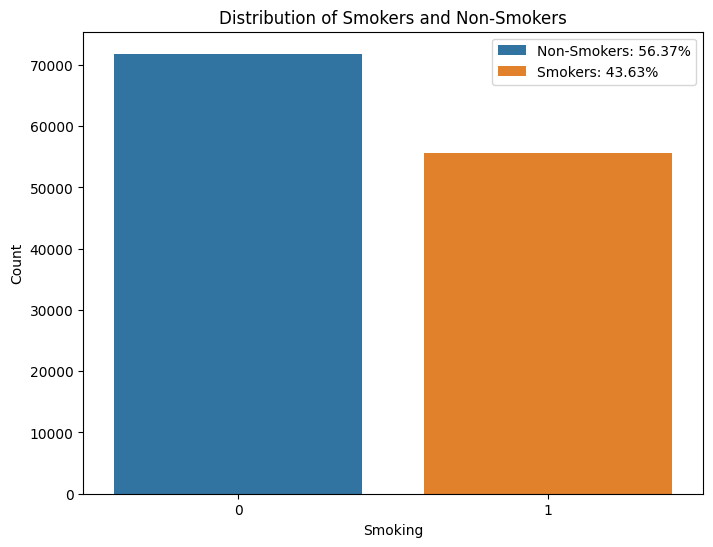

In [9]:
target = train_df[["smoking"]]
num_samples = len(train_df)
smokers_count = len(train_df[train_df["smoking"] == 1])
nonsmokers_count = len(train_df[train_df["smoking"] == 0])
somkers_percentage = 100 * smokers_count/num_samples
nonsmokers_percentage = 100 * nonsmokers_count/num_samples
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking", data=train_df, hue="smoking")
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers')
plt.legend(labels=[f'Non-Smokers: {round(nonsmokers_percentage,2)}%',  f"Smokers: {round(somkers_percentage,2)}%"])

plt.show()

### **Feature 1: hemoglobin**

Observations: 
1- The distribution for hemoglobin is almost gaussian, but is skewed to the left

2- Hemoglobin for smokers is on average higher than for non smokers

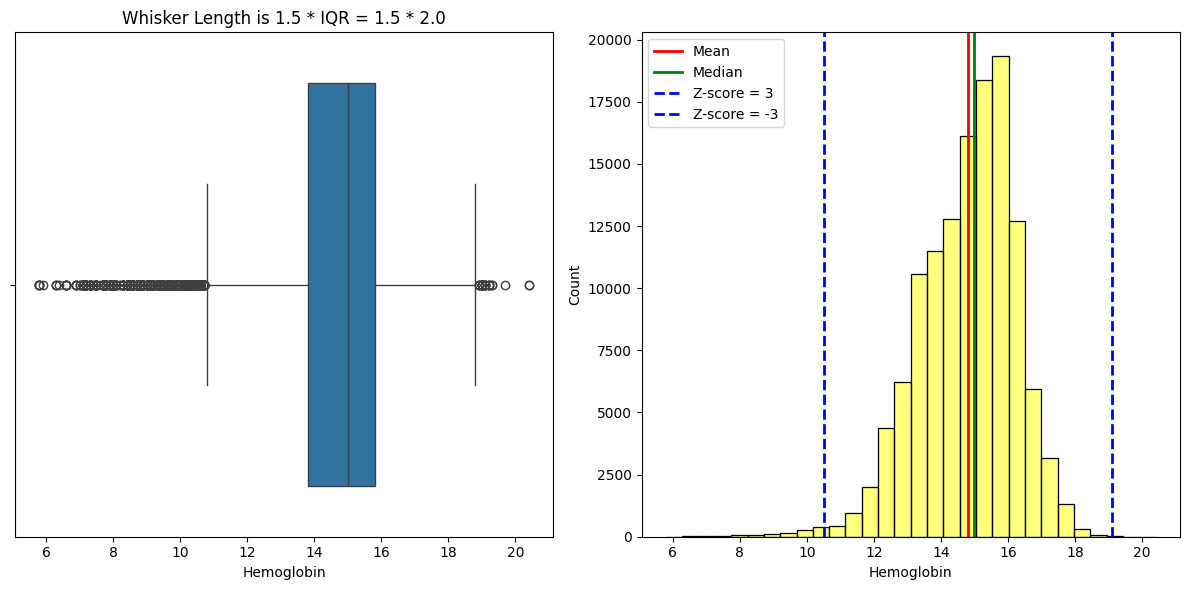

+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |  14.793 |
+--------------------+---------+
| Median             |  15     |
+--------------------+---------+
| Max Value          |  20.4   |
+--------------------+---------+
| Min Value          |   5.8   |
+--------------------+---------+
| Range              |  14.6   |
+--------------------+---------+
| Standard Deviation |   1.432 |
+--------------------+---------+
| Skew               |  -0.637 |
+--------------------+---------+
| IQR                |   2     |
+--------------------+---------+


In [65]:
# Analyzing Hemoglobin Feature without information about the target
hemoglobin_feature = train_df["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

# Create subplots with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature, ax=ax1)
ax1.set_xlabel('Hemoglobin')
ax1.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow", ax=ax2)
ax2.set_xlabel('Hemoglobin')
ax2.set_ylabel('Count')
ax2.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
ax2.axvline(hemoglobin_median, c='green', ls='-', lw=2)
ax2.axvline(z_score_positive3, c='blue', ls='--', lw=2)
ax2.axvline(z_score_negative3, c='blue', ls='--', lw=2)
ax2.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Tabulate the statistics
table = [
    ["Mean", round(hemoglobin_mean, 3)],
    ["Median", round(hemoglobin_median, 3)],
    ["Max Value", round(hemoglobin_max_val, 3)],
    ["Min Value", round(hemoglobin_min_val, 3)],
    ["Range", round(hemoglobin_range, 3)],
    ["Standard Deviation", round(hemoglobin_std, 3)],
    ["Skew", round(hemoglobin_skew, 3)],
    ["IQR", round(hemoglobin_iqr, 3)]
]

print(tabulate(table, headers=["Statistic", "Value"], tablefmt="grid"))



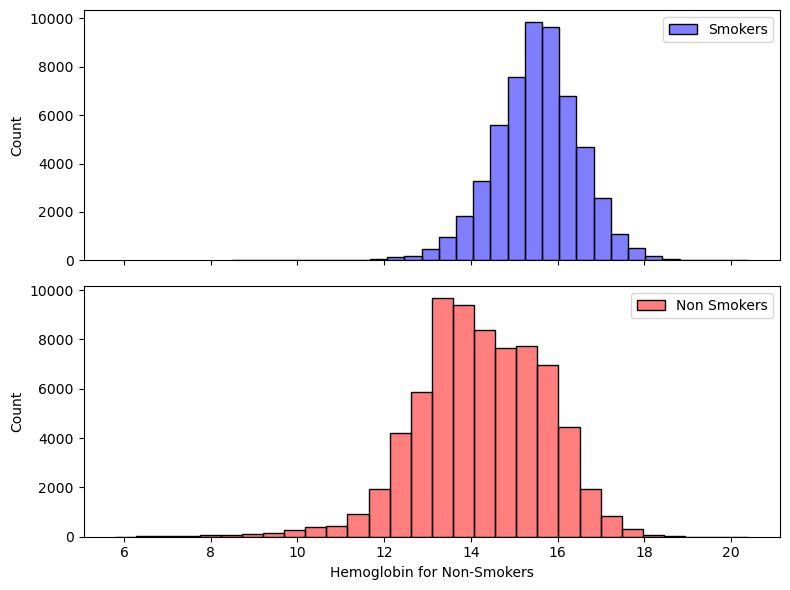

In [20]:
hemoglobin_smokers = train_df[train_df['smoking'] == 1]['hemoglobin']
hemoglobin_nonsmokers = train_df[train_df['smoking'] == 0]['hemoglobin']

# Creating subplots with two histograms stacked vertically for 'Hemoglobin' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=hemoglobin_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('Hemoglobin for Smokers')
ax1.legend()

sns.histplot(data=hemoglobin_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Hemoglobin for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Handling Outliers**

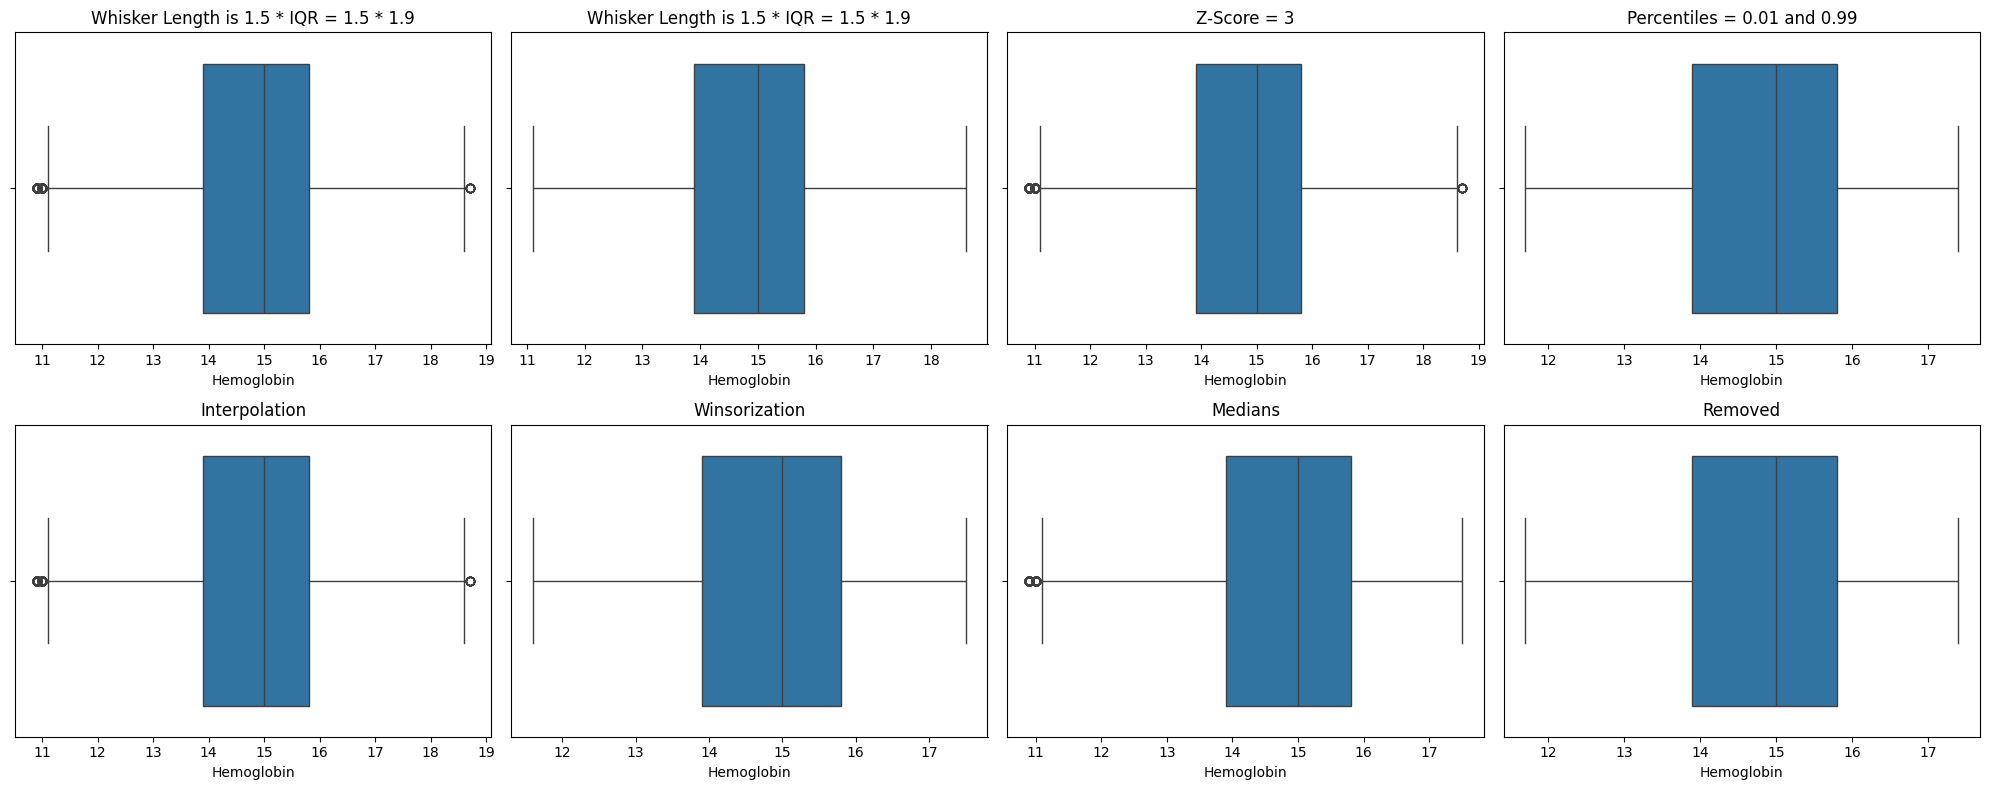

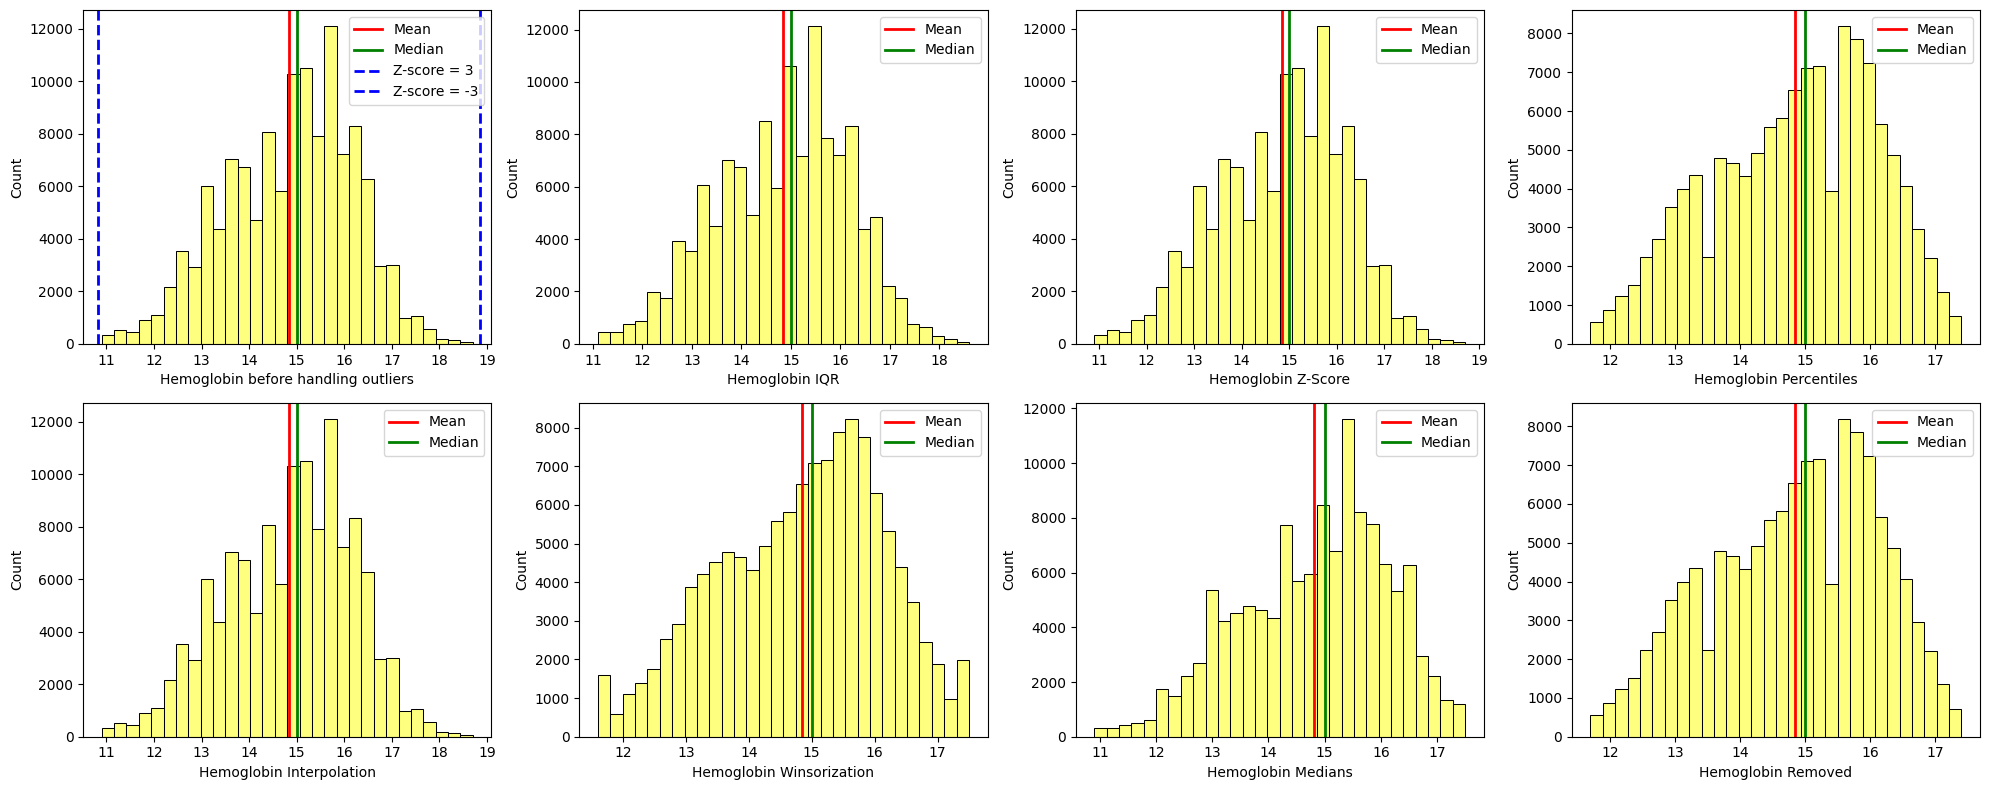

In [105]:
# Handling Outliers using IQR
hemoglobin_q1 = hemoglobin_feature.quantile(0.25)
hemoglobin_q3 = hemoglobin_feature.quantile(0.75)
hemoglobin_iqr = hemoglobin_q3 - hemoglobin_q1
hemoglobin_lower_limit = hemoglobin_q1 - 1.5 * hemoglobin_iqr
hemoglobin_upper_limit = hemoglobin_q3 + 1.5 * hemoglobin_iqr
hemoglobin_feature_IQR = hemoglobin_feature[(hemoglobin_feature > hemoglobin_lower_limit) & (hemoglobin_feature < hemoglobin_upper_limit)]

# Handling Outliers using Z-Score
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_std = hemoglobin_feature.std()
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean
hemoglobin_feature_Z = hemoglobin_feature[(hemoglobin_feature > z_score_negative3) & (hemoglobin_feature < z_score_positive3)]

# Handling Outliers using Percentiles
hemoglobin_lower_limit = hemoglobin_feature.quantile(0.01)
hemoglobin_upper_limit = hemoglobin_feature.quantile(0.99)
hemoglobin_feature_P = hemoglobin_feature[(hemoglobin_feature > hemoglobin_lower_limit) & (hemoglobin_feature < hemoglobin_upper_limit)]

# Handling Outliers using Interpolation
hemoglobin_feature_interpolate = hemoglobin_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
hemoglobin_feature_winsorized = hemoglobin_feature.clip(lower=hemoglobin_lower_limit, upper=hemoglobin_upper_limit)

# Handling Outliers using medians
hemoglobin_feature_median = hemoglobin_feature.copy()
hemoglobin_feature_median[hemoglobin_feature_median > hemoglobin_upper_limit] = hemoglobin_feature.median()

# Handling Outliers by removing them
hemoglobin_feature_removed = hemoglobin_feature[(hemoglobin_feature > hemoglobin_lower_limit) & (hemoglobin_feature < hemoglobin_upper_limit)]

# Create subplots of Outliers before and after handling
# Create subplots of Outliers before and after handling
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Hemoglobin Feature before handling outliers
sns.boxplot(x=hemoglobin_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Hemoglobin')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")

# Box Plot for Hemoglobin Feature after handling outliers using IQR
sns.boxplot(x=hemoglobin_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Hemoglobin')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")

# Box Plot for Hemoglobin Feature after handling outliers using Z-Score
sns.boxplot(x=hemoglobin_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Hemoglobin')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Hemoglobin Feature after handling outliers using Percentiles
sns.boxplot(x=hemoglobin_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Hemoglobin')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Hemoglobin Feature after handling outliers using Interpolation
sns.boxplot(x=hemoglobin_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Hemoglobin')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Hemoglobin Feature after handling outliers using Winsorization
sns.boxplot(x=hemoglobin_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Hemoglobin')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Hemoglobin Feature after handling outliers using medians
sns.boxplot(x=hemoglobin_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Hemoglobin')
axes[1, 2].set_title(f"Medians")

# Box Plot for Hemoglobin Feature after handling outliers by removing them
sns.boxplot(x=hemoglobin_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Hemoglobin')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Hemoglobin Feature before handling outliers
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Hemoglobin before handling outliers')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(hemoglobin_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(hemoglobin_median, c='green', ls='-', lw=2)
axes[0, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[0, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Histogram for Hemoglobin Feature after handling outliers using IQR
sns.histplot(hemoglobin_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Hemoglobin IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(hemoglobin_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(hemoglobin_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for Hemoglobin Feature after handling outliers using Z-Score
sns.histplot(hemoglobin_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Hemoglobin Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(hemoglobin_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(hemoglobin_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])

# Histogram for Hemoglobin Feature after handling outliers using Percentiles
sns.histplot(hemoglobin_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Hemoglobin Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(hemoglobin_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(hemoglobin_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for Hemoglobin Feature after handling outliers using Interpolation
sns.histplot(hemoglobin_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Hemoglobin Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(hemoglobin_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(hemoglobin_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for Hemoglobin Feature after handling outliers using Winsorization
sns.histplot(hemoglobin_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Hemoglobin Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(hemoglobin_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(hemoglobin_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for Hemoglobin Feature after handling outliers using medians
sns.histplot(hemoglobin_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Hemoglobin Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(hemoglobin_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(hemoglobin_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for Hemoglobin Feature after handling outliers by removing them
sns.histplot(hemoglobin_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Hemoglobin Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(hemoglobin_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(hemoglobin_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




### **Feature 3: Dental Carries**

Observations:
1- Most Individuals Don't Have Dental Carries

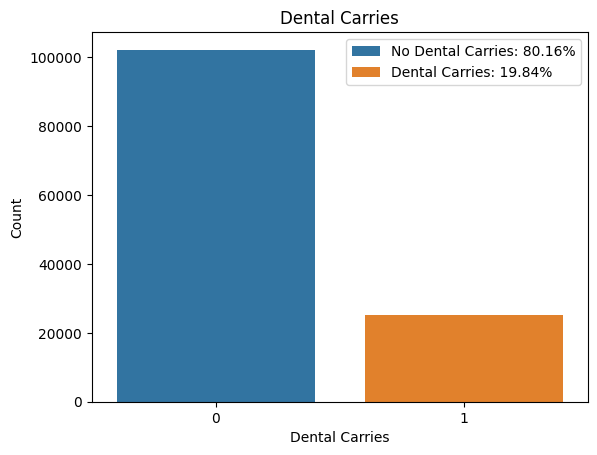

In [74]:
# Analyzing Dental Carries Feature without information about the target
num_samples = len(train_df)
dental_feature = train_df[["dental caries"]]
dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]==1]) / num_samples
no_dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]== 0]) / num_samples



# Histogram for Dental Carries Feature
sns.countplot(x="dental caries", data=train_df, hue="dental caries")
plt.xlabel('Dental Carries')
plt.ylabel('Count')
plt.title('Dental Carries')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage,2)}%',  f"Dental Carries: {round(dental_carries_percentage,2)}%"])
plt.show()





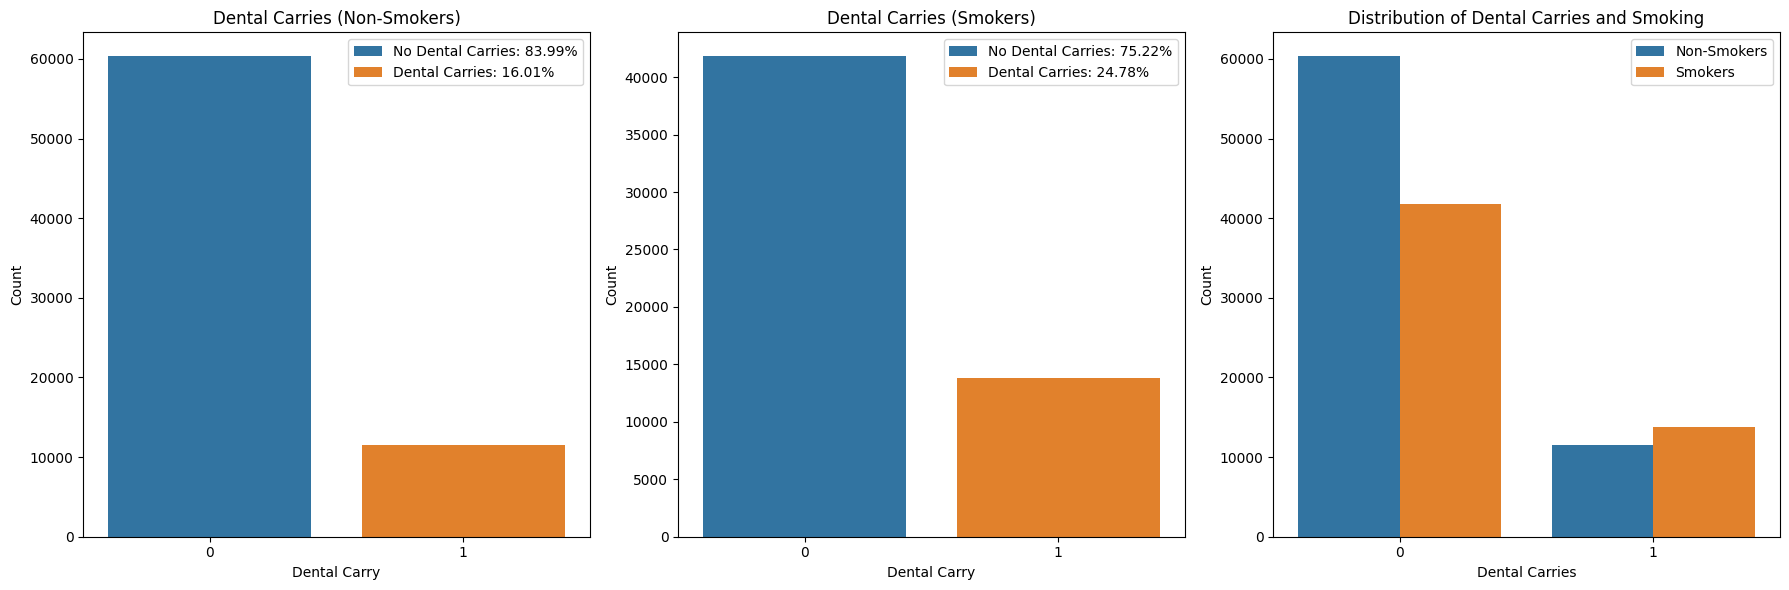

In [76]:
# Analyzing Dental Carries Feature For Non-Smokers
dental_nonsmokers = train_df[train_df["smoking"] == 0][["dental caries"]]
dental_carries_percentage_nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]==1]) / len(dental_nonsmokers)
no_dental_carries_percentage__nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]== 0]) / len(dental_nonsmokers)

# Analyzing Dental Carries Feature For Smokers
dental_smokers = train_df[train_df["smoking"] == 1][["dental caries"]]
dental_carries_percentage_smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]==1]) / len(dental_smokers)
no_dental_carries_percentage__smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]== 0]) / len(dental_smokers)

# Create subplots for Dental Carries histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for Dental Carries For Non Smokers
sns.countplot(x="dental caries", data=dental_nonsmokers, hue="dental caries", ax=axes[0])
axes[0].set_xlabel('Dental Carry')
axes[0].set_ylabel('Count')
axes[0].set_title('Dental Carries (Non-Smokers)')
axes[0].legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__nonsmokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_nonsmokers,2)}%"])

# Histogram for Dental Carries For Smokers
sns.countplot(x="dental caries", data=dental_smokers, hue="dental caries", ax=axes[1])
axes[1].set_xlabel('Dental Carry')
axes[1].set_ylabel('Count')
axes[1].set_title('Dental Carries (Smokers)')
axes[1].legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__smokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_smokers,2)}%"])

# Histogram for Dental Carries with respect to Smoking
sns.countplot(x="dental caries", data=train_df, hue="smoking", ax=axes[2])
axes[2].set_xlabel('Dental Carries')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Dental Carries and Smoking')
axes[2].legend(labels=["Non-Smokers", "Smokers"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **Feature 5: LDL**

Observation: Data Resembles a Gausian Distribution after removing outliers with LDL > 500.
LDL is slightly lower for smokers on average.

+--------------------+----------+
| Statistic          |    Value |
+====================+==========+
| Mean               |  114.625 |
+--------------------+----------+
| Median             |  114     |
+--------------------+----------+
| Max Value          | 1860     |
+--------------------+----------+
| Min Value          |    1     |
+--------------------+----------+
| Range              | 1859     |
+--------------------+----------+
| Standard Deviation |   28.536 |
+--------------------+----------+
| Skew               |    7.89  |
+--------------------+----------+
| IQR                |   38     |
+--------------------+----------+


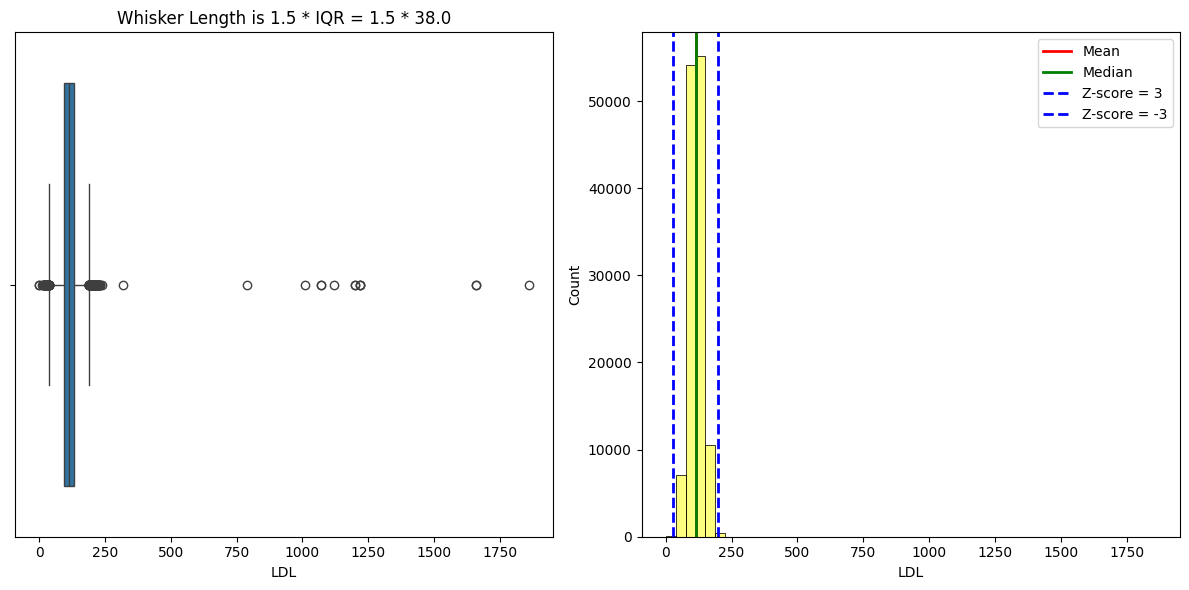

In [77]:
# Analyzing LDL Feature without information about the target
LDL_feature = train_df["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

# Define the statistics
statistics = [
    ["Mean", round(LDL_mean, 3)],
    ["Median", round(LDL_median, 3)],
    ["Max Value", round(LDL_max_val, 3)],
    ["Min Value", round(LDL_min_val, 3)],
    ["Range", round(LDL_range, 3)],
    ["Standard Deviation", round(LDL_std, 3)],
    ["Skew", round(LDL_skew, 3)],
    ["IQR", round(LDL_iqr, 3)]
]

# Tabulate the statistics
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")

# Print the table
print(table)

# Create subplots for Box Plot and Histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature, ax=axes[0])
axes[0].set_xlabel('LDL')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('LDL')
axes[1].set_ylabel('Count')
axes[1].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[1].axvline(LDL_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


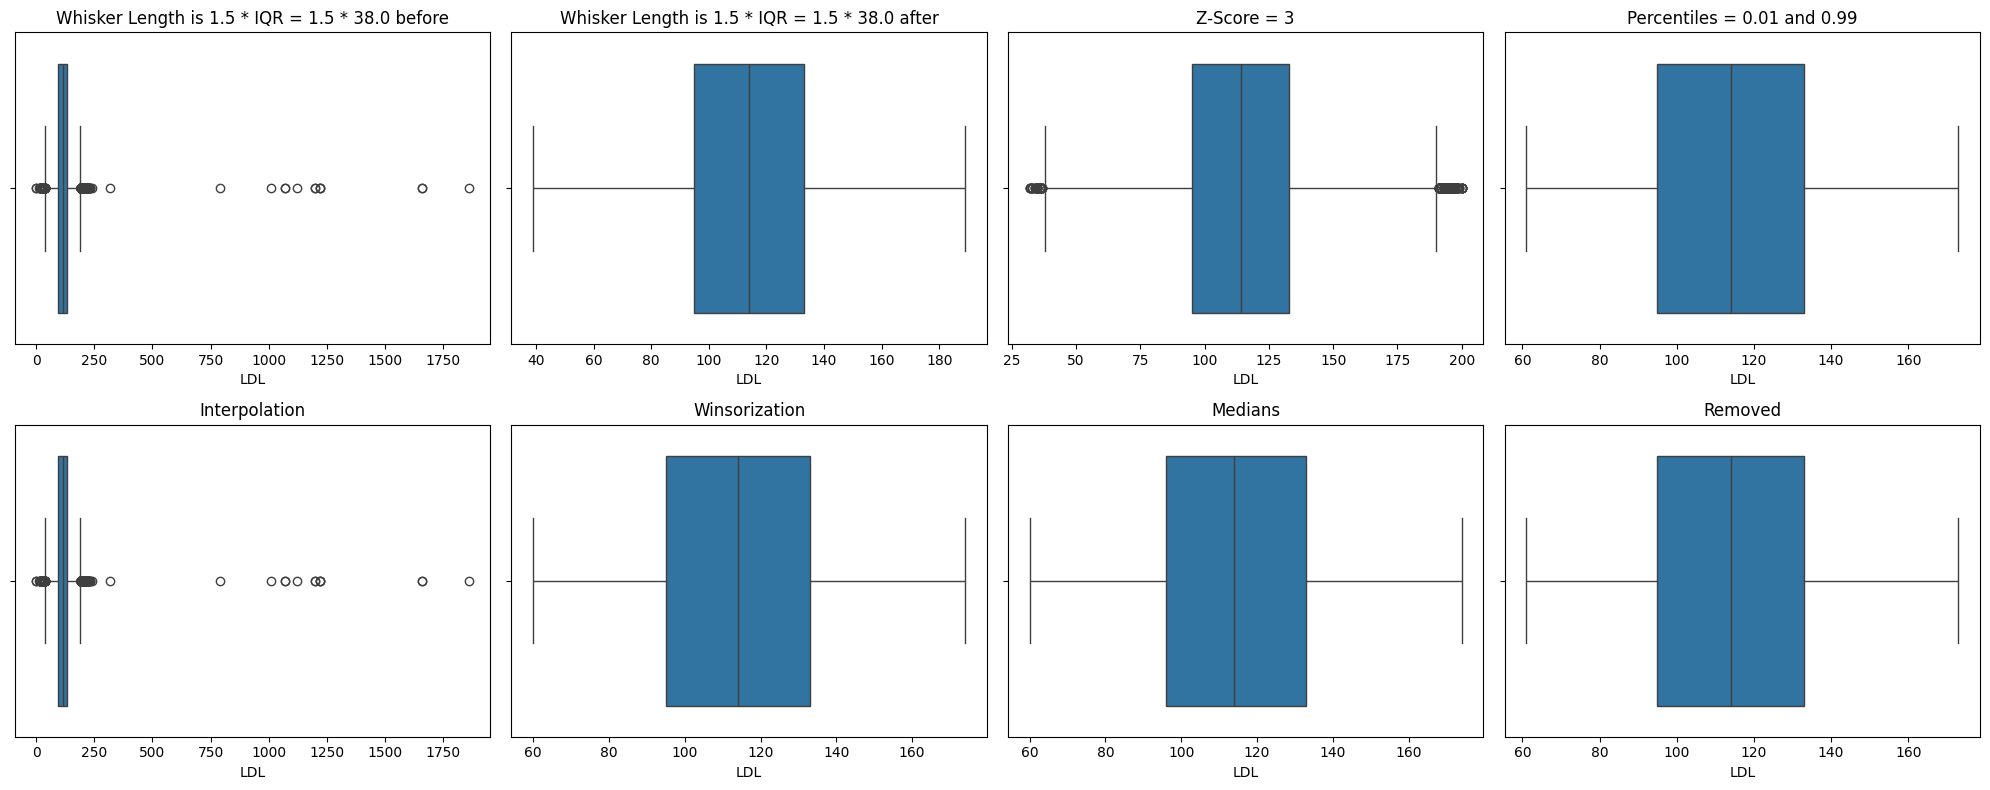

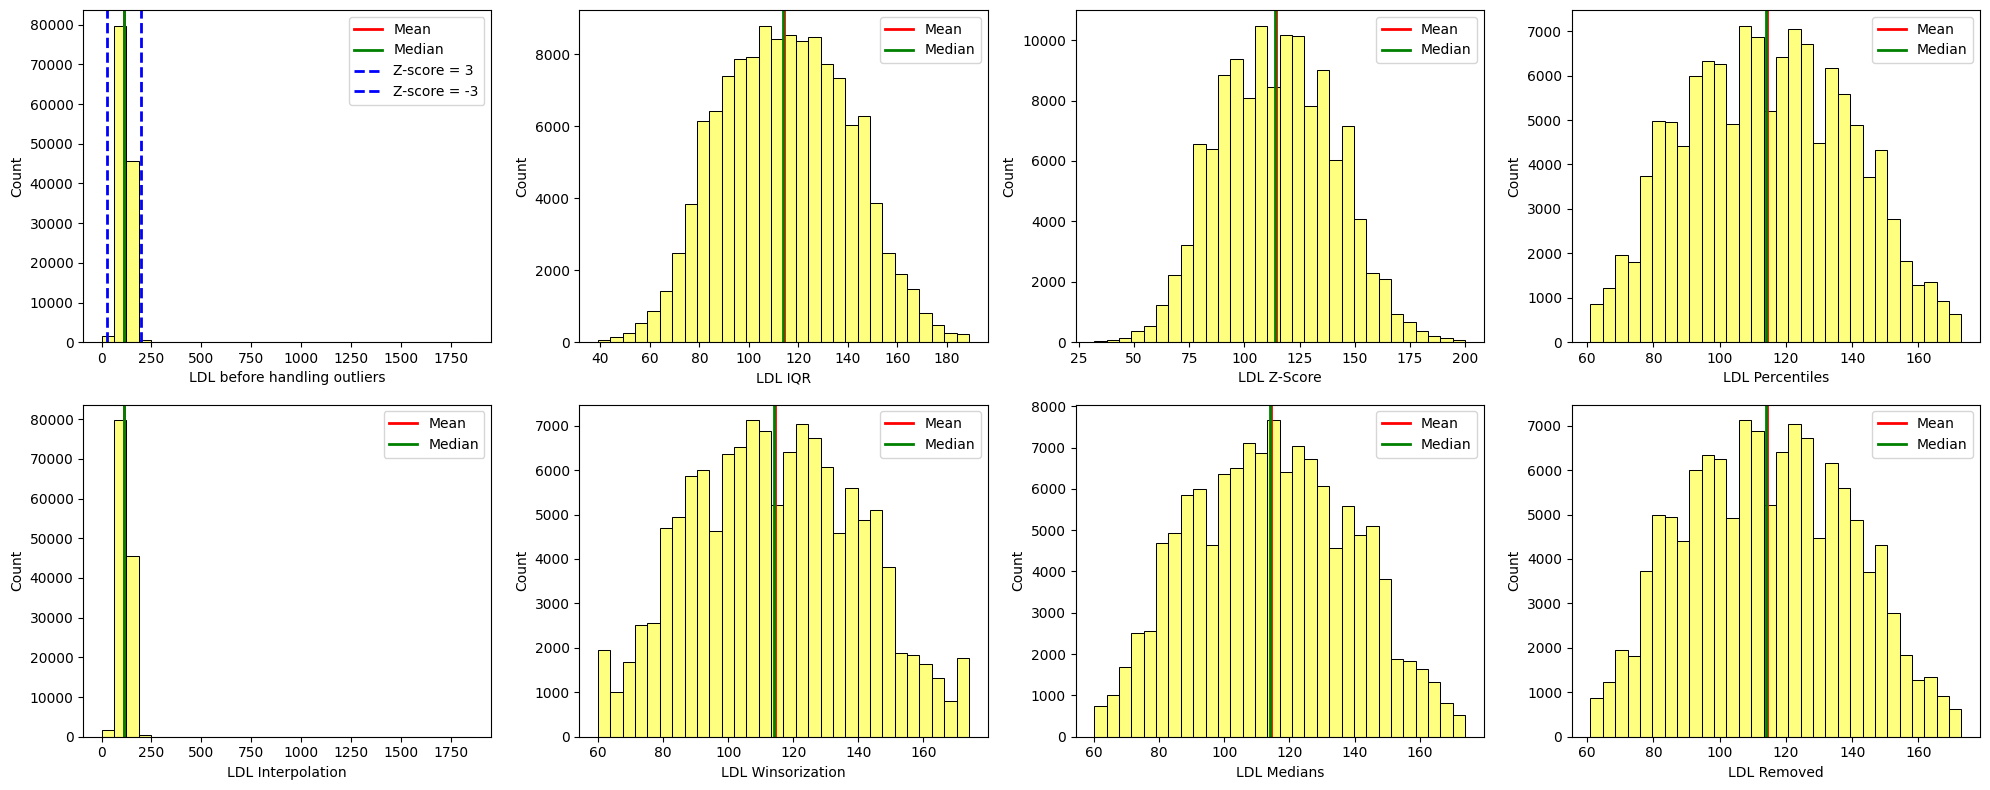

In [104]:
# Handling Outliers using IQR
LDL_q1 = LDL_feature.quantile(0.25)
LDL_q3 = LDL_feature.quantile(0.75)
LDL_iqr = LDL_q3 - LDL_q1
LDL_lower_limit = LDL_q1 - 1.5 * LDL_iqr
LDL_upper_limit = LDL_q3 + 1.5 * LDL_iqr
LDL_feature_IQR = LDL_feature[(LDL_feature > LDL_lower_limit) & (LDL_feature < LDL_upper_limit)]

# Handling Outliers using Z-Score
LDL_mean = LDL_feature.mean()
LDL_std = LDL_feature.std()
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean
LDL_feature_Z = LDL_feature[(LDL_feature > z_score_negative3) & (LDL_feature < z_score_positive3)]

# Handling Outliers using Percentiles
LDL_lower_limit = LDL_feature.quantile(0.01)
LDL_upper_limit = LDL_feature.quantile(0.99)
LDL_feature_P = LDL_feature[(LDL_feature > LDL_lower_limit) & (LDL_feature < LDL_upper_limit)]

# Handling Outliers using Interpolation
LDL_feature_interpolate = LDL_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
LDL_feature_winsorized = LDL_feature.clip(lower=LDL_lower_limit, upper=LDL_upper_limit)

# Handling Outliers using medians
LDL_feature_median = LDL_feature.copy()
LDL_feature_median[LDL_feature_median > LDL_upper_limit] = LDL_feature.median()
LDL_feature_median[LDL_feature_median < LDL_lower_limit] = LDL_feature.median()

# Handling Outliers by removing them
LDL_feature_removed = LDL_feature[(LDL_feature > LDL_lower_limit) & (LDL_feature < LDL_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for LDL Feature before handling outliers
sns.boxplot(x=LDL_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('LDL')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)} before")

# Box Plot for LDL Feature after handling outliers using IQR
sns.boxplot(x=LDL_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('LDL')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)} after")

# Box Plot for LDL Feature after handling outliers using Z-Score
sns.boxplot(x=LDL_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('LDL')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for LDL Feature after handling outliers using Percentiles
sns.boxplot(x=LDL_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('LDL')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for LDL Feature after handling outliers using Interpolation
sns.boxplot(x=LDL_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('LDL')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for LDL Feature after handling outliers using Winsorization
sns.boxplot(x=LDL_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('LDL')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for LDL Feature after handling outliers using medians
sns.boxplot(x=LDL_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('LDL')
axes[1, 2].set_title(f"Medians")

# Box Plot for LDL Feature after handling outliers by removing them
sns.boxplot(x=LDL_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('LDL')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for LDL Feature before handling outliers
sns.histplot(LDL_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('LDL before handling outliers')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(LDL_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(LDL_median, c='green', ls='-', lw=2)
axes[0, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[0, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Histogram for LDL Feature after handling outliers using IQR
sns.histplot(LDL_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('LDL IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(LDL_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(LDL_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Z-Score
sns.histplot(LDL_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('LDL Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(LDL_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(LDL_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Percentiles
sns.histplot(LDL_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('LDL Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(LDL_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(LDL_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Interpolation
sns.histplot(LDL_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('LDL Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(LDL_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(LDL_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using Winsorization
sns.histplot(LDL_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('LDL Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(LDL_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(LDL_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers using medians
sns.histplot(LDL_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('LDL Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(LDL_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(LDL_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for LDL Feature after handling outliers by removing them
sns.histplot(LDL_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('LDL Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(LDL_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(LDL_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Analysis after removing outliers ( LDL > 500)

LDL:
Mean 114.509
Median 114.0
Max Value 318
Min Value 1
Range 317
Standard Deviation 25.953
Skew 0.132
IQR 38.0


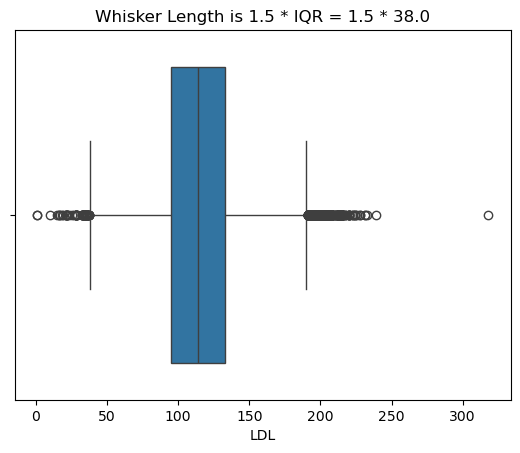

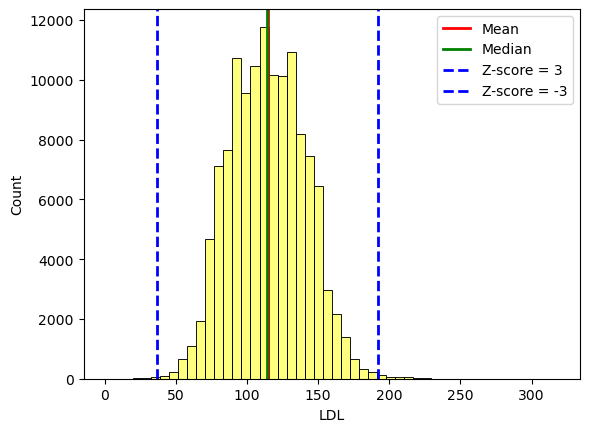

In [24]:
#Analysis After Removing Outliers

# Analyzing LDL Feature without information about the target
LDL_feature = train_df[train_df["LDL"] < 500]["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

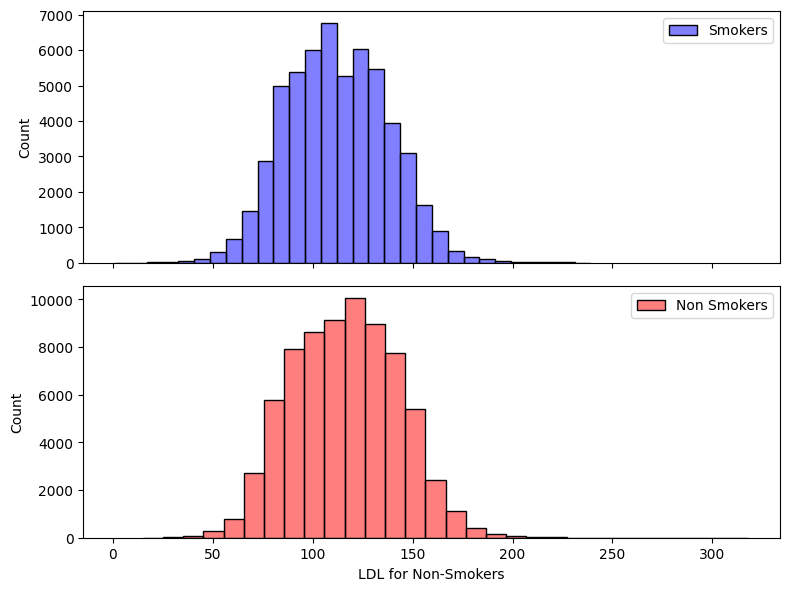

+------------------------------------+---------+
| Statistic                          |   Value |
+====================================+=========+
| Mean for Non Smokers               |  116.26 |
+------------------------------------+---------+
| Standard Deviation for Non Smokers |   26.47 |
+------------------------------------+---------+
| Mean for Smokers                   |  112.25 |
+------------------------------------+---------+
| Standard Deviation for Smokers     |   25.09 |
+------------------------------------+---------+


In [78]:

# Separate data for smokers and non-smokers based on 'LDL' levels
df_LDL_outliers_removed = train_df[train_df["LDL"] < 500]

LDL_smokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 1]['LDL']
LDL_nonsmokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 0]['LDL']

# Creating subplots with two histograms stacked vertically for 'LDL' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=LDL_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('LDL for Smokers')
ax1.legend()

sns.histplot(data=LDL_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('LDL for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the statistics
statistics = [
    ["Mean for Non Smokers", round(LDL_nonsmokers.mean(), 2)],
    ["Standard Deviation for Non Smokers", round(LDL_nonsmokers.std(), 2)],
    ["Mean for Smokers", round(LDL_smokers.mean(), 2)],
    ["Standard Deviation for Smokers", round(LDL_smokers.std(), 2)]
]

# Tabulate the statistics
table = tabulate(statistics, headers=["Statistic", "Value"], tablefmt="grid")

# Print the table
print(table)



### **Feature 2 : Hearing**

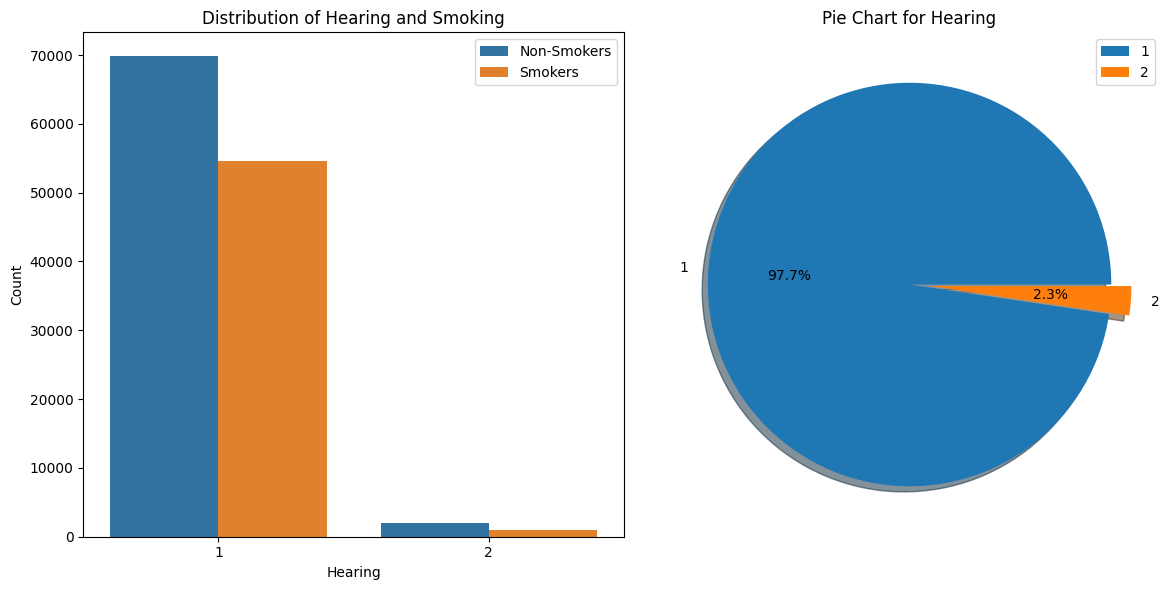

In [21]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the countplot for Hearing Feature with respect to the target
sns.countplot(x="hearing(right)", data=train_df, hue="smoking", ax=ax1)
ax1.set_xlabel('Hearing')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Hearing and Smoking')
ax1.legend(labels=["Non-Smokers", "Smokers"])

# Plot the pie chart for Hearing Feature
labels = '1', '2'
sizes = [len(train_df[train_df["hearing(right)"]==1]), len(train_df[train_df["hearing(right)"]==2])]
explode = (0, 0.1)
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
ax2.set_title('Pie Chart for Hearing')
ax2.legend(labels=["1", "2"])

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

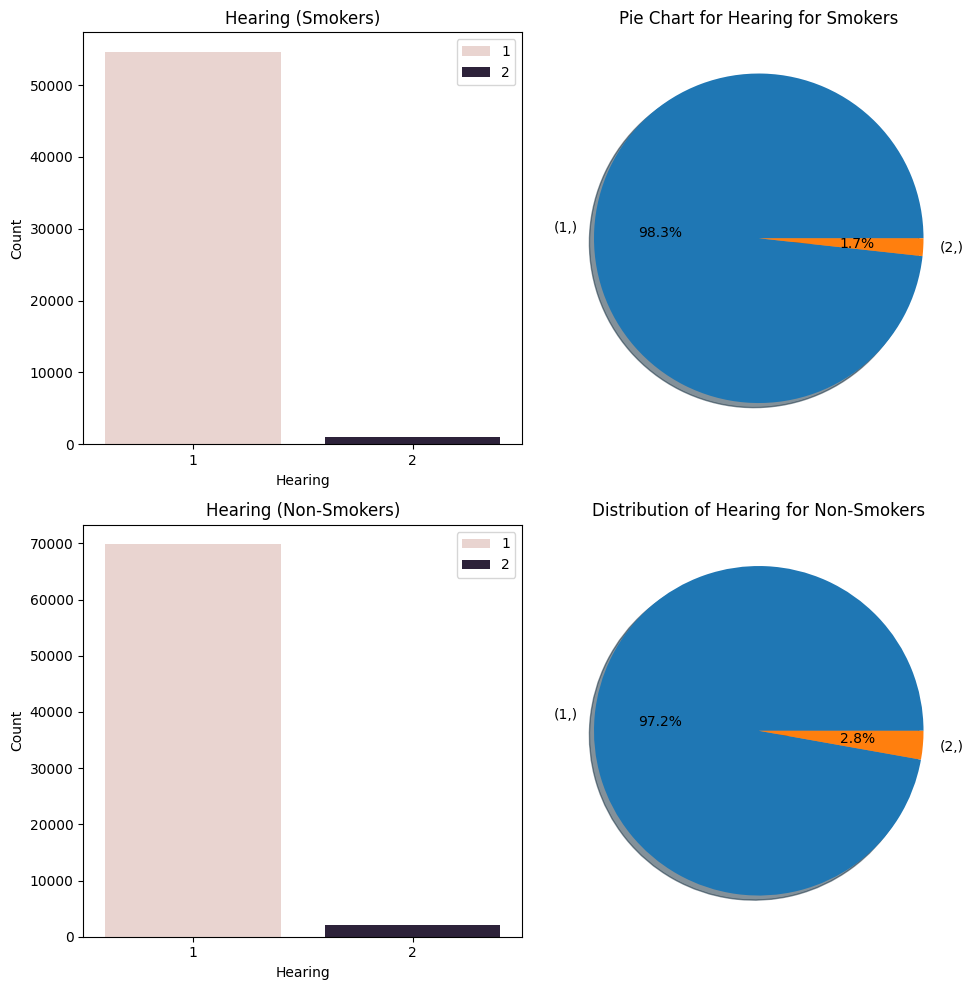

In [30]:

# Analyzing Hearing Feature for Smokers
hearing_smokers = train_df[train_df["smoking"] == 1][["hearing(right)"]]

# Analyzing Hearing Feature for Non-Smokers
hearing_nonsmokers = train_df[train_df["smoking"] == 0][["hearing(right)"]]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram for Hearing For Smokers
sns.countplot(x="hearing(right)", data=hearing_smokers, hue="hearing(right)", ax=axes[0, 0])
axes[0, 0].set_xlabel('Hearing')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Hearing (Smokers)')
axes[0, 0].legend(labels=["1", "2"])

# Pie Chart for Hearing For Smokers
axes[0, 1].pie(x=hearing_smokers.value_counts(), labels=hearing_smokers.value_counts().index, autopct="%.1f%%", shadow=True)
axes[0, 1].set_title('Pie Chart for Hearing for Smokers')

# Histogram for Hearing For Non-Smokers
sns.countplot(x="hearing(right)", data=hearing_nonsmokers, hue="hearing(right)", ax=axes[1, 0])
axes[1, 0].set_xlabel('Hearing')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Hearing (Non-Smokers)')
axes[1, 0].legend(labels=["1", "2"])

# Pie Chart for Hearing For Non-Smokers
axes[1, 1].pie(x=hearing_nonsmokers.value_counts(), labels=hearing_nonsmokers.value_counts().index, autopct="%.1f%%", shadow=True)
axes[1, 1].set_title('Distribution of Hearing for Non-Smokers')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Feature 4 : Fasting Blood Sugar**

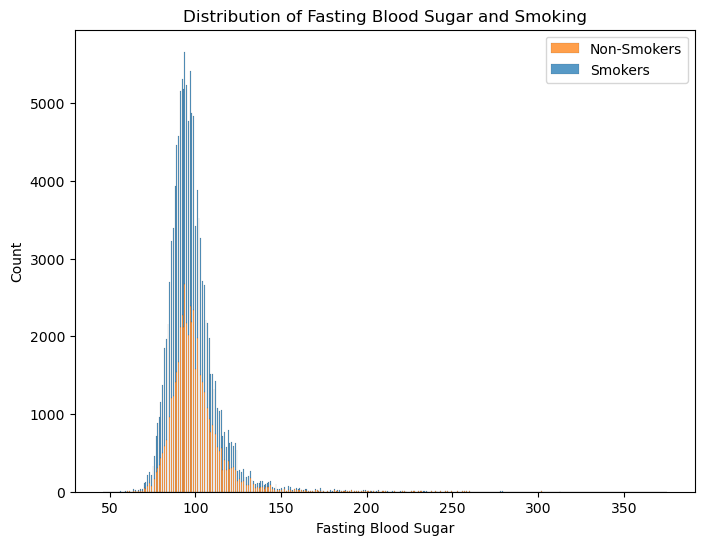

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="fasting blood sugar", hue="smoking", multiple="stack")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()


/tmp/ipykernel_4881/3303112954.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  table.add_row(["Mean", round(fbs_smokers_mean[0], 3), round(fbs_nonsmokers_mean[0], 3)])
/tmp/ipykernel_4881/3303112954.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  table.add_row(["Median", round(fbs_smokers_median[0], 3), round(fbs_nonsmokers_median[0], 3)])
/tmp/ipykernel_4881/3303112954.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

+--------------------+---------+-------------+
|                    | Smokers | Non-Smokers |
+--------------------+---------+-------------+
|        Mean        | 100.041 |    97.009   |
|       Median       |   97.0  |     95.0    |
|     Max Value      |   375   |     313     |
|     Min Value      |    56   |      46     |
|       Range        |   319   |     267     |
| Standard Deviation |  16.593 |    14.054   |
|        Skew        |  3.683  |    2.932    |
|        IQR         |   14.0  |     13.0    |
+--------------------+---------+-------------+


/tmp/ipykernel_4881/3303112954.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.set_xticks(range(0, int(fbs_smokers_max_val[0])+1, 100))  # Set the desired number of ticks
/tmp/ipykernel_4881/3303112954.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.set_xticks(range(0, int(fbs_nonsmokers_max_val[0])+1, 100))  # Set the desired number of ticks


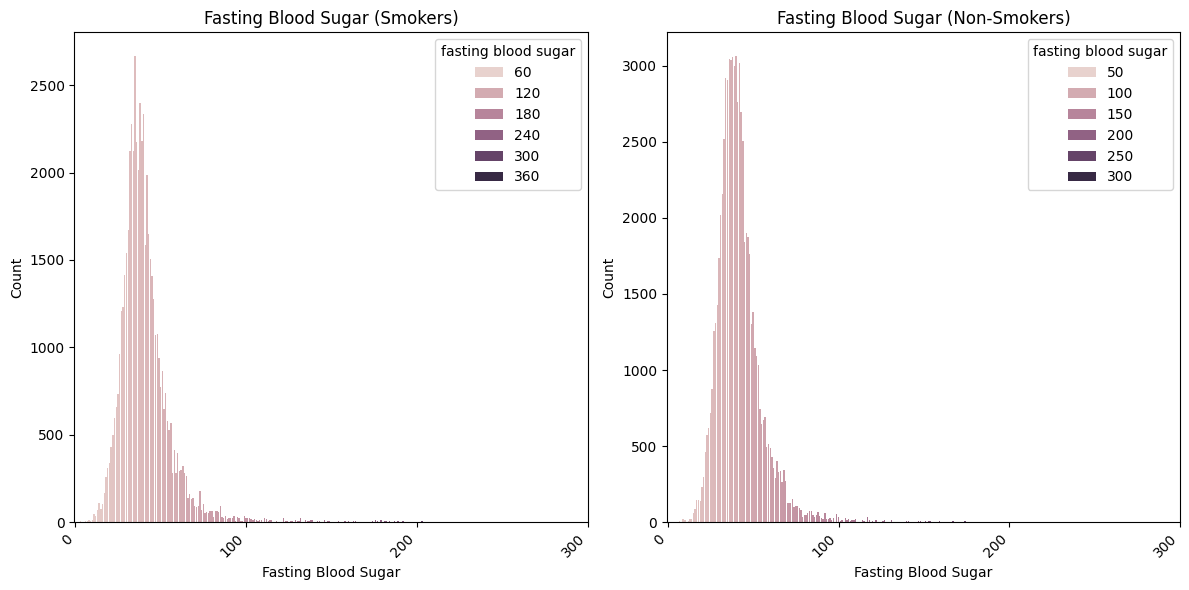

In [29]:

# Analyzing Fasting Blood Sugar Feature for Smokers
fbs_smokers = train_df[train_df["smoking"] == 1][["fasting blood sugar"]]
fbs_smokers_percentage = 100 * len(fbs_smokers[fbs_smokers["fasting blood sugar"]==1]) / len(fbs_smokers)
fbs_nonsmokers = train_df[train_df["smoking"] == 0][["fasting blood sugar"]]
fbs_nonsmokers_percentage = 100 * len(fbs_nonsmokers[fbs_nonsmokers["fasting blood sugar"]==1]) / len(fbs_nonsmokers)

# Central Tendency Measures
fbs_smokers_mean = fbs_smokers.mean()
fbs_smokers_median = fbs_smokers.median()
fbs_nonsmokers_mean = fbs_nonsmokers.mean()
fbs_nonsmokers_median = fbs_nonsmokers.median()

# Measures of Dispersion
fbs_smokers_max_val = fbs_smokers.max()
fbs_smokers_min_val = fbs_smokers.min()
fbs_smokers_range = fbs_smokers_max_val - fbs_smokers_min_val
fbs_smokers_std = fbs_smokers.std()
fbs_smokers_skew = fbs_smokers.skew()
fbs_smokers_iqr = fbs_smokers.quantile(0.75) - fbs_smokers.quantile(0.25)
fbs_nonsmokers_max_val = fbs_nonsmokers.max()
fbs_nonsmokers_min_val = fbs_nonsmokers.min()
fbs_nonsmokers_range = fbs_nonsmokers_max_val - fbs_nonsmokers_min_val
fbs_nonsmokers_std = fbs_nonsmokers.std()
fbs_nonsmokers_skew = fbs_nonsmokers.skew()
fbs_nonsmokers_iqr = fbs_nonsmokers.quantile(0.75) - fbs_nonsmokers.quantile(0.25)

# Create a table object
table = PrettyTable()

# Define table headers
table.field_names = ["", "Smokers", "Non-Smokers"]

# Add rows to the table
table.add_row(["Mean", round(fbs_smokers_mean[0], 3), round(fbs_nonsmokers_mean[0], 3)])
table.add_row(["Median", round(fbs_smokers_median[0], 3), round(fbs_nonsmokers_median[0], 3)])
table.add_row(["Max Value", round(fbs_smokers_max_val[0], 3), round(fbs_nonsmokers_max_val[0], 3)])
table.add_row(["Min Value", round(fbs_smokers_min_val[0], 3), round(fbs_nonsmokers_min_val[0], 3)])
table.add_row(["Range", round(fbs_smokers_range[0], 3), round(fbs_nonsmokers_range[0], 3)])
table.add_row(["Standard Deviation", round(fbs_smokers_std[0], 3), round(fbs_nonsmokers_std[0], 3)])
table.add_row(["Skew", round(fbs_smokers_skew[0], 3), round(fbs_nonsmokers_skew[0], 3)])
table.add_row(["IQR", round(fbs_smokers_iqr[0], 3), round(fbs_nonsmokers_iqr[0], 3)])

# Set table alignment
table.align = "c"

# Print the table
print(table)

# Histogram for Fasting Blood Sugar For Smokers and Non-Smokers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Fasting Blood Sugar For Smokers
sns.countplot(x="fasting blood sugar", data=fbs_smokers, hue="fasting blood sugar", ax=ax1)
ax1.set_xlabel('Fasting Blood Sugar')
ax1.set_ylabel('Count')
ax1.set_title('Fasting Blood Sugar (Smokers)')
ax1.set_xticks(range(0, int(fbs_smokers_max_val[0])+1, 100))  # Set the desired number of ticks
ax1.set_xticklabels(ax1.get_xticks(), rotation=45, ha='right')  # Set the tick labels


# Histogram for Fasting Blood Sugar For Non-Smokers
sns.countplot(x="fasting blood sugar", data=fbs_nonsmokers, hue="fasting blood sugar", ax=ax2)
ax2.set_xlabel('Fasting Blood Sugar')
ax2.set_ylabel('Count')
ax2.set_title('Fasting Blood Sugar (Non-Smokers)')
ax2.set_xticks(range(0, int(fbs_nonsmokers_max_val[0])+1, 100))  # Set the desired number of ticks
ax2.set_xticklabels(ax2.get_xticks(), rotation=45, ha='right')  # Set the tick labels

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()



### **Handling Outlier**

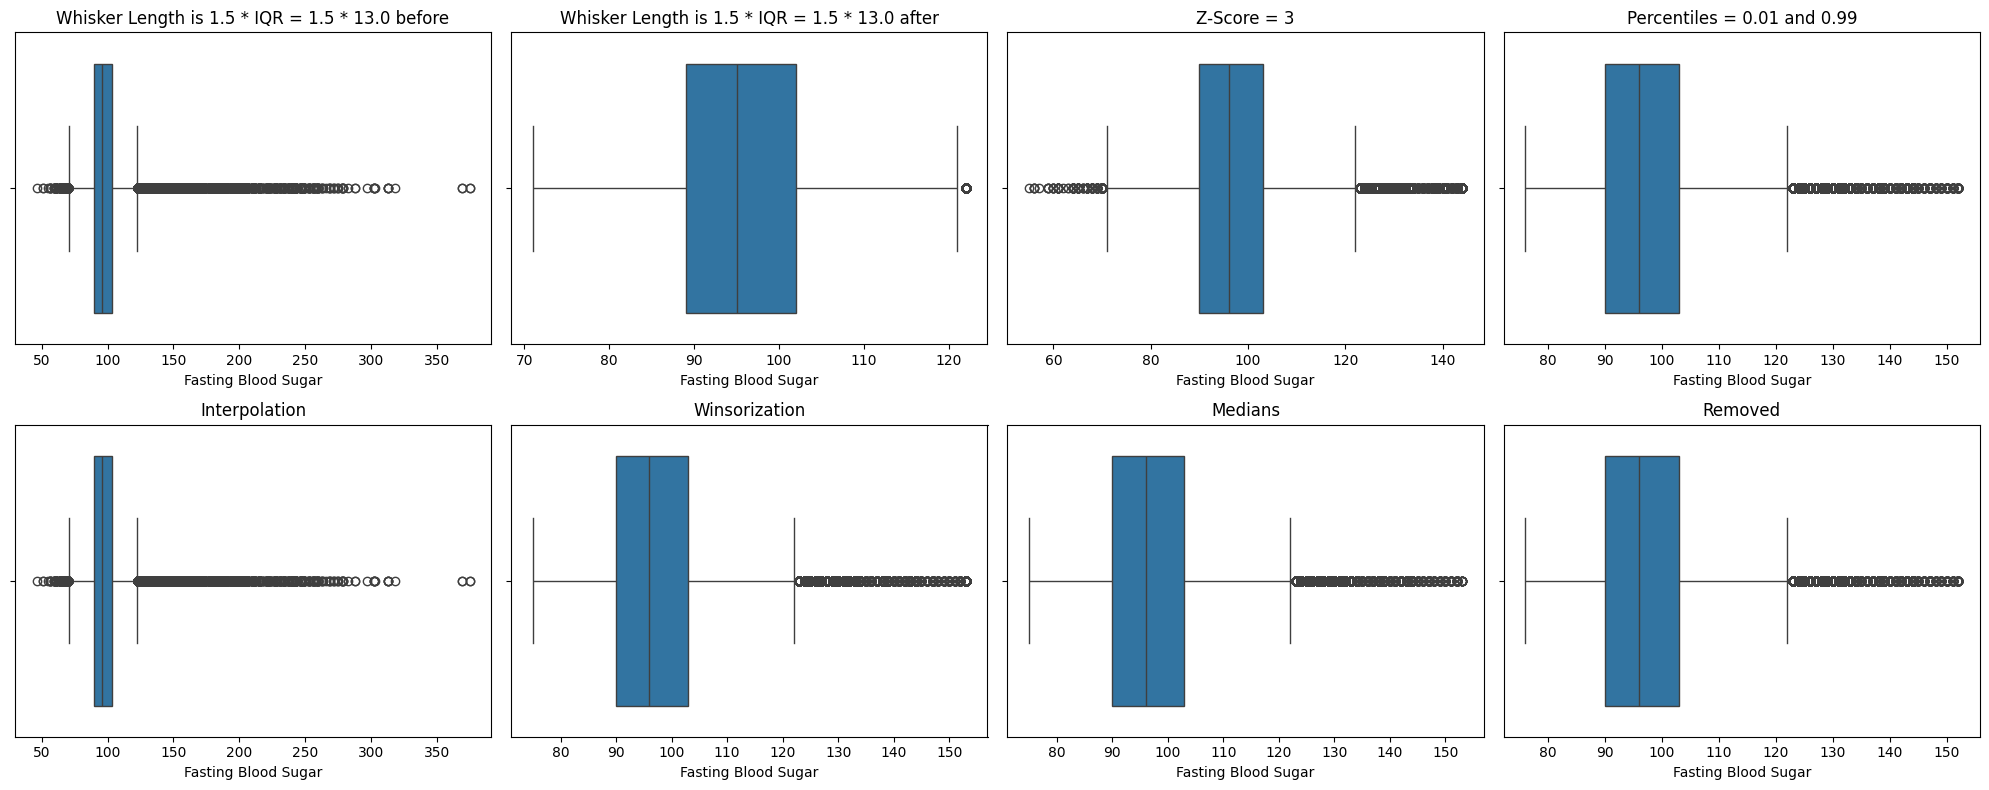

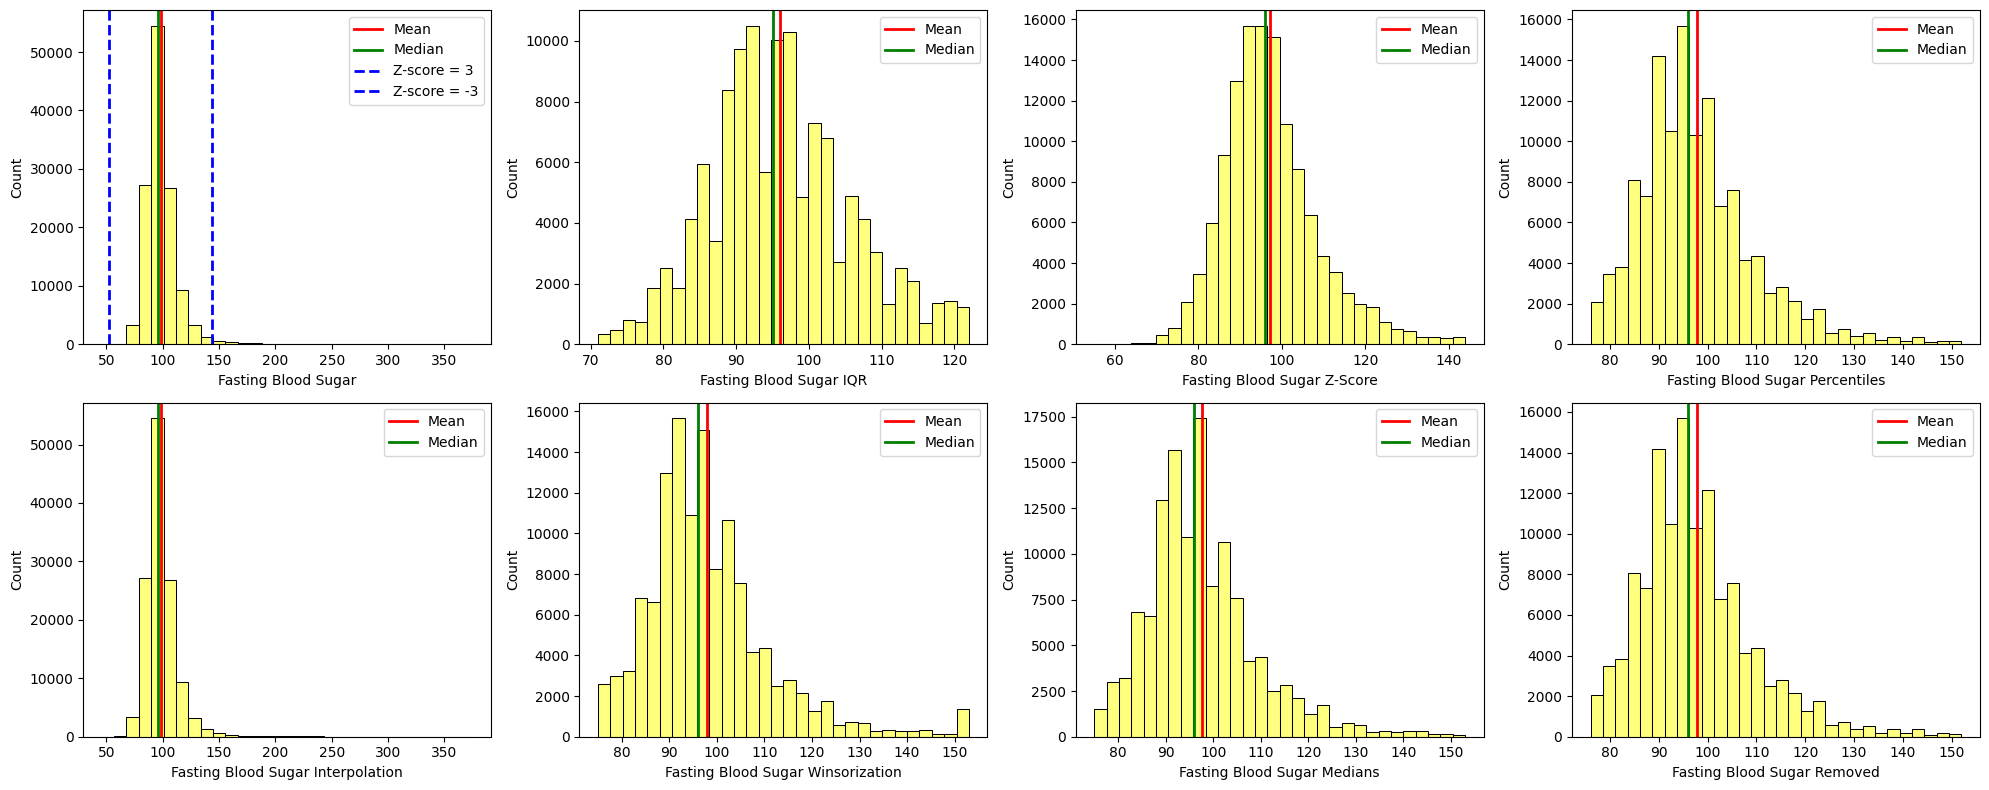

In [103]:
fasting_blood_sugar_feature = train_df["fasting blood sugar"]
# Handling Outliers using IQR
fasting_blood_sugar_q1 = fasting_blood_sugar_feature.quantile(0.25)
fasting_blood_sugar_q3 = fasting_blood_sugar_feature.quantile(0.75)
fasting_blood_sugar_iqr = fasting_blood_sugar_q3 - fasting_blood_sugar_q1
fasting_blood_sugar_lower_limit = fasting_blood_sugar_q1 - 1.5 * fasting_blood_sugar_iqr
fasting_blood_sugar_upper_limit = fasting_blood_sugar_q3 + 1.5 * fasting_blood_sugar_iqr
fasting_blood_sugar_feature_IQR = fasting_blood_sugar_feature[(fasting_blood_sugar_feature > fasting_blood_sugar_lower_limit) & (fasting_blood_sugar_feature < fasting_blood_sugar_upper_limit)]

# Handling Outliers using Z-Score
fasting_blood_sugar_mean = fasting_blood_sugar_feature.mean()
fasting_blood_sugar_std = fasting_blood_sugar_feature.std()
z_score_positive3 = 3 * fasting_blood_sugar_std + fasting_blood_sugar_mean
z_score_negative3 = -3 * fasting_blood_sugar_std + fasting_blood_sugar_mean
fasting_blood_sugar_feature_Z = fasting_blood_sugar_feature[(fasting_blood_sugar_feature > z_score_negative3) & (fasting_blood_sugar_feature < z_score_positive3)]

# Handling Outliers using Percentiles
fasting_blood_sugar_lower_limit = fasting_blood_sugar_feature.quantile(0.01)
fasting_blood_sugar_upper_limit = fasting_blood_sugar_feature.quantile(0.99)
fasting_blood_sugar_feature_P = fasting_blood_sugar_feature[(fasting_blood_sugar_feature > fasting_blood_sugar_lower_limit) & (fasting_blood_sugar_feature < fasting_blood_sugar_upper_limit)]

# Handling Outliers using Interpolation
fasting_blood_sugar_feature_interpolate = fasting_blood_sugar_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
fasting_blood_sugar_feature_winsorized = fasting_blood_sugar_feature.clip(lower=fasting_blood_sugar_lower_limit, upper=fasting_blood_sugar_upper_limit)

# Handling Outliers using medians
fasting_blood_sugar_feature_median = fasting_blood_sugar_feature.copy()
fasting_blood_sugar_feature_median[fasting_blood_sugar_feature_median > fasting_blood_sugar_upper_limit] = fasting_blood_sugar_feature.median()
fasting_blood_sugar_feature_median[fasting_blood_sugar_feature_median < fasting_blood_sugar_lower_limit] = fasting_blood_sugar_feature.median()

# Handling Outliers by removing them
fasting_blood_sugar_feature_removed = fasting_blood_sugar_feature[(fasting_blood_sugar_feature > fasting_blood_sugar_lower_limit) & (fasting_blood_sugar_feature < fasting_blood_sugar_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Fasting Blood Sugar Feature before handling outliers
sns.boxplot(x=fasting_blood_sugar_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Fasting Blood Sugar')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(fasting_blood_sugar_iqr, 3)} before")

# Box Plot for Fasting Blood Sugar Feature after handling outliers using IQR
sns.boxplot(x=fasting_blood_sugar_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Fasting Blood Sugar')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(fasting_blood_sugar_iqr, 3)} after")

# Box Plot for Fasting Blood Sugar Feature after handling outliers using Z-Score
sns.boxplot(x=fasting_blood_sugar_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Fasting Blood Sugar')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Fasting Blood Sugar Feature after handling outliers using Percentiles
sns.boxplot(x=fasting_blood_sugar_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Fasting Blood Sugar')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Fasting Blood Sugar Feature after handling outliers using Interpolation
sns.boxplot(x=fasting_blood_sugar_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Fasting Blood Sugar')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Fasting Blood Sugar Feature after handling outliers using Winsorization
sns.boxplot(x=fasting_blood_sugar_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Fasting Blood Sugar')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Fasting Blood Sugar Feature after handling outliers using medians
sns.boxplot(x=fasting_blood_sugar_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Fasting Blood Sugar')
axes[1, 2].set_title(f"Medians")

# Box Plot for Fasting Blood Sugar Feature after handling outliers by removing them
sns.boxplot(x=fasting_blood_sugar_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Fasting Blood Sugar')
axes[1, 3].set_title(f"Removed")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Fasting Blood Sugar Feature before handling outliers
sns.histplot(fasting_blood_sugar_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Fasting Blood Sugar')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(fasting_blood_sugar_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(fasting_blood_sugar_feature.median(), c='green', ls='-', lw=2)
axes[0, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[0, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Histogram for Fasting Blood Sugar Feature after handling outliers using IQR
sns.histplot(fasting_blood_sugar_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Fasting Blood Sugar IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(fasting_blood_sugar_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(fasting_blood_sugar_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for Fasting Blood Sugar Feature after handling outliers using Z-Score
sns.histplot(fasting_blood_sugar_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Fasting Blood Sugar Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(fasting_blood_sugar_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(fasting_blood_sugar_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])

# Histogram for Fasting Blood Sugar Feature after handling outliers using Percentiles
sns.histplot(fasting_blood_sugar_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Fasting Blood Sugar Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(fasting_blood_sugar_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(fasting_blood_sugar_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for Fasting Blood Sugar Feature after handling outliers using Interpolation
sns.histplot(fasting_blood_sugar_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Fasting Blood Sugar Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(fasting_blood_sugar_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(fasting_blood_sugar_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for Fasting Blood Sugar Feature after handling outliers using Winsorization
sns.histplot(fasting_blood_sugar_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Fasting Blood Sugar Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(fasting_blood_sugar_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(fasting_blood_sugar_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for Fasting Blood Sugar Feature after handling outliers using medians
sns.histplot(fasting_blood_sugar_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Fasting Blood Sugar Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(fasting_blood_sugar_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(fasting_blood_sugar_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for Fasting Blood Sugar Feature after handling outliers by removing them
sns.histplot(fasting_blood_sugar_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Fasting Blood Sugar Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(fasting_blood_sugar_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(fasting_blood_sugar_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




### **Feature 6 : Height**

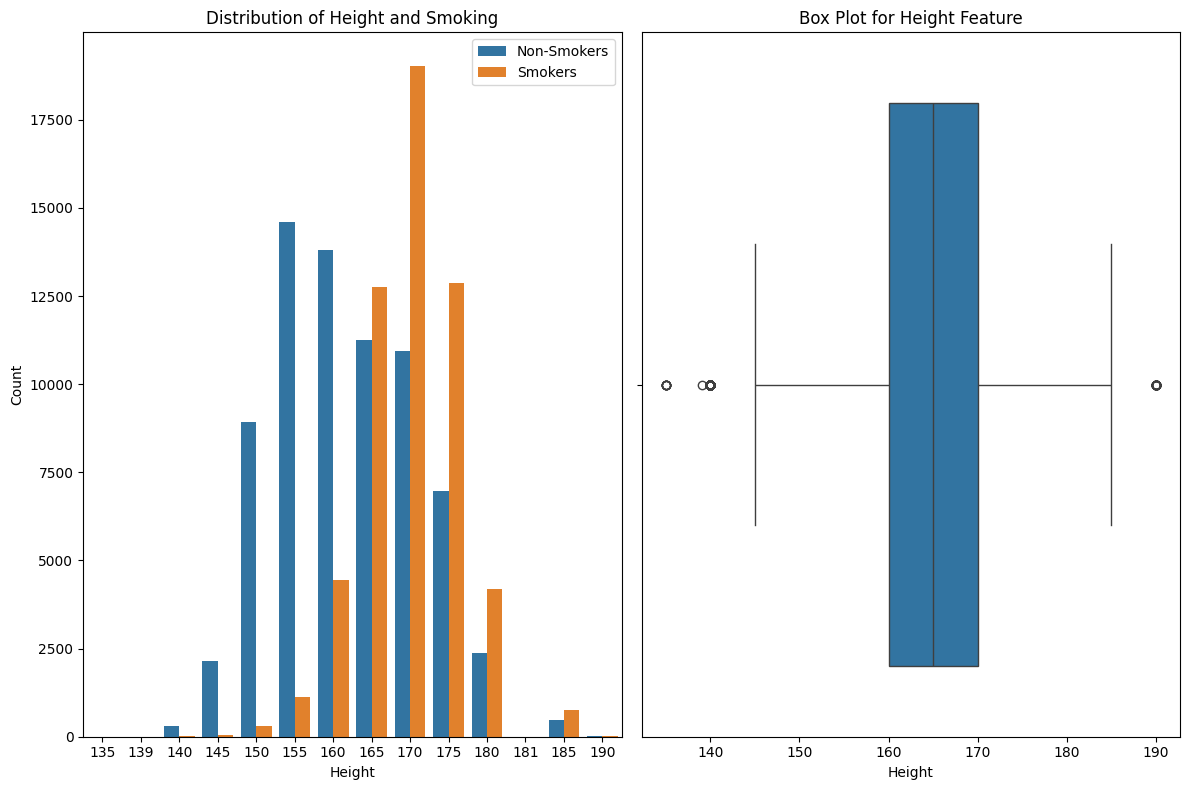

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Distribution of Height Feature with respect to the target
sns.countplot(x="height(cm)", data=train_df, hue="smoking", ax=ax1)
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Height and Smoking')
ax1.legend(labels=["Non-Smokers", "Smokers"])

# box plot for height feature
sns.boxplot(x="height(cm)", data=train_df, ax=ax2)
ax2.set_xlabel('Height')
ax2.set_title('Box Plot for Height Feature')

plt.tight_layout()
plt.show()


/tmp/ipykernel_4881/911518981.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
/tmp/ipykernel_4881/911518981.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
/tmp/ipykernel_4881/911518981.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ["Max Value", round

╒════════════════════╤═══════════╤═══════════════╕
│                    │   Smokers │   Non-Smokers │
╞════════════════════╪═══════════╪═══════════════╡
│ Mean               │   169.742 │       161.793 │
├────────────────────┼───────────┼───────────────┤
│ Median             │   170     │       160     │
├────────────────────┼───────────┼───────────────┤
│ Max Value          │   190     │       190     │
├────────────────────┼───────────┼───────────────┤
│ Min Value          │   135     │       135     │
├────────────────────┼───────────┼───────────────┤
│ Range              │    55     │        55     │
├────────────────────┼───────────┼───────────────┤
│ Standard Deviation │     6.15  │         9.014 │
├────────────────────┼───────────┼───────────────┤
│ Skew               │    -0.251 │         0.192 │
├────────────────────┼───────────┼───────────────┤
│ IQR                │    10     │        15     │
╘════════════════════╧═══════════╧═══════════════╛


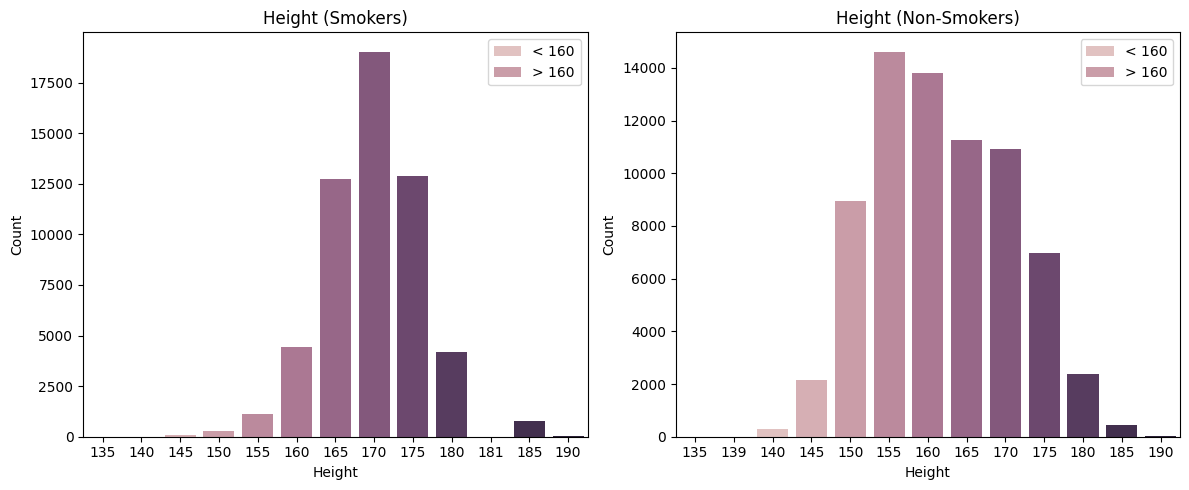

In [64]:


# Analyzing Height Feature for Smokers
height_smokers = train_df[train_df["smoking"] == 1][["height(cm)"]]
height_smokers_percentage = 100 * len(height_smokers[height_smokers["height(cm)"] > 160]) / len(height_smokers)
height_nonsmokers = train_df[train_df["smoking"] == 0][["height(cm)"]]
height_nonsmokers_percentage = 100 * len(height_nonsmokers[height_nonsmokers["height(cm)"] > 160]) / len(height_nonsmokers)

# Central Tendency Measures
height_smokers_mean = height_smokers.mean()
height_smokers_median = height_smokers.median()
height_nonsmokers_mean = height_nonsmokers.mean()
height_nonsmokers_median = height_nonsmokers.median()

# Measures of Dispersion
height_smokers_max_val = height_smokers.max()
height_smokers_min_val = height_smokers.min()
height_smokers_range = height_smokers_max_val - height_smokers_min_val
height_smokers_std = height_smokers.std()
height_smokers_skew = height_smokers.skew()
height_smokers_iqr = height_smokers.quantile(0.75) - height_smokers.quantile(0.25)
height_nonsmokers_max_val = height_nonsmokers.max()
height_nonsmokers_min_val = height_nonsmokers.min()
height_nonsmokers_range = height_nonsmokers_max_val - height_nonsmokers_min_val
height_nonsmokers_std = height_nonsmokers.std()
height_nonsmokers_skew = height_nonsmokers.skew()
height_nonsmokers_iqr = height_nonsmokers.quantile(0.75) - height_nonsmokers.quantile(0.25)

# Create table data
table_data = [
    ["", "Smokers", "Non-Smokers"],
    ["Mean", round(height_smokers_mean[0], 3), round(height_nonsmokers_mean[0], 3)],
    ["Median", round(height_smokers_median[0], 3), round(height_nonsmokers_median[0], 3)],
    ["Max Value", round(height_smokers_max_val[0], 3), round(height_nonsmokers_max_val[0], 3)],
    ["Min Value", round(height_smokers_min_val[0], 3), round(height_nonsmokers_min_val[0], 3)],
    ["Range", round(height_smokers_range[0], 3), round(height_nonsmokers_range[0], 3)],
    ["Standard Deviation", round(height_smokers_std[0], 3), round(height_nonsmokers_std[0], 3)],
    ["Skew", round(height_smokers_skew[0], 3), round(height_nonsmokers_skew[0], 3)],
    ["IQR", round(height_smokers_iqr[0], 3), round(height_nonsmokers_iqr[0], 3)]
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

# Set table alignment
table.align = "c"

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Height For Smokers
sns.countplot(x="height(cm)", data=height_smokers, hue="height(cm)", ax=ax1)
ax1.set_xlabel('Height')
ax1.set_ylabel('Count')
ax1.set_title('Height (Smokers)')
ax1.legend(labels=["< 160", "> 160"])

# Histogram for Height For Non-Smokers
sns.countplot(x="height(cm)", data=height_nonsmokers, hue="height(cm)", ax=ax2)
ax2.set_xlabel('Height')
ax2.set_ylabel('Count')
ax2.set_title('Height (Non-Smokers)')
ax2.legend(labels=["< 160", "> 160"])


plt.tight_layout()
plt.show()


### **Handling Outliers**

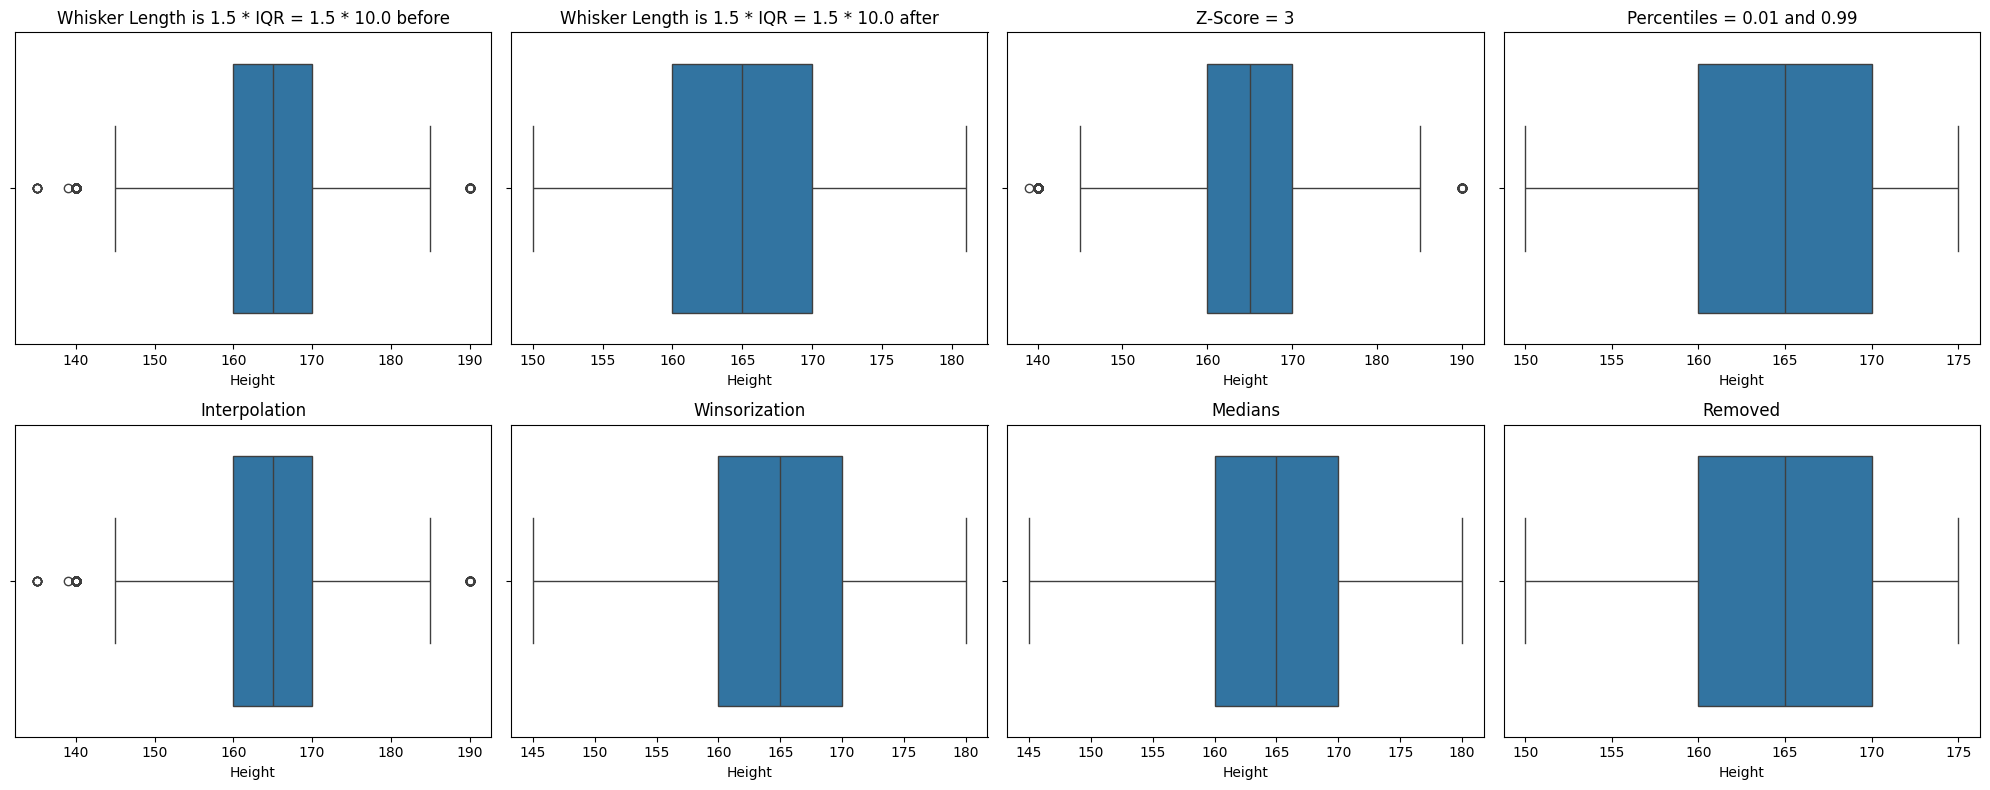

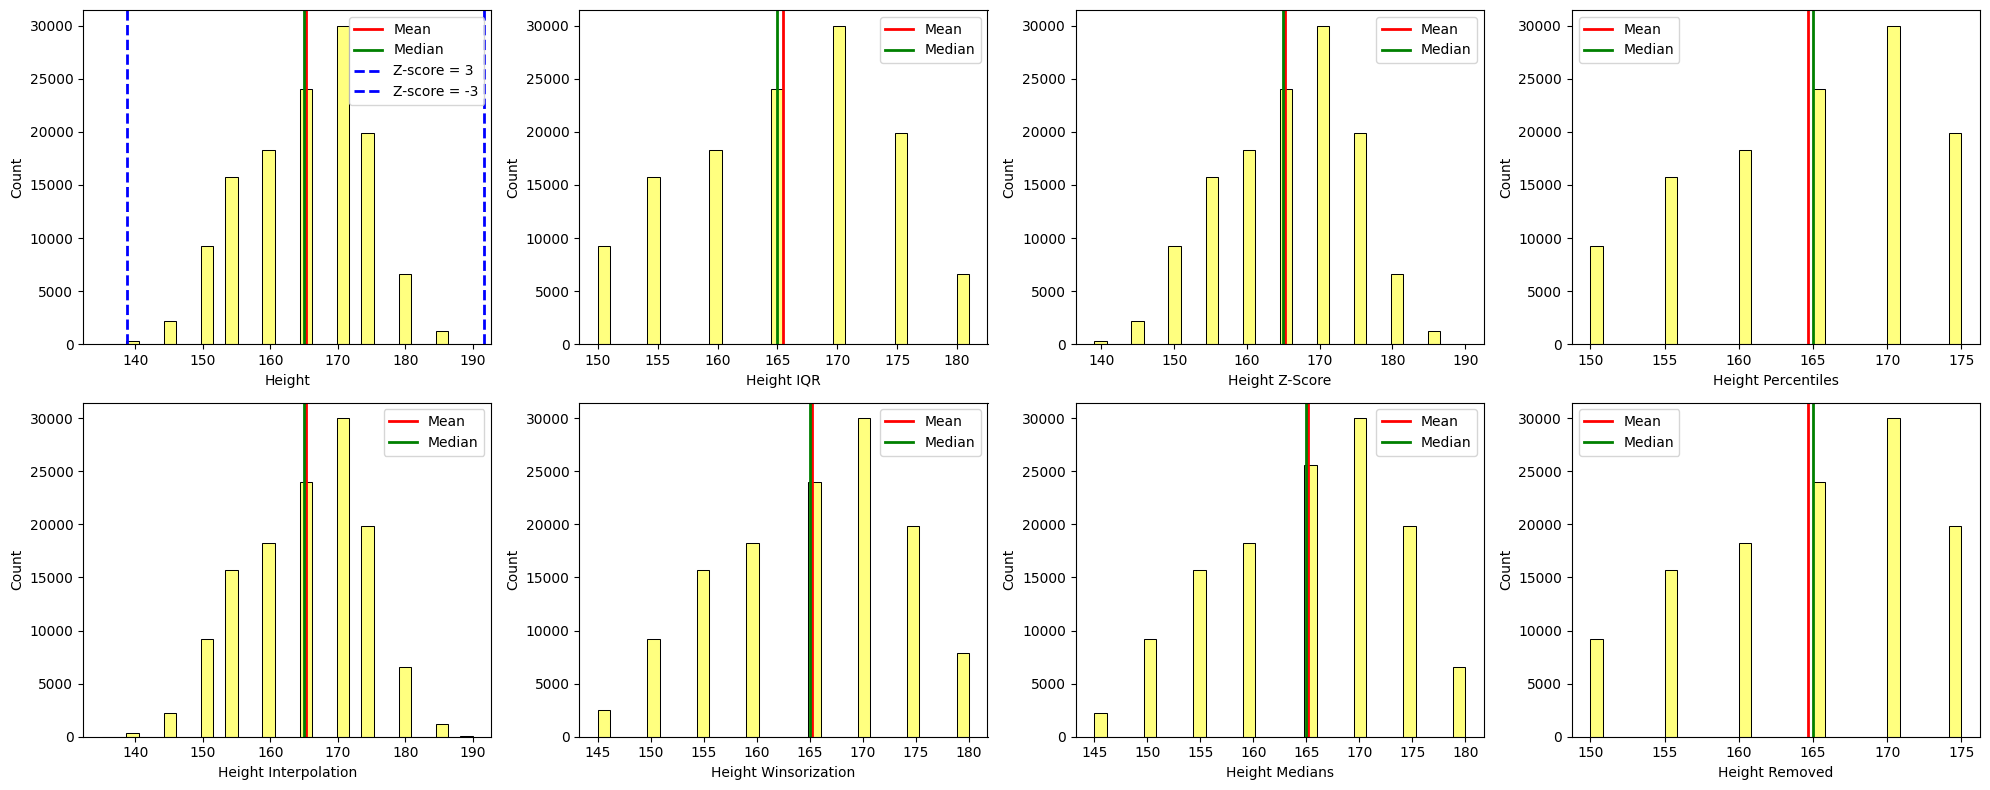

In [102]:
height_feature = train_df["height(cm)"]

# Handling Outliers using IQR
height_q1 = height_feature.quantile(0.25)
height_q3 = height_feature.quantile(0.75)
height_iqr = height_q3 - height_q1
height_lower_limit = height_q1 - 1.5 * height_iqr
height_upper_limit = height_q3 + 1.5 * height_iqr
height_feature_IQR = height_feature[(height_feature > height_lower_limit) & (height_feature < height_upper_limit)]

# Handling Outliers using Z-Score
height_mean = height_feature.mean()
height_std = height_feature.std()
z_score_positive3 = 3 * height_std + height_mean
z_score_negative3 = -3 * height_std + height_mean
height_feature_Z = height_feature[(height_feature > z_score_negative3) & (height_feature < z_score_positive3)]

# Handling Outliers using Percentiles
height_lower_limit = height_feature.quantile(0.01)
height_upper_limit = height_feature.quantile(0.99)
height_feature_P = height_feature[(height_feature > height_lower_limit) & (height_feature < height_upper_limit)]

# Handling Outliers using Interpolation
height_feature_interpolate = height_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
height_feature_winsorized = height_feature.clip(lower=height_lower_limit, upper=height_upper_limit)

# Handling Outliers using medians
height_feature_median = height_feature.copy()
height_feature_median[height_feature_median > height_upper_limit] = height_feature.median()
height_feature_median[height_feature_median < height_lower_limit] = height_feature.median()

# Handling Outliers by removing them
height_feature_removed = height_feature[(height_feature > height_lower_limit) & (height_feature < height_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Height Feature before handling outliers
sns.boxplot(x=height_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} before")

# Box Plot for Height Feature after handling outliers using IQR
sns.boxplot(x=height_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Height')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(height_iqr, 3)} after")

# Box Plot for Height Feature after handling outliers using Z-Score
sns.boxplot(x=height_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Height')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Height Feature after handling outliers using Percentiles
sns.boxplot(x=height_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Height')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Height Feature after handling outliers using Interpolation
sns.boxplot(x=height_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Height Feature after handling outliers using Winsorization
sns.boxplot(x=height_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Height')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Height Feature after handling outliers using medians
sns.boxplot(x=height_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Height')
axes[1, 2].set_title(f"Medians")

# Box Plot for Height Feature after handling outliers by removing them
sns.boxplot(x=height_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Height')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Height Feature before handling outliers
sns.histplot(height_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Height')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(height_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(height_feature.median(), c='green', ls='-', lw=2)
axes[0, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[0, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Histogram for Height Feature after handling outliers using IQR
sns.histplot(height_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Height IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(height_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(height_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Z-Score
sns.histplot(height_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Height Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(height_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(height_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Percentiles
sns.histplot(height_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Height Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(height_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(height_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Interpolation
sns.histplot(height_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Height Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(height_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(height_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using Winsorization
sns.histplot(height_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Height Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(height_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(height_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers using medians
sns.histplot(height_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Height Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(height_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(height_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for Height Feature after handling outliers by removing them
sns.histplot(height_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Height Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(height_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(height_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




### **Feature 7: Weight**

Observations: Weights are approximately Gaussian, but they are skewed to the right
Weights are on average higher for smokers, and their distribution is less skewed

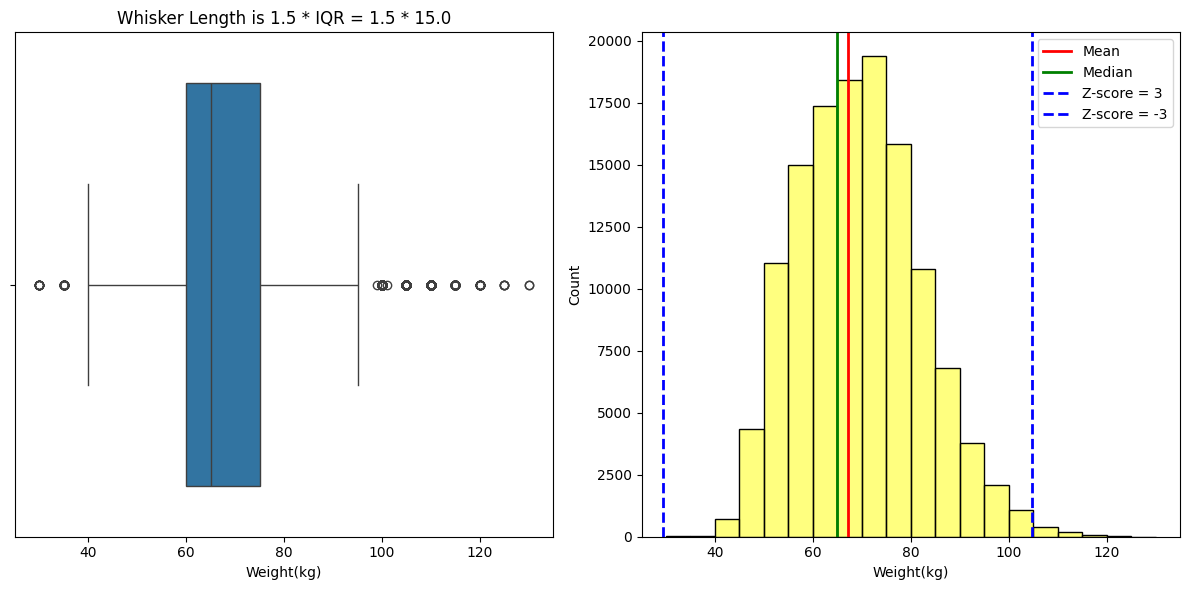

+------------+--------------------+---------+
| Feature    | Measure            |   Value |
+============+====================+=========+
| Weight(kg) | Mean               |  67.109 |
+------------+--------------------+---------+
|            | Median             |  65     |
+------------+--------------------+---------+
|            | Max Value          | 130     |
+------------+--------------------+---------+
|            | Min Value          |  30     |
+------------+--------------------+---------+
|            | Range              | 100     |
+------------+--------------------+---------+
|            | Standard Deviation |  12.565 |
+------------+--------------------+---------+
|            | Skew               |   0.379 |
+------------+--------------------+---------+
|            | IQR                |  15     |
+------------+--------------------+---------+


In [85]:

weight_feature = train_df["weight(kg)"]

# Central Tendency Measures
weight_mean = weight_feature.mean()
weight_median = weight_feature.median()

# Measures of Dispersion
weight_max_val = weight_feature.max()
weight_min_val = weight_feature.min()
weight_range = weight_max_val - weight_min_val
weight_std = weight_feature.std()
weight_skew = weight_feature.skew()
weight_iqr = weight_feature.quantile(0.75) - weight_feature.quantile(0.25)
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean

# Create subplots for box plot and histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Weight(kg) Feature
sns.boxplot(x=weight_feature, ax=axes[0])
axes[0].set_xlabel('Weight(kg)')
axes[0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)}")

# Histogram for Weight(kg) Feature
sns.histplot(weight_feature, bins=20, alpha=0.5, color="yellow", ax=axes[1])
axes[1].set_xlabel('Weight(kg)')
axes[1].set_ylabel('Count')
axes[1].axvline(weight_mean, c='red', ls='-', lw=2)
axes[1].axvline(weight_median, c='green', ls='-', lw=2)
axes[1].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[1].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[1].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create table data
table_data = [
    ["Weight(kg)", "Mean", round(weight_mean, 3)],
    ["", "Median", round(weight_median, 3)],
    ["", "Max Value", round(weight_max_val, 3)],
    ["", "Min Value", round(weight_min_val, 3)],
    ["", "Range", round(weight_range, 3)],
    ["", "Standard Deviation", round(weight_std, 3)],
    ["", "Skew", round(weight_skew, 3)],
    ["", "IQR", round(weight_iqr, 3)],
]

# Print the table
print(tabulate(table_data, headers=["Feature", "Measure", "Value"], tablefmt="grid"))


Average Weight for Smokers: 72.13 kg
Median Weight for Smokers: 70.00 kg
Average Weight for Non-Smokers: 63.22 kg
Median Weight for Non-Smokers: 60.00 kg


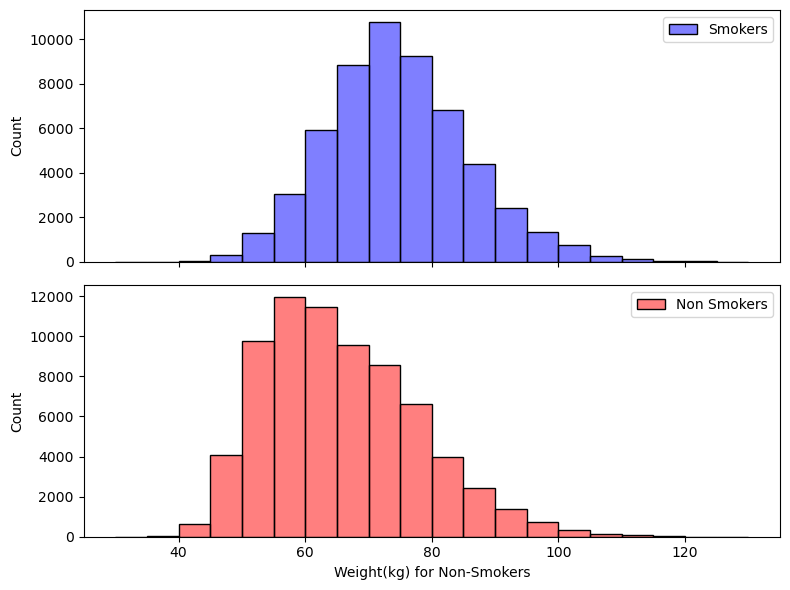

In [36]:
# Separate data for smokers and non-smokers based on 'weight(kg)' levels
weight_smokers = train_df[train_df['smoking'] == 1]['weight(kg)']
weight_nonsmokers = train_df[train_df['smoking'] == 0]['weight(kg)']

# Creating subplots with two histograms stacked vertically for 'Weight(kg)' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

avg_weight_smokers = weight_smokers.mean()
median_smokers = weight_smokers.median()
avg_weight_nonsmokers = weight_nonsmokers.mean()
median_nonsmokers = weight_nonsmokers.median()

# Print average weights
print(f"Average Weight for Smokers: {avg_weight_smokers:.2f} kg")
print(f"Median Weight for Smokers: {median_smokers:.2f} kg")
print(f"Average Weight for Non-Smokers: {avg_weight_nonsmokers:.2f} kg")
print(f"Median Weight for Non-Smokers: {median_nonsmokers:.2f} kg")

sns.histplot(data=weight_smokers, color='blue', alpha=0.5, bins=20, label='Smokers', ax=ax1)
ax1.set_xlabel('Weight(kg) for Smokers')
ax1.legend()

sns.histplot(data=weight_nonsmokers, color='red', alpha=0.5, bins=20, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Weight(kg) for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Handling Outliers**

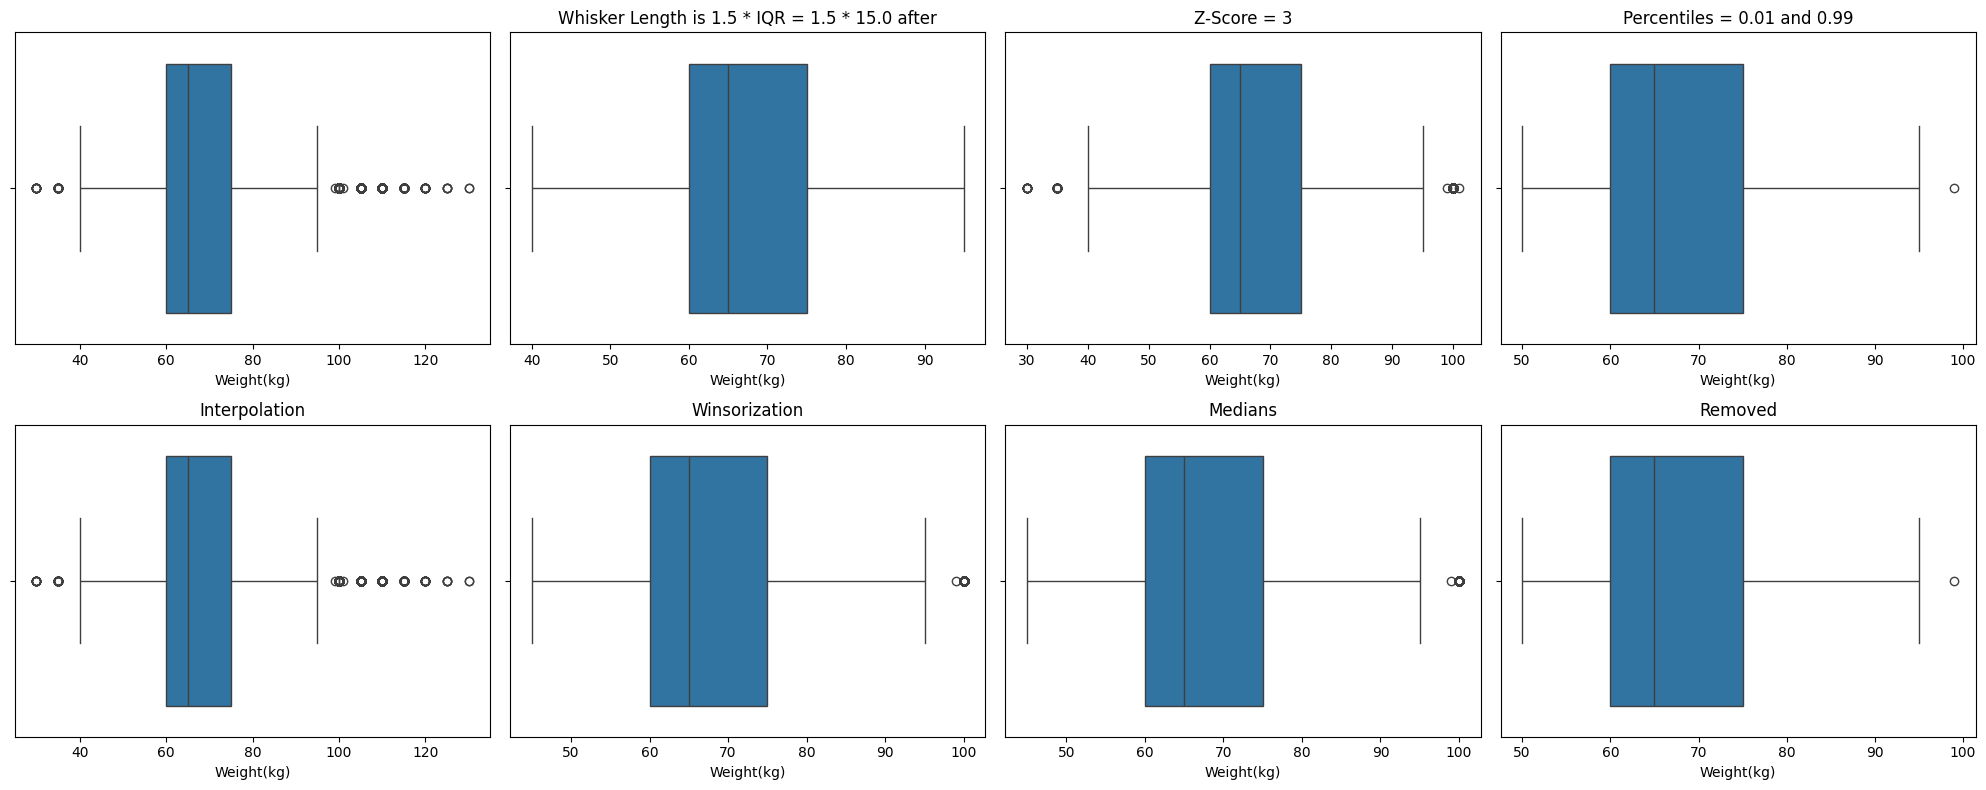

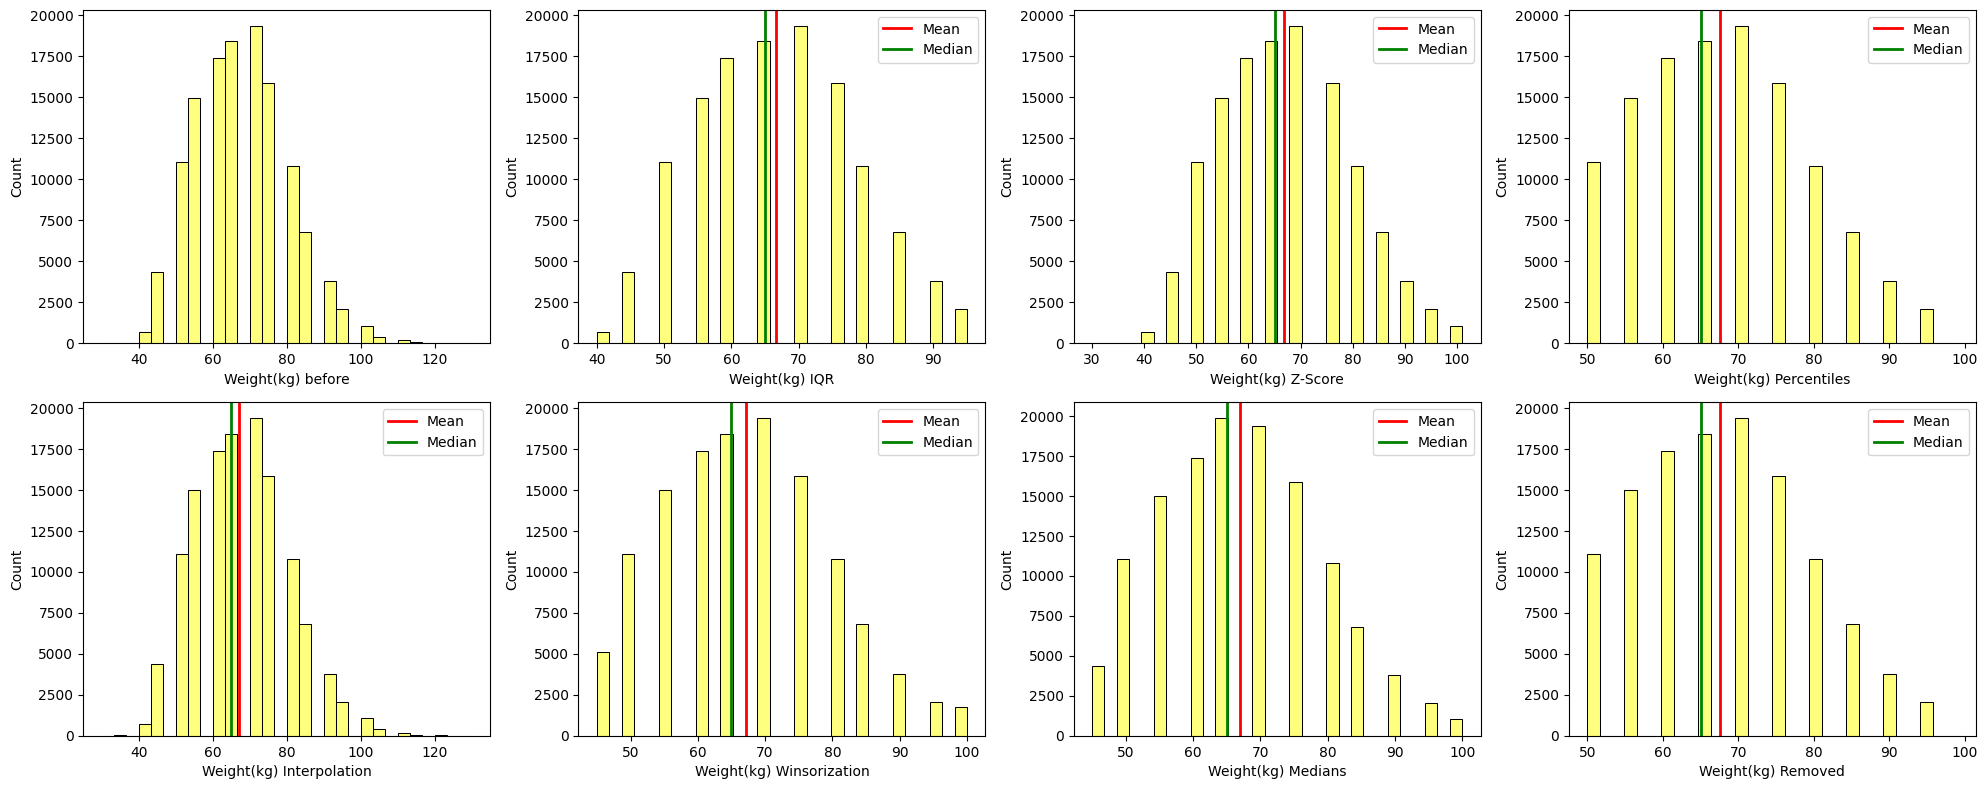

In [101]:
# Handling Outliers using IQR
weight_q1 = weight_feature.quantile(0.25)
weight_q3 = weight_feature.quantile(0.75)
weight_iqr = weight_q3 - weight_q1
weight_lower_limit = weight_q1 - 1.5 * weight_iqr
weight_upper_limit = weight_q3 + 1.5 * weight_iqr
weight_feature_IQR = weight_feature[(weight_feature > weight_lower_limit) & (weight_feature < weight_upper_limit)]

# Handling Outliers using Z-Score
weight_mean = weight_feature.mean()
weight_std = weight_feature.std()
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean
weight_feature_Z = weight_feature[(weight_feature > z_score_negative3) & (weight_feature < z_score_positive3)]

# Handling Outliers using Percentiles
weight_lower_limit = weight_feature.quantile(0.01)
weight_upper_limit = weight_feature.quantile(0.99)
weight_feature_P = weight_feature[(weight_feature > weight_lower_limit) & (weight_feature < weight_upper_limit)]

# Handling Outliers using Interpolation
weight_feature_interpolate = weight_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
weight_feature_winsorized = weight_feature.clip(lower=weight_lower_limit, upper=weight_upper_limit)

# Handling Outliers using medians
weight_feature_median = weight_feature.copy()
weight_feature_median[weight_feature_median > weight_upper_limit] = weight_feature.median()
weight_feature_median[weight_feature_median < weight_lower_limit] = weight_feature.median()

# Handling Outliers by removing them
weight_feature_removed = weight_feature[(weight_feature > weight_lower_limit) & (weight_feature < weight_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Weight(kg) Feature before handling outliers
sns.boxplot(x=weight_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Weight(kg)')

# Box Plot for Weight(kg) Feature after handling outliers using IQR
sns.boxplot(x=weight_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Weight(kg)')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)} after")

# Box Plot for Weight(kg) Feature after handling outliers using Z-Score
sns.boxplot(x=weight_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Weight(kg)')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Weight(kg) Feature after handling outliers using Percentiles
sns.boxplot(x=weight_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Weight(kg)')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Weight(kg) Feature after handling outliers using Interpolation
sns.boxplot(x=weight_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Weight(kg)')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Weight(kg) Feature after handling outliers using Winsorization
sns.boxplot(x=weight_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Weight(kg)')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Weight(kg) Feature after handling outliers using medians
sns.boxplot(x=weight_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Weight(kg)')
axes[1, 2].set_title(f"Medians")

# Box Plot for Weight(kg) Feature after handling outliers by removing them
sns.boxplot(x=weight_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Weight(kg)')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Weight(kg) Feature before handling outliers
sns.histplot(weight_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Weight(kg) before')
axes[0, 0].set_ylabel('Count')

# Histogram for Weight(kg) Feature after handling outliers using IQR
sns.histplot(weight_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Weight(kg) IQR')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(weight_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(weight_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using Z-Score
sns.histplot(weight_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Weight(kg) Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(weight_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(weight_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])


# Histogram for Weight(kg) Feature after handling outliers using Percentiles
sns.histplot(weight_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Weight(kg) Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(weight_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(weight_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using Interpolation
sns.histplot(weight_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Weight(kg) Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(weight_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(weight_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using Winsorization
sns.histplot(weight_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Weight(kg) Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(weight_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(weight_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers using medians
sns.histplot(weight_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Weight(kg) Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(weight_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(weight_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for Weight(kg) Feature after handling outliers by removing them
sns.histplot(weight_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Weight(kg) Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(weight_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(weight_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### **Feature 8: Cholesterol**

Descriptive Statistics for Cholesterol:
Mean: 195.79207874164075
Median: 196.0
Standard Deviation: 28.405790681876233
Minimum Value: 77
Maximum Value: 393
Skewness: 0.04096447796784706
IQR 42.0


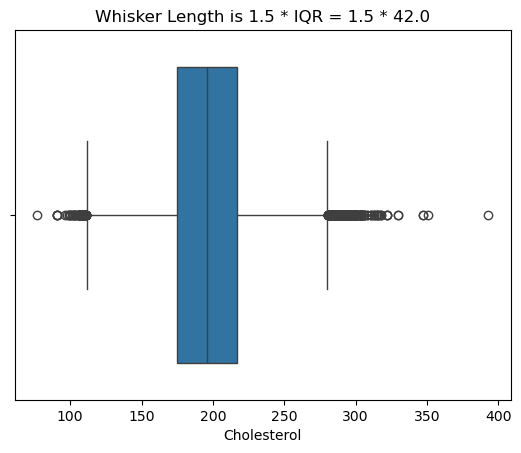

In [37]:
# Descriptive Statistics of the Choleterol feature
cholesterol_mean = train_df['Cholesterol'].mean()
cholesterol_median = train_df['Cholesterol'].median()
cholesterol_std = train_df['Cholesterol'].std()
cholesterol_min = train_df['Cholesterol'].min()
cholesterol_max = train_df['Cholesterol'].max()
cholesterol_iqr = train_df['Cholesterol'].quantile(0.75) - train_df['Cholesterol'].quantile(0.25)
z_score_pos3 = 3 * cholesterol_std + cholesterol_mean
z_score_neg3 = -3 * cholesterol_std + cholesterol_mean

# Print the descriptive statistics
print("Descriptive Statistics for Cholesterol:")
print(f"Mean: {cholesterol_mean}")
print(f"Median: {cholesterol_median}")
print(f"Standard Deviation: {cholesterol_std}")
print(f"Minimum Value: {cholesterol_min}")
print(f"Maximum Value: {cholesterol_max}")
#skewness
print("Skewness:", train_df['Cholesterol'].skew())
#iqr
print(f"IQR {round(cholesterol_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=train_df['Cholesterol'])
plt.xlabel('Cholesterol')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(cholesterol_iqr, 3)}")
plt.show()

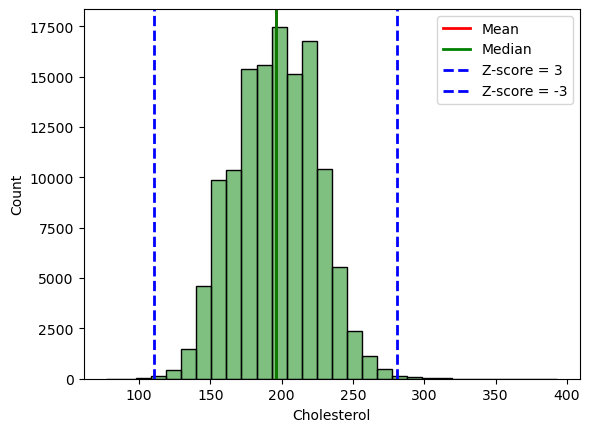

In [38]:
#Histogram for Cholesterol feature
sns.histplot(train_df['Cholesterol'], bins=30, alpha=0.5, color="green")
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.axvline(cholesterol_mean, c='red', ls='-', lw=2)
plt.axvline(cholesterol_median, c='green', ls='-', lw=2)
plt.axvline(z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

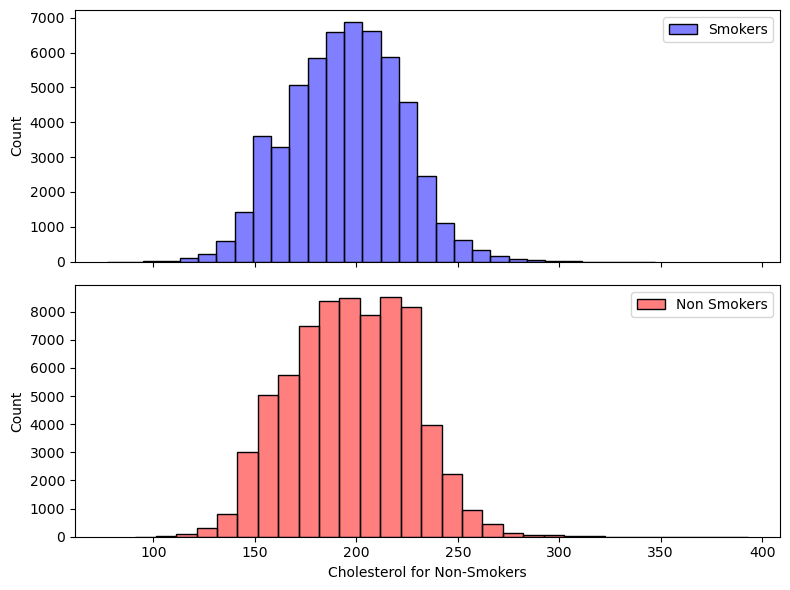

In [39]:
# Analyzing Cholesterol Feature with respect to the target
Cholesterol_smokers = train_df[train_df['smoking'] == 1]['Cholesterol']
Cholesterol_nonsmokers = train_df[train_df['smoking'] == 0]['Cholesterol']

# Creating subplots for Choleterol feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=Cholesterol_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('Cholesterol for Smokers')
ax1.legend()

sns.histplot(data=Cholesterol_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Cholesterol for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

### **Handling Outliers**

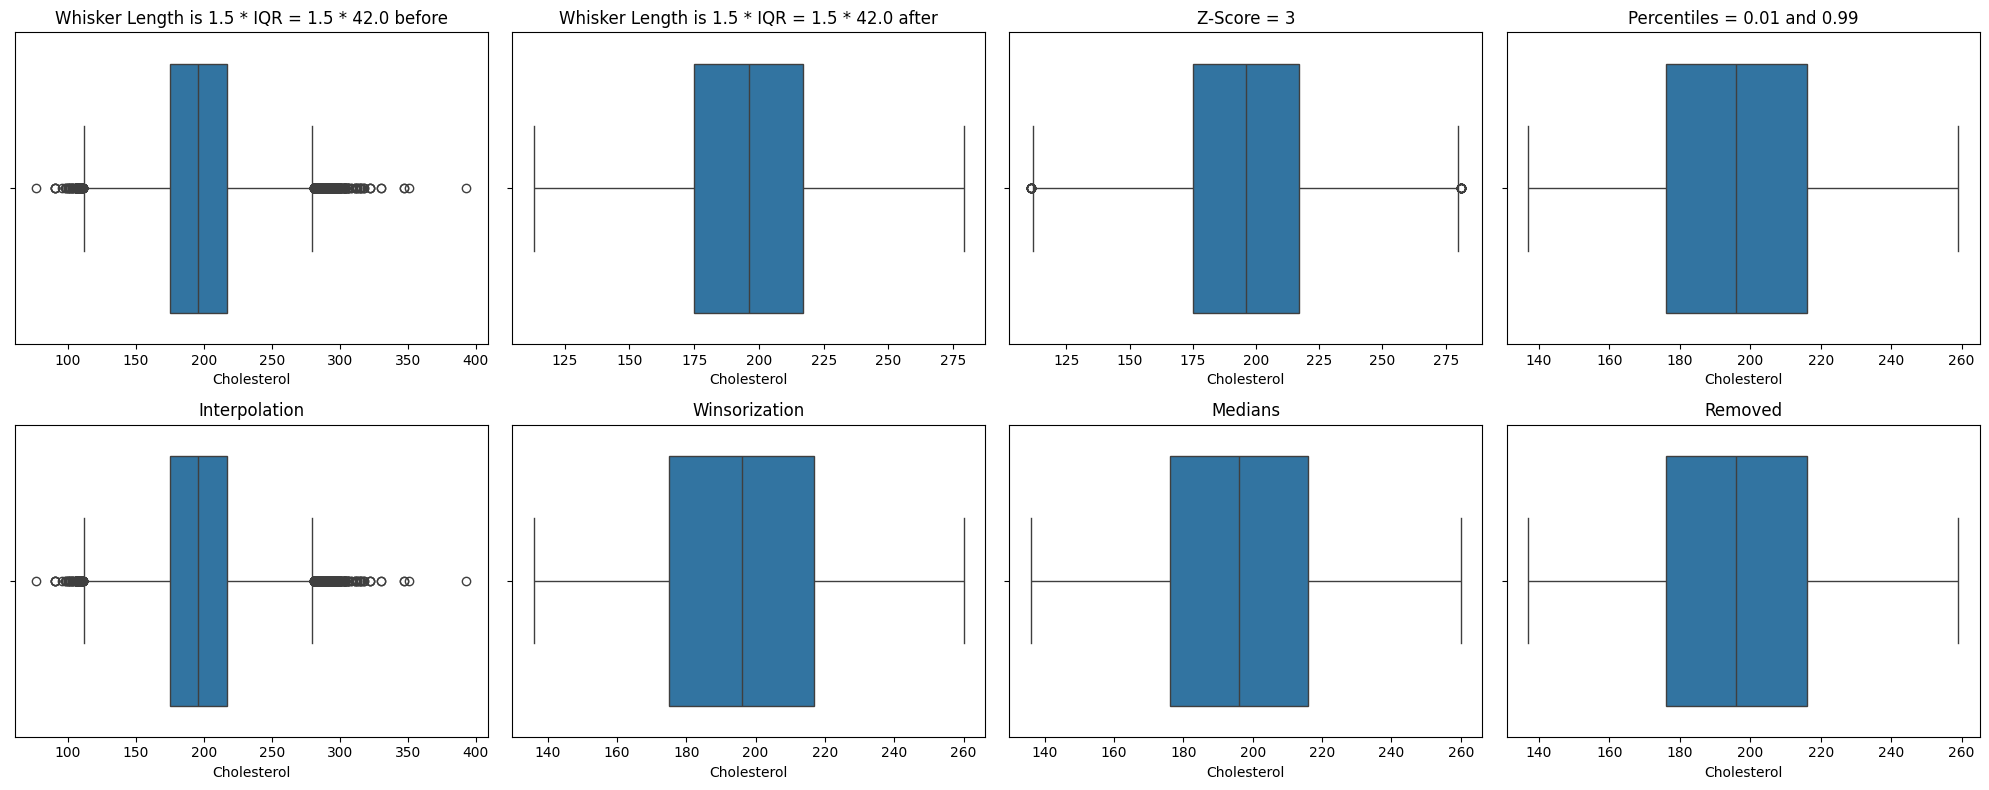

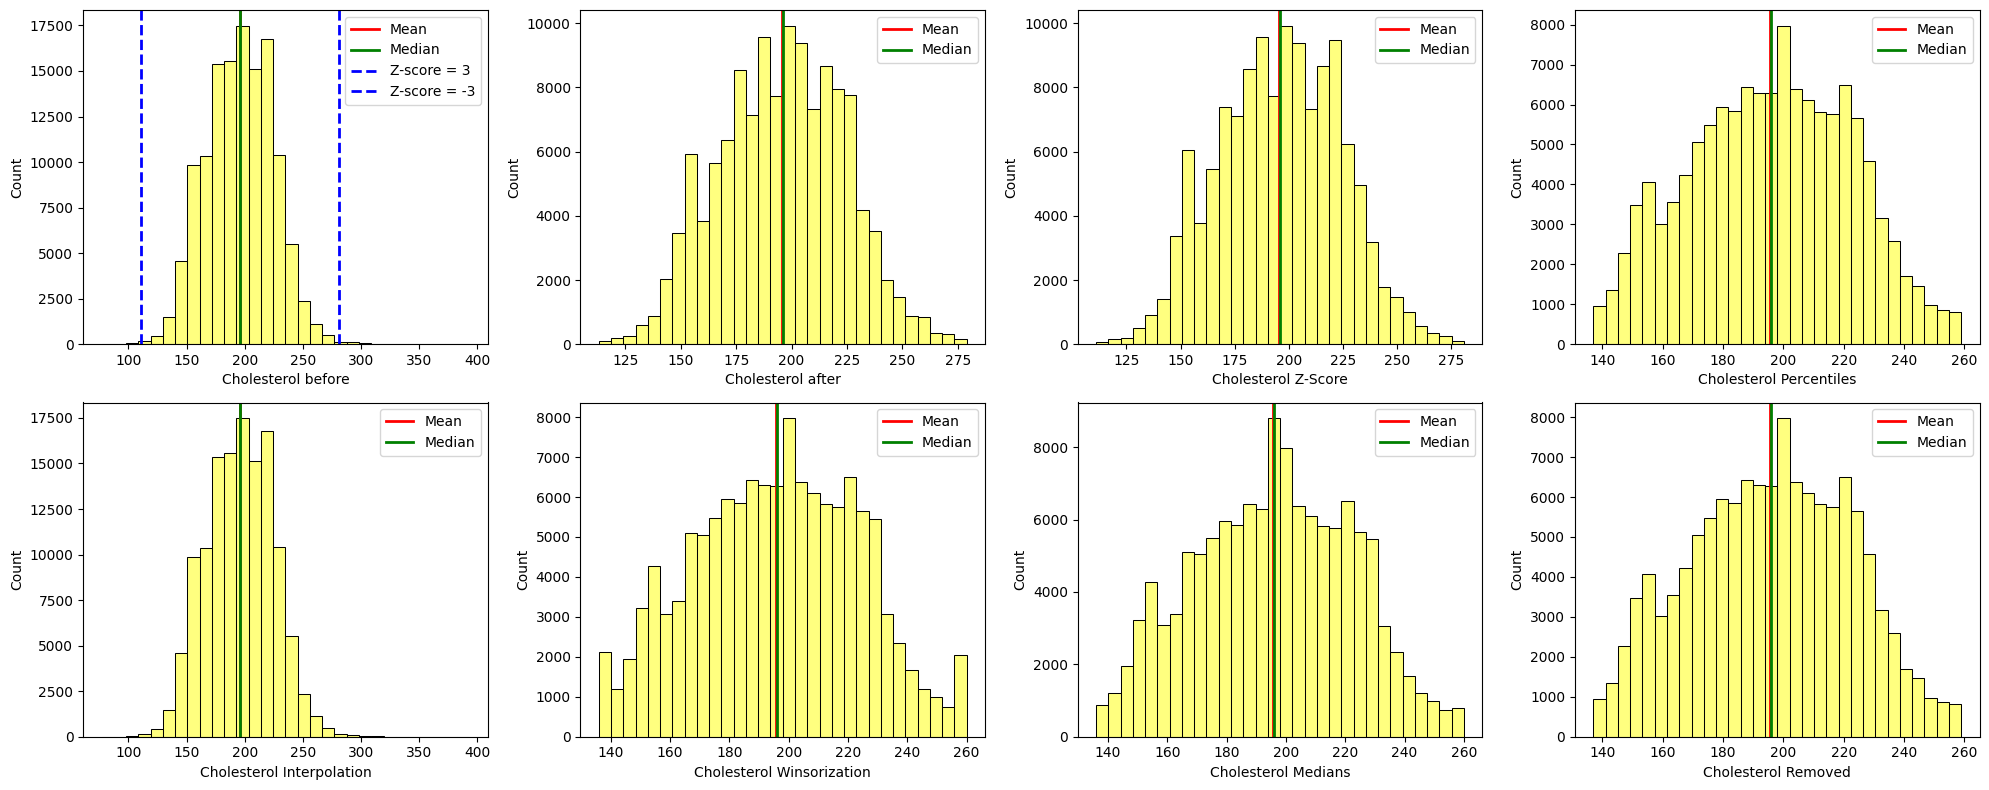

In [100]:
cholesterol_feature = train_df['Cholesterol']
# Handling Outliers using IQR
Cholesterol_q1 = train_df['Cholesterol'].quantile(0.25)
Cholesterol_q3 = train_df['Cholesterol'].quantile(0.75)
Cholesterol_iqr = Cholesterol_q3 - Cholesterol_q1
Cholesterol_lower_limit = Cholesterol_q1 - 1.5 * Cholesterol_iqr
Cholesterol_upper_limit = Cholesterol_q3 + 1.5 * Cholesterol_iqr
Cholesterol_feature_IQR = train_df['Cholesterol'][(train_df['Cholesterol'] > Cholesterol_lower_limit) & (train_df['Cholesterol'] < Cholesterol_upper_limit)]

# Handling Outliers using Z-Score
Cholesterol_mean = train_df['Cholesterol'].mean()
Cholesterol_std = train_df['Cholesterol'].std()
z_score_positive3 = 3 * Cholesterol_std + Cholesterol_mean
z_score_negative3 = -3 * Cholesterol_std + Cholesterol_mean
Cholesterol_feature_Z = train_df['Cholesterol'][(train_df['Cholesterol'] > z_score_negative3) & (train_df['Cholesterol'] < z_score_positive3)]

# Handling Outliers using Percentiles
Cholesterol_lower_limit = train_df['Cholesterol'].quantile(0.01)
Cholesterol_upper_limit = train_df['Cholesterol'].quantile(0.99)
Cholesterol_feature_P = train_df['Cholesterol'][(train_df['Cholesterol'] > Cholesterol_lower_limit) & (train_df['Cholesterol'] < Cholesterol_upper_limit)]

# Handling Outliers using Interpolation
Cholesterol_feature_interpolate = train_df['Cholesterol'].interpolate(method='linear')

# Handling Outliers using Winsorization
Cholesterol_feature_winsorized = train_df['Cholesterol'].clip(lower=Cholesterol_lower_limit, upper=Cholesterol_upper_limit)

# Handling Outliers using medians
Cholesterol_feature_median = train_df['Cholesterol'].copy()
Cholesterol_feature_median[Cholesterol_feature_median > Cholesterol_upper_limit] = train_df['Cholesterol'].median()
Cholesterol_feature_median[Cholesterol_feature_median < Cholesterol_lower_limit] = train_df['Cholesterol'].median()

# Handling Outliers by removing them
Cholesterol_feature_removed = train_df['Cholesterol'][(train_df['Cholesterol'] > Cholesterol_lower_limit) & (train_df['Cholesterol'] < Cholesterol_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Cholesterol Feature before handling outliers
sns.boxplot(x=train_df['Cholesterol'], ax=axes[0, 0])
axes[0, 0].set_xlabel('Cholesterol')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(Cholesterol_iqr, 3)} before")

# Box Plot for Cholesterol Feature after handling outliers using IQR
sns.boxplot(x=Cholesterol_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Cholesterol')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(Cholesterol_iqr, 3)} after")

# Box Plot for Cholesterol Feature after handling outliers using Z-Score
sns.boxplot(x=Cholesterol_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Cholesterol')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Cholesterol Feature after handling outliers using Percentiles
sns.boxplot(x=Cholesterol_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Cholesterol')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Cholesterol Feature after handling outliers using Interpolation
sns.boxplot(x=Cholesterol_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Cholesterol')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Cholesterol Feature after handling outliers using Winsorization
sns.boxplot(x=Cholesterol_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Cholesterol')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Cholesterol Feature after handling outliers using medians
sns.boxplot(x=Cholesterol_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Cholesterol')
axes[1, 2].set_title(f"Medians")

# Box Plot for Cholesterol Feature after handling outliers by removing them
sns.boxplot(x=Cholesterol_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Cholesterol')
axes[1, 3].set_title(f"Removed")



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Cholesterol Feature before handling outliers
sns.histplot(train_df['Cholesterol'], bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Cholesterol before')
axes[0, 0].set_ylabel('Count')
axes[0, 0].axvline(Cholesterol_mean, c='red', ls='-', lw=2)
axes[0, 0].axvline(cholesterol_feature.median(), c='green', ls='-', lw=2)
axes[0, 0].axvline(z_score_positive3, c='blue', ls='--', lw=2)
axes[0, 0].axvline(z_score_negative3, c='blue', ls='--', lw=2)
axes[0, 0].legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Histogram for Cholesterol Feature after handling outliers using IQR
sns.histplot(Cholesterol_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Cholesterol after')
axes[0, 1].set_ylabel('Count')
axes[0, 1].axvline(Cholesterol_feature_IQR.mean(), c='red', ls='-', lw=2)
axes[0, 1].axvline(Cholesterol_feature_IQR.median(), c='green', ls='-', lw=2)
axes[0, 1].legend(labels=['Mean', 'Median'])

# Histogram for Cholesterol Feature after handling outliers using Z-Score
sns.histplot(Cholesterol_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Cholesterol Z-Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].axvline(Cholesterol_feature_Z.mean(), c='red', ls='-', lw=2)
axes[0, 2].axvline(Cholesterol_feature_Z.median(), c='green', ls='-', lw=2)
axes[0, 2].legend(labels=['Mean', 'Median'])

# Histogram for Cholesterol Feature after handling outliers using Percentiles
sns.histplot(Cholesterol_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Cholesterol Percentiles')
axes[0, 3].set_ylabel('Count')
axes[0, 3].axvline(Cholesterol_feature_P.mean(), c='red', ls='-', lw=2)
axes[0, 3].axvline(Cholesterol_feature_P.median(), c='green', ls='-', lw=2)
axes[0, 3].legend(labels=['Mean', 'Median'])

# Histogram for Cholesterol Feature after handling outliers using Interpolation
sns.histplot(Cholesterol_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Cholesterol Interpolation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(Cholesterol_feature_interpolate.mean(), c='red', ls='-', lw=2)
axes[1, 0].axvline(Cholesterol_feature_interpolate.median(), c='green', ls='-', lw=2)
axes[1, 0].legend(labels=['Mean', 'Median'])

# Histogram for Cholesterol Feature after handling outliers using Winsorization
sns.histplot(Cholesterol_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Cholesterol Winsorization')
axes[1, 1].set_ylabel('Count')
axes[1, 1].axvline(Cholesterol_feature_winsorized.mean(), c='red', ls='-', lw=2)
axes[1, 1].axvline(Cholesterol_feature_winsorized.median(), c='green', ls='-', lw=2)
axes[1, 1].legend(labels=['Mean', 'Median'])

# Histogram for Cholesterol Feature after handling outliers using medians
sns.histplot(Cholesterol_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Cholesterol Medians')
axes[1, 2].set_ylabel('Count')
axes[1, 2].axvline(Cholesterol_feature_median.mean(), c='red', ls='-', lw=2)
axes[1, 2].axvline(Cholesterol_feature_median.median(), c='green', ls='-', lw=2)
axes[1, 2].legend(labels=['Mean', 'Median'])

# Histogram for Cholesterol Feature after handling outliers by removing them
sns.histplot(Cholesterol_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Cholesterol Removed')
axes[1, 3].set_ylabel('Count')
axes[1, 3].axvline(Cholesterol_feature_removed.mean(), c='red', ls='-', lw=2)
axes[1, 3].axvline(Cholesterol_feature_removed.median(), c='green', ls='-', lw=2)
axes[1, 3].legend(labels=['Mean', 'Median'])



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### **Feature 9: serum creatinine**

In [89]:

# Descriptive statistics of the serum creatinine feature
serum_creatinine_mean = train_df['serum creatinine'].mean()
serum_creatinine_median = train_df['serum creatinine'].median()
serum_creatinine_std = train_df['serum creatinine'].std()
serum_creatinine_min = train_df['serum creatinine'].min()
serum_creatinine_max = train_df['serum creatinine'].max()
serum_creatinine_iqr = train_df['serum creatinine'].quantile(0.75) - train_df['serum creatinine'].quantile(0.25)
serum_creatinine_skew = train_df['serum creatinine'].skew()
serum_creatinine_kurtosis = train_df['serum creatinine'].kurtosis()
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Create a list of lists for the tabular data
table_data = [
    ["Mean", serum_creatinine_mean],
    ["Median", serum_creatinine_median],
    ["Standard Deviation", serum_creatinine_std],
    ["Minimum Value", serum_creatinine_min],
    ["Maximum Value", serum_creatinine_max],
    ["IQR", serum_creatinine_iqr],
    ["Skewness", serum_creatinine_skew],
    ["Kurtosis", serum_creatinine_kurtosis],
    ["Z-score for 3 std above mean", serum_creatinine_z_score_pos3],
    ["Z-score for 3 std below mean", serum_creatinine_z_score_neg3]
]

# Print the tabulated data
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))


Descriptive Statistics for Serum Creatinine:  
Mean: 0.8928557973062072
Median: 0.9
Standard Deviation: 0.18006845185359852
Minimum Value: 0.1
Maximum Value: 9.9
IQR: 0.19999999999999996
Skewness: 1.8309247414483043
Kurtosis: 72.3607968702462
Z-score for 3 std above mean: 1.4330611528670028
Z-score for 3 std below mean: 0.3526504417454117


 High kurtosis suggests the presence of outliers or heavy tails in this feature.

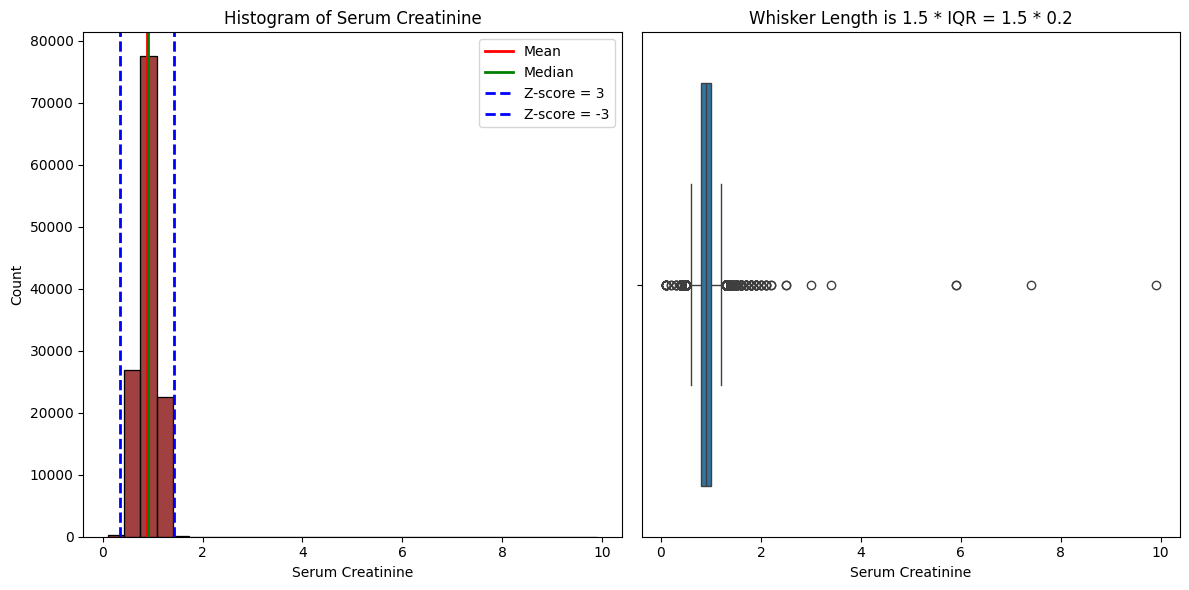

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of serum creatinine feature
sns.histplot(train_df['serum creatinine'], bins=30, color="maroon", ax=ax1)
ax1.set_xlabel('Serum Creatinine')
ax1.set_ylabel('Count')
ax1.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
ax1.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
ax1.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
ax1.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)
ax1.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
ax1.set_title('Histogram of Serum Creatinine')

# Boxplot of serum creatinine feature
sns.boxplot(x=train_df['serum creatinine'], ax=ax2)
ax2.set_xlabel('Serum Creatinine')
ax2.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [92]:
#Analysis after removing the skewed data
serum_creatinine_feature = train_df[train_df['serum creatinine'] < 2.5]['serum creatinine']

# Central Tendency Measures
serum_creatinine_mean = serum_creatinine_feature.mean()
serum_creatinine_median = serum_creatinine_feature.median()
serum_creatinine_iqr = serum_creatinine_feature.quantile(0.75) - serum_creatinine_feature.quantile(0.25)
serum_creatinine_std = serum_creatinine_feature.std()
serum_creatinine_skew = serum_creatinine_feature.skew()
serum_creatinine_kurtosis = serum_creatinine_feature.kurtosis()
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(serum_creatinine_mean, 3)],
    ["Median", round(serum_creatinine_median, 3)],
    ["Standard Deviation", round(serum_creatinine_std, 3)],
    ["IQR", round(serum_creatinine_iqr, 3)],
    ["Skew", round(serum_creatinine_skew, 3)],
    ["Kurtosis", round(serum_creatinine_kurtosis, 3)],
    ["Z-score for 3 std above mean", round(serum_creatinine_z_score_pos3, 3)],
    ["Z-score for 3 std below mean", round(serum_creatinine_z_score_neg3, 3)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))




+------------------------------+---------+
| Statistic                    |   Value |
+==============================+=========+
| Mean                         |   0.893 |
+------------------------------+---------+
| Median                       |   0.9   |
+------------------------------+---------+
| Standard Deviation           |   0.176 |
+------------------------------+---------+
| IQR                          |   0.2   |
+------------------------------+---------+
| Skew                         |   0.107 |
+------------------------------+---------+
| Kurtosis                     |   0.193 |
+------------------------------+---------+
| Z-score for 3 std above mean |   1.42  |
+------------------------------+---------+
| Z-score for 3 std below mean |   0.365 |
+------------------------------+---------+


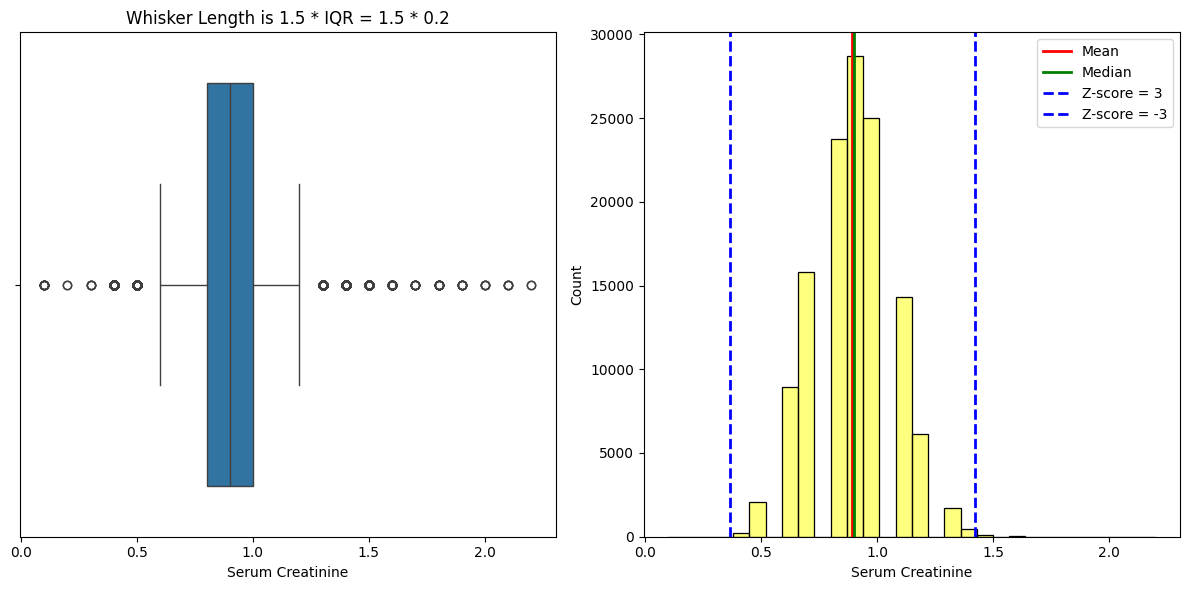

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot after removing skewed data
sns.boxplot(x=serum_creatinine_feature, ax=ax1)
ax1.set_xlabel('Serum Creatinine')
ax1.set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")

# Barplot after removing skewed data
sns.histplot(serum_creatinine_feature, bins=30, alpha=0.5, color="yellow", ax=ax2)
ax2.set_xlabel('Serum Creatinine')
ax2.set_ylabel('Count')
ax2.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
ax2.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
ax2.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
ax2.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)
ax2.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

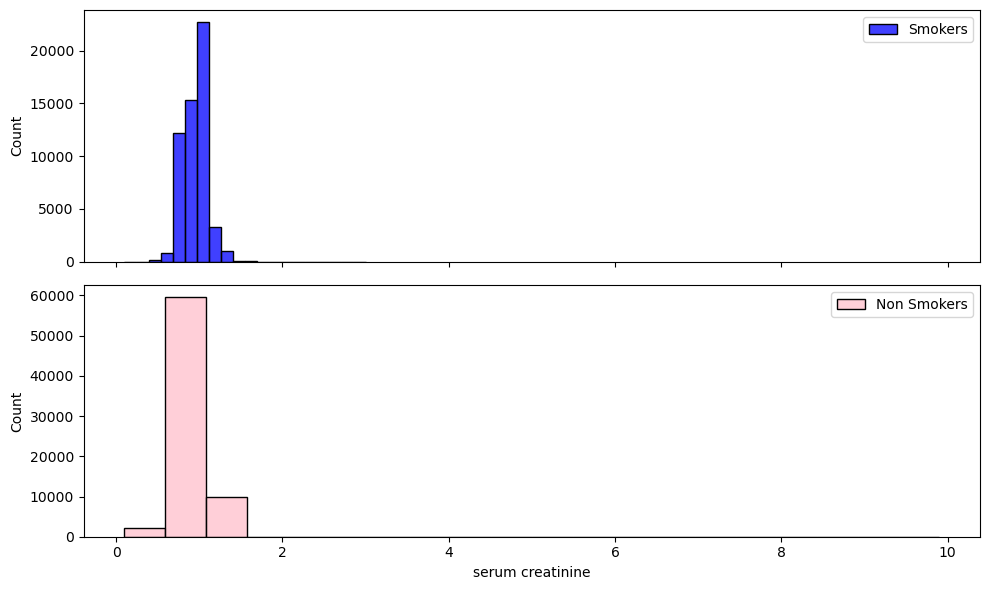

Analysis of Serum Creatinine with repect to Non Smokers:
Mean: 0.85
Standard Deviation: 0.19
Mean: 0.85
Standard Deviation: 0.19
Skewness: 2.9
Kurtosis: 101.82


Analysis of Serum Creatinine with repect to Smokers:
Mean: 0.95
Standard Deviation: 0.15
Mean: 0.95
Standard Deviation: 0.15
Skewness: 0.19
Kurtosis: 1.59


In [45]:
#serum creatinine feature with respect to the target variable
serum_creatinine_smokers = train_df[train_df['smoking'] == 1]['serum creatinine']
serum_creatinine_nonsmokers = train_df[train_df['smoking'] == 0]['serum creatinine']

# Creating subplots for serum creatinine feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)  

sns.histplot(data=serum_creatinine_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=serum_creatinine_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Descriptive statistics of the serum creatinine feature

print("Analysis of Serum Creatinine with repect to Non Smokers:")
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Skewness:", round(serum_creatinine_nonsmokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_nonsmokers.kurtosis(), 2))

print("\n")

print("Analysis of Serum Creatinine with repect to Smokers:")
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Skewness:", round(serum_creatinine_smokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_smokers.kurtosis(), 2))

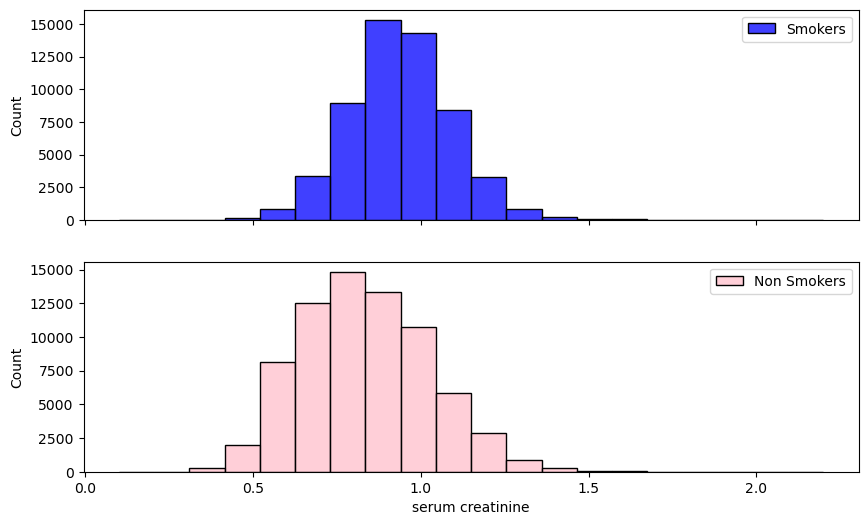

Analysis of Serum Creatinine with repect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |    0.95 |
+--------------------+---------+
| Standard Deviation |    0.15 |
+--------------------+---------+
| Median             |    0.9  |
+--------------------+---------+
| Standard Deviation |    0.15 |
+--------------------+---------+
| Skewness           |    0.12 |
+--------------------+---------+
| Kurtosis           |    0.7  |
+--------------------+---------+


Analysis of Serum Creatinine with repect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |    0.85 |
+--------------------+---------+
| Standard Deviation |    0.18 |
+--------------------+---------+
| Median             |    0.8  |
+--------------------+---------+
| Standard Deviation |    0.18 |
+--------------------+---------+
| Skewness           |    0.38 

In [46]:
#Analyzing with respect to target variable after removing outliers
serum_creatinine_df = train_df[train_df['serum creatinine'] < 2.5]
serum_smokers = serum_creatinine_df[serum_creatinine_df['smoking'] == 1]['serum creatinine']
serum_nonsmokers = serum_creatinine_df[serum_creatinine_df['smoking'] == 0]['serum creatinine']

# Creating subplots for serum creatinine feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=serum_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=serum_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the serum creatinine feature
print("Analysis of Serum Creatinine with repect to Smokers:")
table_data = [
    ["Mean", round(serum_smokers.mean(), 2)],
    ["Standard Deviation", round(serum_smokers.std(), 2)],
    ["Median", round(serum_smokers.median(), 2)],
    ["Standard Deviation", round(serum_smokers.std(), 2)],
    ["Skewness", round(serum_smokers.skew(), 2)],
    ["Kurtosis", round(serum_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Serum Creatinine with repect to nonsmokers:")
table_data=[
    ["Mean", round(serum_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(serum_nonsmokers.std(), 2)],
    ["Median", round(serum_nonsmokers.median(), 2)],
    ["Standard Deviation", round(serum_nonsmokers.std(), 2)],
    ["Skewness", round(serum_nonsmokers.skew(), 2)],
    ["Kurtosis", round(serum_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

### **Handling Outliers**

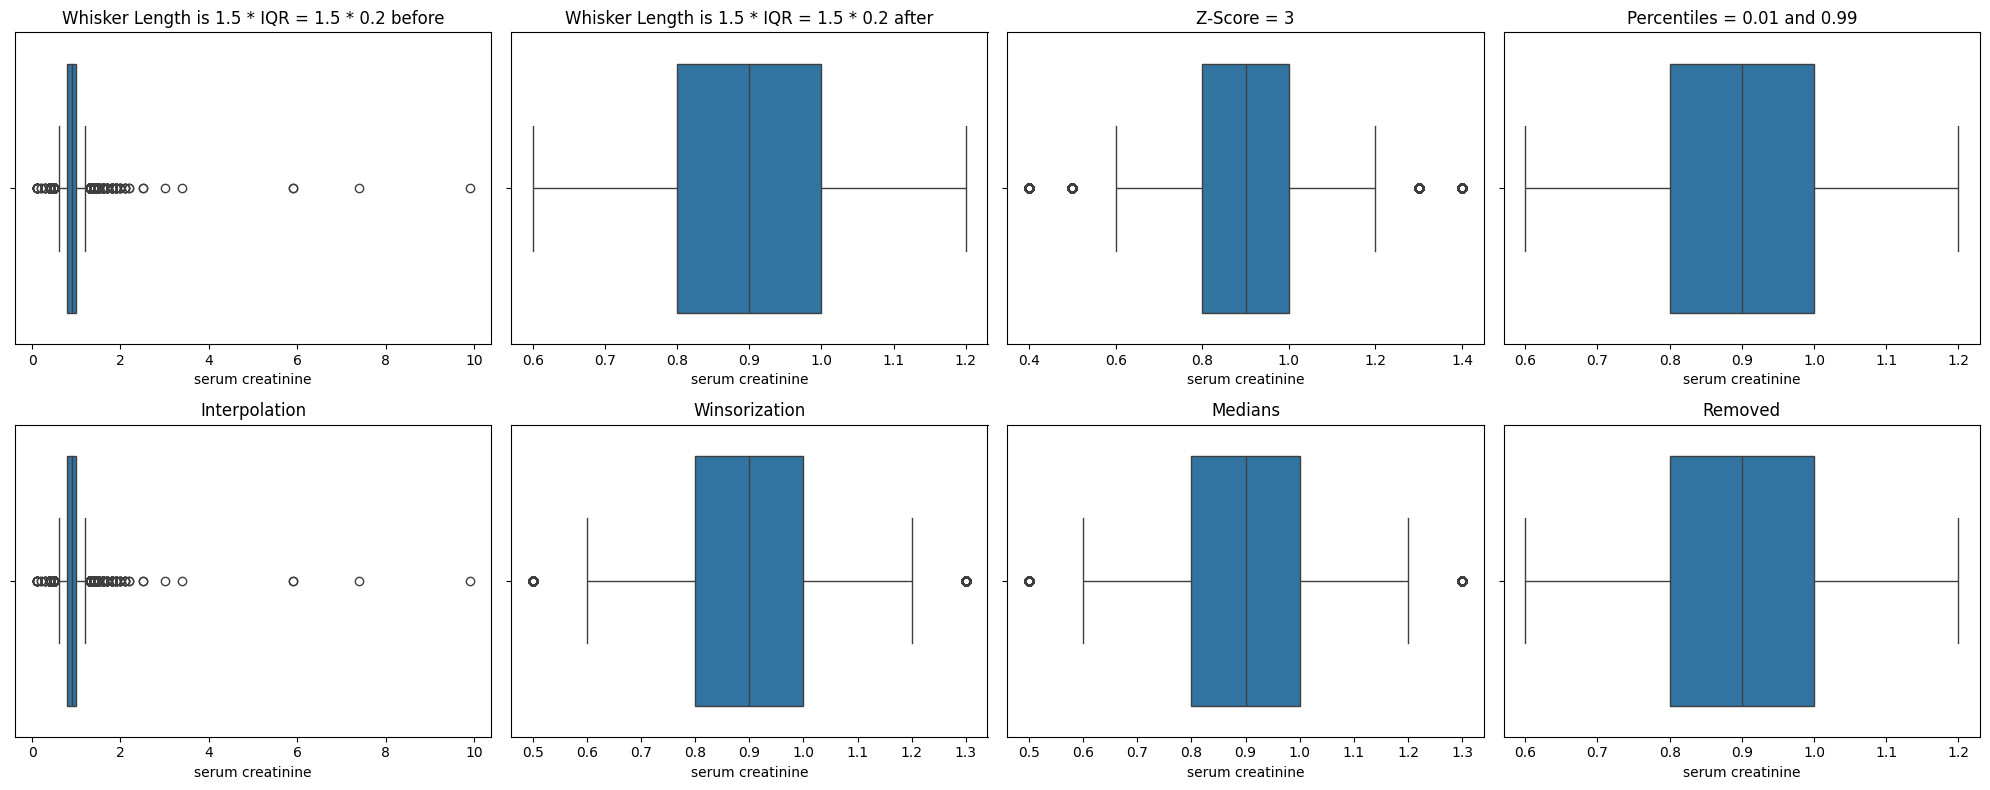

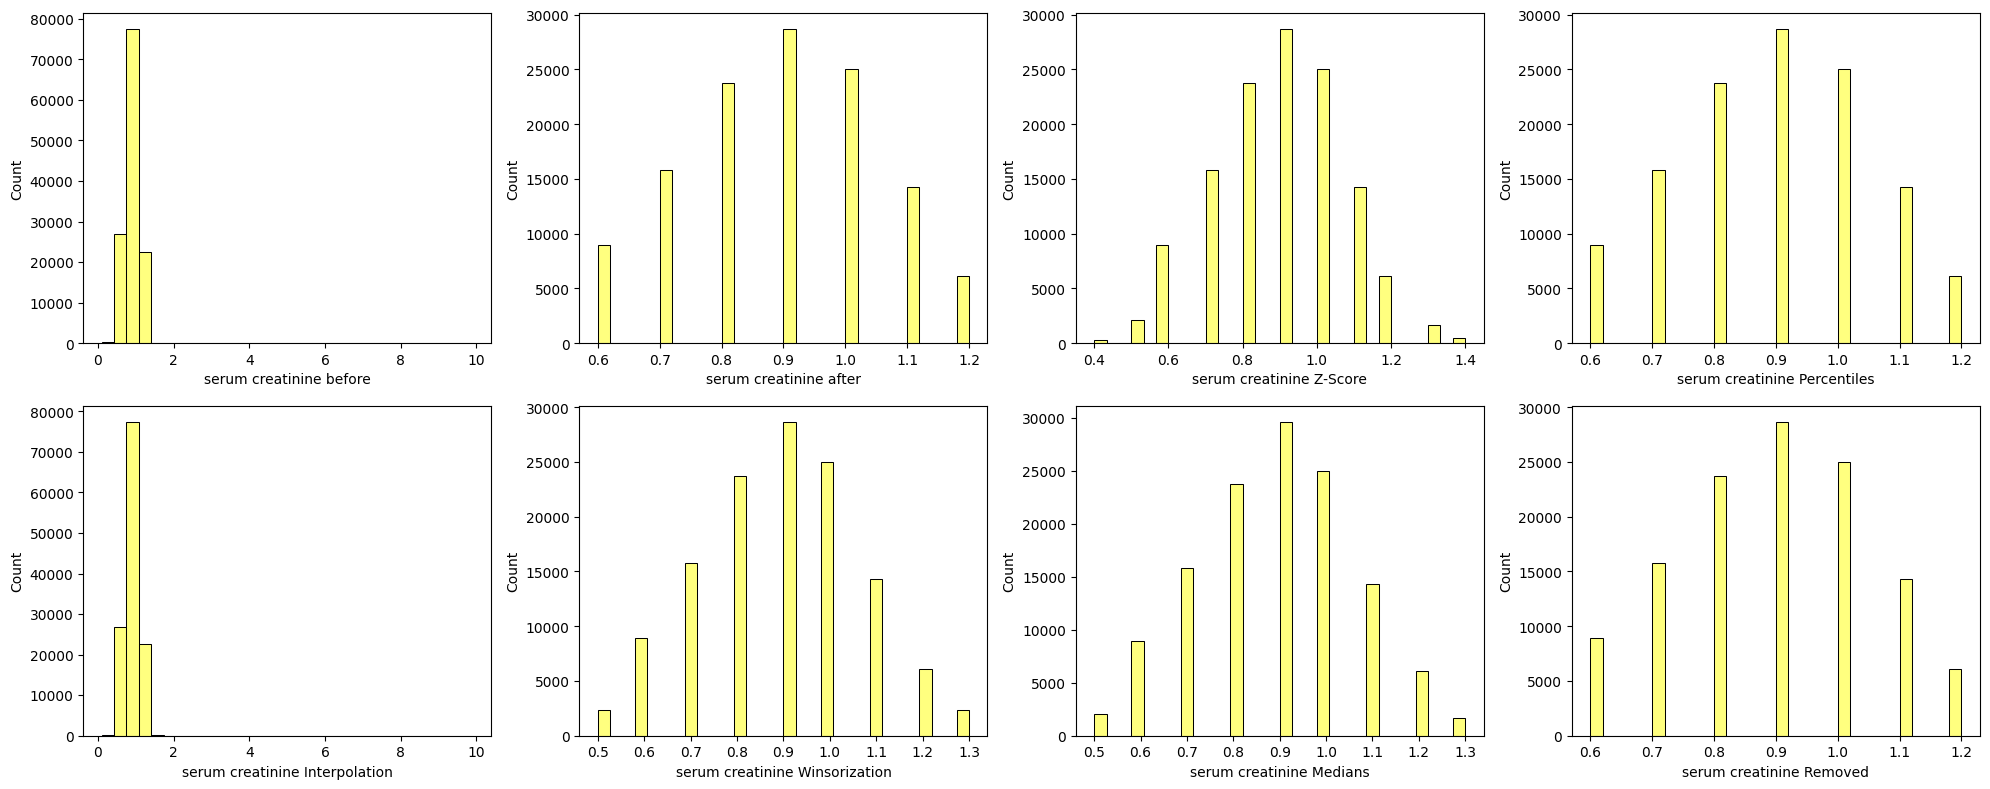

In [97]:
# Handling Outliers using IQR
serum_creatinine_q1 = train_df['serum creatinine'].quantile(0.25)
serum_creatinine_q3 = train_df['serum creatinine'].quantile(0.75)
serum_creatinine_iqr = serum_creatinine_q3 - serum_creatinine_q1
serum_creatinine_lower_limit = serum_creatinine_q1 - 1.5 * serum_creatinine_iqr
serum_creatinine_upper_limit = serum_creatinine_q3 + 1.5 * serum_creatinine_iqr
serum_creatinine_feature_IQR = train_df['serum creatinine'][(train_df['serum creatinine'] > serum_creatinine_lower_limit) & (train_df['serum creatinine'] < serum_creatinine_upper_limit)]

# Handling Outliers using Z-Score
serum_creatinine_mean = train_df['serum creatinine'].mean()
serum_creatinine_std = train_df['serum creatinine'].std()
z_score_positive3 = 3 * serum_creatinine_std + serum_creatinine_mean
z_score_negative3 = -3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_feature_Z = train_df['serum creatinine'][(train_df['serum creatinine'] > z_score_negative3) & (train_df['serum creatinine'] < z_score_positive3)]

# Handling Outliers using Percentiles
serum_creatinine_lower_limit = train_df['serum creatinine'].quantile(0.01)
serum_creatinine_upper_limit = train_df['serum creatinine'].quantile(0.99)
serum_creatinine_feature_P = train_df['serum creatinine'][(train_df['serum creatinine'] > serum_creatinine_lower_limit) & (train_df['serum creatinine'] < serum_creatinine_upper_limit)]

# Handling Outliers using Interpolation
serum_creatinine_feature_interpolate = train_df['serum creatinine'].interpolate(method='linear')

# Handling Outliers using Winsorization
serum_creatinine_feature_winsorized = train_df['serum creatinine'].clip(lower=serum_creatinine_lower_limit, upper=serum_creatinine_upper_limit)

# Handling Outliers using medians
serum_creatinine_feature_median = train_df['serum creatinine'].copy()
serum_creatinine_feature_median[serum_creatinine_feature_median > serum_creatinine_upper_limit] = train_df['serum creatinine'].median()
serum_creatinine_feature_median[serum_creatinine_feature_median < serum_creatinine_lower_limit] = train_df['serum creatinine'].median()

# Handling Outliers by removing them
serum_creatinine_feature_removed = train_df['serum creatinine'][(train_df['serum creatinine'] > serum_creatinine_lower_limit) & (train_df['serum creatinine'] < serum_creatinine_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for serum creatinine Feature before handling outliers
sns.boxplot(x=train_df['serum creatinine'], ax=axes[0, 0])
axes[0, 0].set_xlabel('serum creatinine')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)} before")

# Box Plot for serum creatinine Feature after handling outliers using IQR
sns.boxplot(x=serum_creatinine_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('serum creatinine')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)} after")

# Box Plot for serum creatinine Feature after handling outliers using Z-Score
sns.boxplot(x=serum_creatinine_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('serum creatinine')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for serum creatinine Feature after handling outliers using Percentiles
sns.boxplot(x=serum_creatinine_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('serum creatinine')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for serum creatinine Feature after handling outliers using Interpolation
sns.boxplot(x=serum_creatinine_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('serum creatinine')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for serum creatinine Feature after handling outliers using Winsorization
sns.boxplot(x=serum_creatinine_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('serum creatinine')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for serum creatinine Feature after handling outliers using medians
sns.boxplot(x=serum_creatinine_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('serum creatinine')
axes[1, 2].set_title(f"Medians")

# Box Plot for serum creatinine Feature after handling outliers by removing them
sns.boxplot(x=serum_creatinine_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('serum creatinine')
axes[1, 3].set_title(f"Removed")



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for serum creatinine Feature before handling outliers
sns.histplot(train_df['serum creatinine'], bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('serum creatinine before')
axes[0, 0].set_ylabel('Count')

# Histogram for serum creatinine Feature after handling outliers using IQR
sns.histplot(serum_creatinine_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('serum creatinine after')
axes[0, 1].set_ylabel('Count')

# Histogram for serum creatinine Feature after handling outliers using Z-Score
sns.histplot(serum_creatinine_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('serum creatinine Z-Score')
axes[0, 2].set_ylabel('Count')

# Histogram for serum creatinine Feature after handling outliers using Percentiles
sns.histplot(serum_creatinine_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('serum creatinine Percentiles')
axes[0, 3].set_ylabel('Count')

# Histogram for serum creatinine Feature after handling outliers using Interpolation
sns.histplot(serum_creatinine_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('serum creatinine Interpolation')
axes[1, 0].set_ylabel('Count')

# Histogram for serum creatinine Feature after handling outliers using Winsorization
sns.histplot(serum_creatinine_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('serum creatinine Winsorization')
axes[1, 1].set_ylabel('Count')

# Histogram for serum creatinine Feature after handling outliers using medians
sns.histplot(serum_creatinine_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('serum creatinine Medians')
axes[1, 2].set_ylabel('Count')

# Histogram for serum creatinine Feature after handling outliers by removing them
sns.histplot(serum_creatinine_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('serum creatinine Removed')
axes[1, 3].set_ylabel('Count')



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




### **Feature 10: Gtp**

In [47]:
#descriptive statistics of the Gtp feature
gtp_mean = train_df['Gtp'].mean()
gtp_median = train_df['Gtp'].median()
gtp_std = train_df['Gtp'].std()
gtp_min = train_df['Gtp'].min()
gtp_max = train_df['Gtp'].max()
gtp_iqr = train_df['Gtp'].quantile(0.75) - train_df['Gtp'].quantile(0.25)
gtp_skew = train_df['Gtp'].skew()
gtp_kurtosis = train_df['Gtp'].kurtosis() #measure taildness of the distribution
gtp_z_score_pos3 = 3 * gtp_std + gtp_mean
gtp_z_score_neg3 = -3 * gtp_std + gtp_mean

print("Descriptive Statistics for Gtp:  ")
print(f"Mean: {gtp_mean}")
print(f"Median: {gtp_median}")
print(f"Standard Deviation: {gtp_std}")
print(f"Minimum Value: {gtp_min}")
print(f"Maximum Value: {gtp_max}")
print(f"IQR: {gtp_iqr}")
print(f"Skewness: {gtp_skew}")
print(f"Kurtosis: {gtp_kurtosis}")
print(f"Z-score for 3 std above mean: {gtp_z_score_pos3}")
print(f"Z-score for 3 std below mean: {gtp_z_score_neg3}")



Descriptive Statistics for Gtp:  
Mean: 36.16566198863458
Median: 27.0
Standard Deviation: 31.181943739331544
Minimum Value: 2
Maximum Value: 999
IQR: 26.0
Skewness: 5.475593063546785
Kurtosis: 71.87277174710093
Z-score for 3 std above mean: 129.7114932066292
Z-score for 3 std below mean: -57.38016922936005


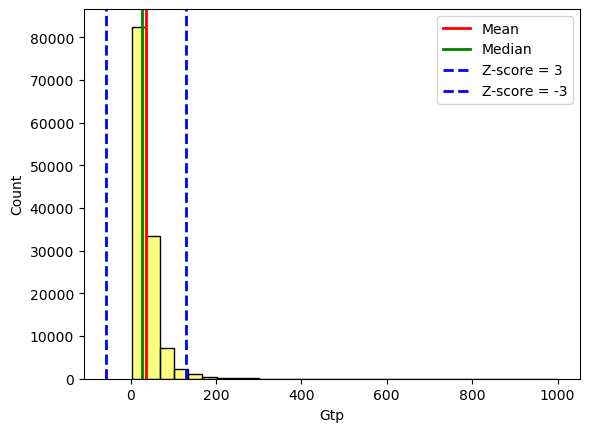

In [48]:
#histogram of Gtp feature without the target
sns.histplot(train_df['Gtp'], bins=30, alpha=0.5, color="yellow")
plt.xlabel('Gtp')
plt.ylabel('Count')
plt.axvline(gtp_mean, c='red', ls='-', lw=2)
plt.axvline(gtp_median, c='green', ls='-', lw=2)
plt.axvline(gtp_z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(gtp_z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

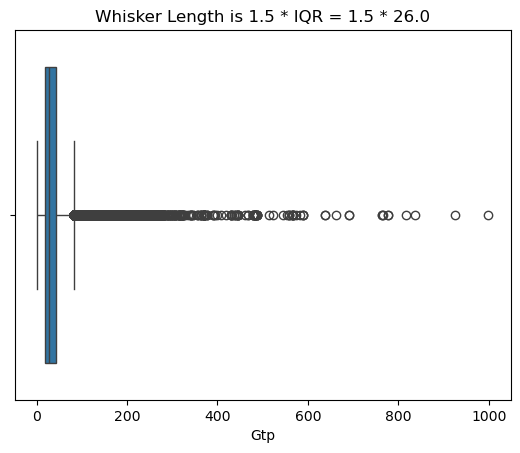

In [49]:
#boxplot of Gtp feature without the target
sns.boxplot(x=train_df['Gtp'])
plt.xlabel('Gtp')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(gtp_iqr, 3)}")
plt.show()


Descriptive Statistics for Gtp:  
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   34.19 |
+--------------------+---------+
| Standard Deviation |   22.91 |
+--------------------+---------+
| Median             |   27    |
+--------------------+---------+
| Standard Deviation |   22.91 |
+--------------------+---------+
| Skewness           |    1.79 |
+--------------------+---------+
| Kurtosis           |    3.84 |
+--------------------+---------+


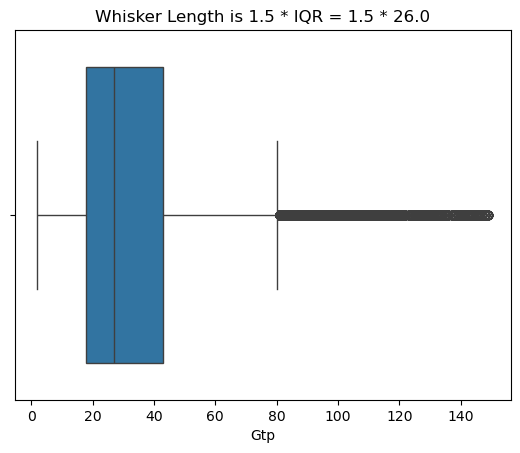

In [50]:
#removing outliers in the Gtp feature
gtp_feature = train_df[train_df['Gtp'] < 150]['Gtp']

# Central Tendency Measures
table_data=[
    ["Mean", round(gtp_feature.mean(), 2)],
    ["Standard Deviation", round(gtp_feature.std(), 2)],
    ["Median", round(gtp_feature.median(), 2)],
    ["Standard Deviation", round(gtp_feature.std(), 2)],
    ["Skewness", round(gtp_feature.skew(), 2)],
    ["Kurtosis", round(gtp_feature.kurtosis(), 2)]
]

print("Descriptive Statistics for Gtp:  ")
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

#boxplot of Gtp feature without the target
sns.boxplot(x=gtp_feature)
plt.xlabel('Gtp')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(gtp_iqr, 3)}")
plt.show()

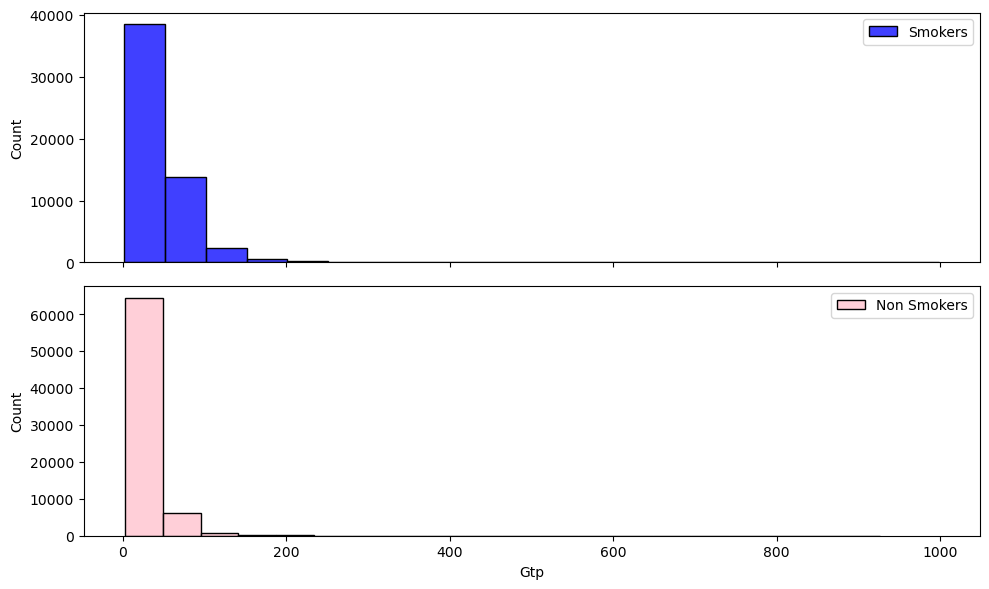

Analysis of Serum Creatinine with repect to Non Smokers:
Mean: 0.85
Standard Deviation: 0.19
Mean: 0.85
Standard Deviation: 0.19
Skewness: 2.9
Kurtosis: 101.82


Analysis of Serum Creatinine with repect to Smokers:
Mean: 0.95
Standard Deviation: 0.15
Mean: 0.95
Standard Deviation: 0.15
Skewness: 0.19
Kurtosis: 1.59


In [51]:
#histogram of Gtp feature with the target
gtp_smokers = train_df[train_df['smoking'] == 1]['Gtp']
gtp_nonsmokers = train_df[train_df['smoking'] == 0]['Gtp']

# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout()
plt.show()

# Descriptive statistics of the serum creatinine feature

print("Analysis of Serum Creatinine with repect to Non Smokers:")
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Skewness:", round(serum_creatinine_nonsmokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_nonsmokers.kurtosis(), 2))

print("\n")

print("Analysis of Serum Creatinine with repect to Smokers:")
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Skewness:", round(serum_creatinine_smokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_smokers.kurtosis(), 2))


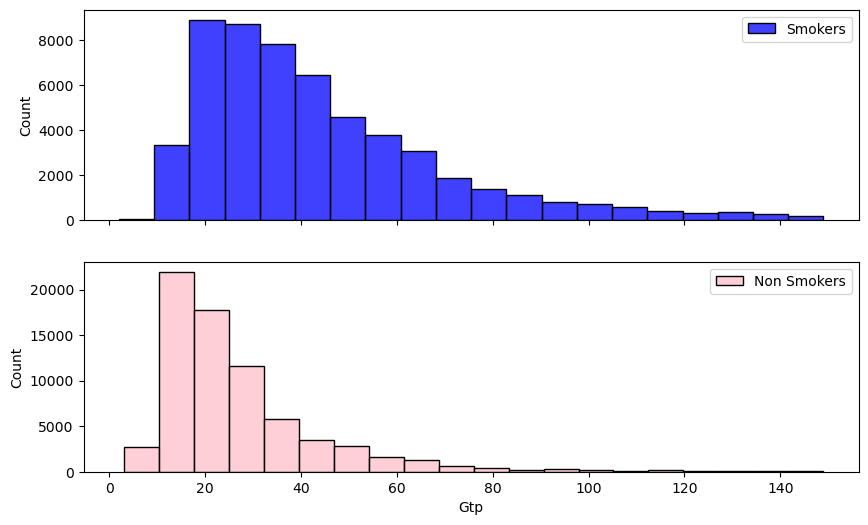

Analysis of Gtp with respect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   43.71 |
+--------------------+---------+
| Standard Deviation |   25.31 |
+--------------------+---------+
| Median             |   37    |
+--------------------+---------+
| Standard Deviation |   25.31 |
+--------------------+---------+
| Skewness           |    1.41 |
+--------------------+---------+
| Kurtosis           |    2.1  |
+--------------------+---------+


Analysis of Gtp with respect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   26.94 |
+--------------------+---------+
| Standard Deviation |   17.74 |
+--------------------+---------+
| Median             |   21    |
+--------------------+---------+
| Standard Deviation |   17.74 |
+--------------------+---------+
| Skewness           |    2.36 |
+--------------------+

In [52]:
#Analyzing with respect to target variable after removing outliers
Gtp_df = train_df[train_df['Gtp'] < 150]
Gtp_smokers = Gtp_df[Gtp_df['smoking'] == 1]['Gtp']
Gtp_nonsmokers = Gtp_df[Gtp_df['smoking'] == 0]['Gtp']


# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=Gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=Gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the Gtp feature
print("Analysis of Gtp with respect to Smokers:")
table_data = [
    ["Mean", round(Gtp_smokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Median", round(Gtp_smokers.median(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Skewness", round(Gtp_smokers.skew(), 2)],
    ["Kurtosis", round(Gtp_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Gtp with respect to nonsmokers:")
table_data=[
    ["Mean", round(Gtp_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Median", round(Gtp_nonsmokers.median(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Skewness", round(Gtp_nonsmokers.skew(), 2)],
    ["Kurtosis", round(Gtp_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

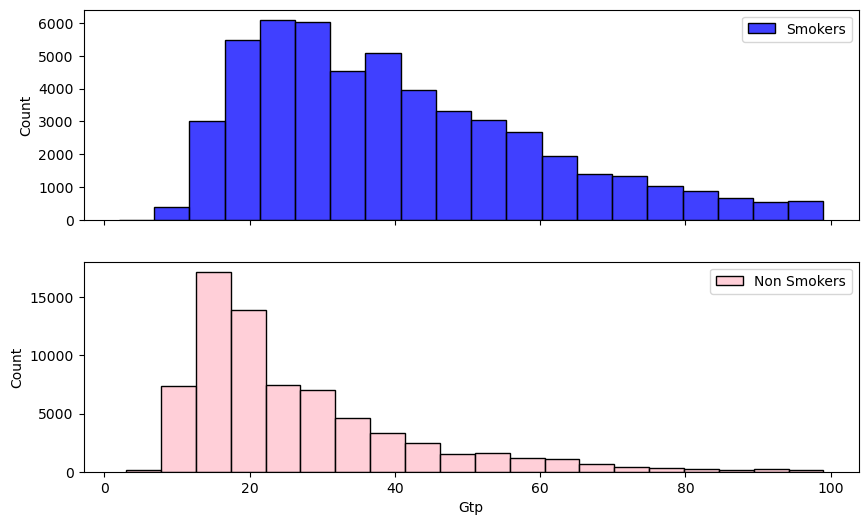

Analysis of Gtp with respect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   40.18 |
+--------------------+---------+
| Standard Deviation |   19.64 |
+--------------------+---------+
| Median             |   36    |
+--------------------+---------+
| Standard Deviation |   19.64 |
+--------------------+---------+
| Skewness           |    0.84 |
+--------------------+---------+
| Kurtosis           |    0.11 |
+--------------------+---------+


Analysis of Gtp with respect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   26.06 |
+--------------------+---------+
| Standard Deviation |   15.36 |
+--------------------+---------+
| Median             |   21    |
+--------------------+---------+
| Standard Deviation |   15.36 |
+--------------------+---------+
| Skewness           |    1.72 |
+--------------------+

In [68]:
#Examining another case of dropping outliers
Gtp_df_drop_outlier = train_df[train_df['Gtp'] < 100]
Gtp_smokers = Gtp_df_drop_outlier[Gtp_df_drop_outlier['smoking'] == 1]['Gtp']
Gtp_nonsmokers = Gtp_df_drop_outlier[Gtp_df_drop_outlier['smoking'] == 0]['Gtp']


# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=Gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=Gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the Gtp feature
print("Analysis of Gtp with respect to Smokers:")
table_data = [
    ["Mean", round(Gtp_smokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Median", round(Gtp_smokers.median(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Skewness", round(Gtp_smokers.skew(), 2)],
    ["Kurtosis", round(Gtp_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Gtp with respect to nonsmokers:")
table_data=[
    ["Mean", round(Gtp_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Median", round(Gtp_nonsmokers.median(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Skewness", round(Gtp_nonsmokers.skew(), 2)],
    ["Kurtosis", round(Gtp_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

### **Handling Outlier**

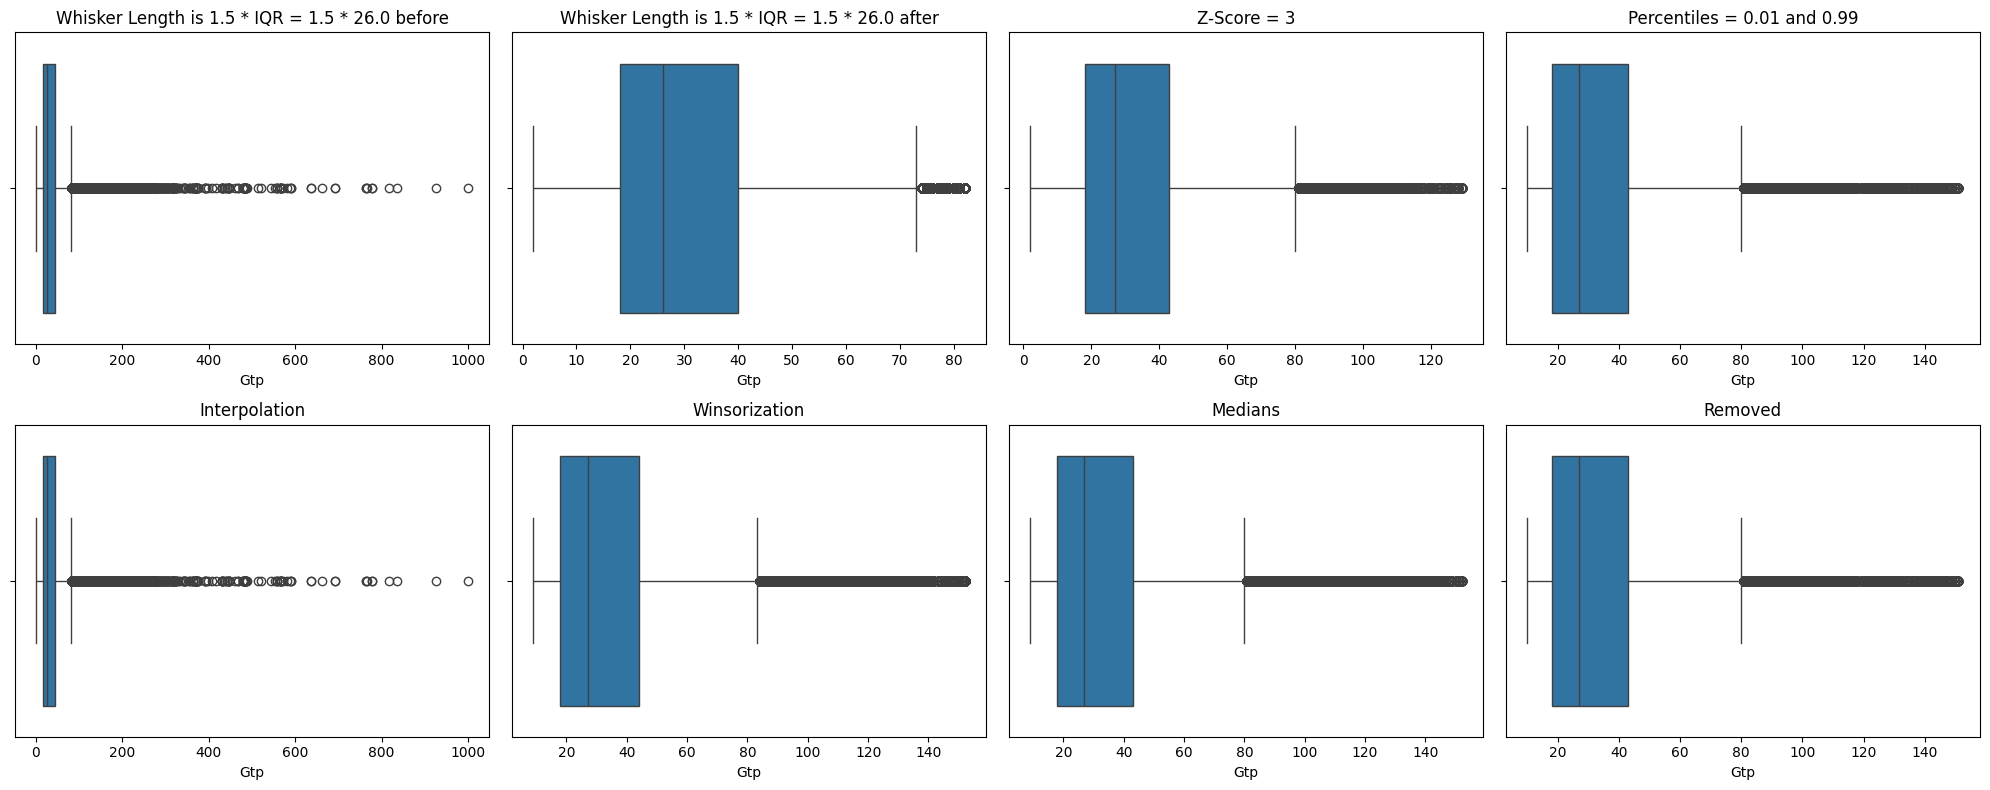

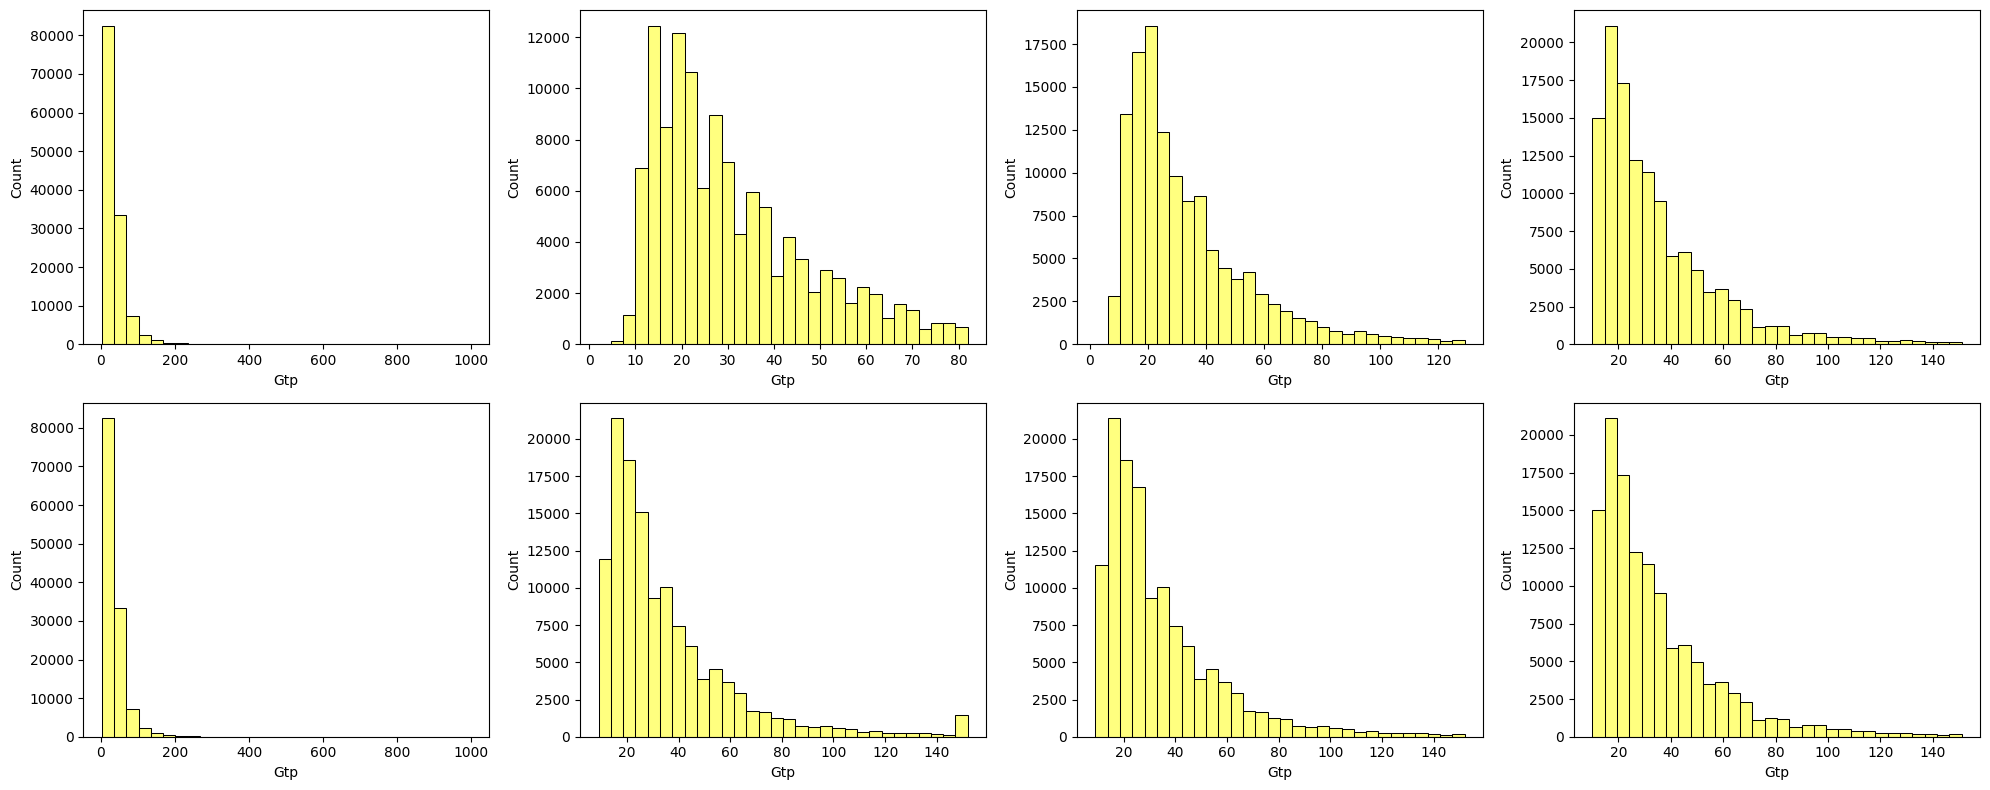

In [98]:
Gtp_feature = train_df['Gtp']
# Handling Outliers using IQR
Gtp_q1 = Gtp_feature.quantile(0.25)
Gtp_q3 = Gtp_feature.quantile(0.75)
Gtp_iqr = Gtp_q3 - Gtp_q1
Gtp_lower_limit = Gtp_q1 - 1.5 * Gtp_iqr
Gtp_upper_limit = Gtp_q3 + 1.5 * Gtp_iqr
Gtp_feature_IQR = Gtp_feature[(Gtp_feature > Gtp_lower_limit) & (Gtp_feature < Gtp_upper_limit)]

# Handling Outliers using Z-Score
Gtp_mean = Gtp_feature.mean()
Gtp_std = Gtp_feature.std()
z_score_positive3 = 3 * Gtp_std + Gtp_mean
z_score_negative3 = -3 * Gtp_std + Gtp_mean
Gtp_feature_Z = Gtp_feature[(Gtp_feature > z_score_negative3) & (Gtp_feature < z_score_positive3)]

# Handling Outliers using Percentiles
Gtp_lower_limit = Gtp_feature.quantile(0.01)
Gtp_upper_limit = Gtp_feature.quantile(0.99)
Gtp_feature_P = Gtp_feature[(Gtp_feature > Gtp_lower_limit) & (Gtp_feature < Gtp_upper_limit)]

# Handling Outliers using Interpolation
Gtp_feature_interpolate = Gtp_feature.interpolate(method='linear')

# Handling Outliers using Winsorization
Gtp_feature_winsorized = Gtp_feature.clip(lower=Gtp_lower_limit, upper=Gtp_upper_limit)

# Handling Outliers using medians
Gtp_feature_median = Gtp_feature.copy()
Gtp_feature_median[Gtp_feature_median > Gtp_upper_limit] = Gtp_feature.median()
Gtp_feature_median[Gtp_feature_median < Gtp_lower_limit] = Gtp_feature.median()

# Handling Outliers by removing them
Gtp_feature_removed = Gtp_feature[(Gtp_feature > Gtp_lower_limit) & (Gtp_feature < Gtp_upper_limit)]

# Create subplots of Outliers before and after handling box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Box Plot for Gtp Feature before handling outliers
sns.boxplot(x=Gtp_feature, ax=axes[0, 0])
axes[0, 0].set_xlabel('Gtp')
axes[0, 0].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(Gtp_iqr, 3)} before")

# Box Plot for Gtp Feature after handling outliers using IQR
sns.boxplot(x=Gtp_feature_IQR, ax=axes[0, 1])
axes[0, 1].set_xlabel('Gtp')
axes[0, 1].set_title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(Gtp_iqr, 3)} after")

# Box Plot for Gtp Feature after handling outliers using Z-Score
sns.boxplot(x=Gtp_feature_Z, ax=axes[0, 2])
axes[0, 2].set_xlabel('Gtp')
axes[0, 2].set_title(f"Z-Score = 3")

# Box Plot for Gtp Feature after handling outliers using Percentiles
sns.boxplot(x=Gtp_feature_P, ax=axes[0, 3])
axes[0, 3].set_xlabel('Gtp')
axes[0, 3].set_title(f"Percentiles = 0.01 and 0.99")

# Box Plot for Gtp Feature after handling outliers using Interpolation
sns.boxplot(x=Gtp_feature_interpolate, ax=axes[1, 0])
axes[1, 0].set_xlabel('Gtp')
axes[1, 0].set_title(f"Interpolation")

# Box Plot for Gtp Feature after handling outliers using Winsorization
sns.boxplot(x=Gtp_feature_winsorized, ax=axes[1, 1])
axes[1, 1].set_xlabel('Gtp')
axes[1, 1].set_title(f"Winsorization")

# Box Plot for Gtp Feature after handling outliers using medians
sns.boxplot(x=Gtp_feature_median, ax=axes[1, 2])
axes[1, 2].set_xlabel('Gtp')
axes[1, 2].set_title(f"Medians")

# Box Plot for Gtp Feature after handling outliers by removing them
sns.boxplot(x=Gtp_feature_removed, ax=axes[1, 3])
axes[1, 3].set_xlabel('Gtp')
axes[1, 3].set_title(f"Removed")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots of Outliers before and after handling using histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Histogram for Gtp Feature before handling outliers
sns.histplot(Gtp_feature, bins=30, alpha=0.5, color="yellow", ax=axes[0, 0])
axes[0, 0].set_xlabel('Gtp')
axes[0, 0].set_ylabel('Count')

# Histogram for Gtp Feature after handling outliers using IQR
sns.histplot(Gtp_feature_IQR, bins=30, alpha=0.5, color="yellow", ax=axes[0, 1])
axes[0, 1].set_xlabel('Gtp')
axes[0, 1].set_ylabel('Count')

# Histogram for Gtp Feature after handling outliers using Z-Score
sns.histplot(Gtp_feature_Z, bins=30, alpha=0.5, color="yellow", ax=axes[0, 2])
axes[0, 2].set_xlabel('Gtp')
axes[0, 2].set_ylabel('Count')

# Histogram for Gtp Feature after handling outliers using Percentiles
sns.histplot(Gtp_feature_P, bins=30, alpha=0.5, color="yellow", ax=axes[0, 3])
axes[0, 3].set_xlabel('Gtp')
axes[0, 3].set_ylabel('Count')

# Histogram for Gtp Feature after handling outliers using Interpolation
sns.histplot(Gtp_feature_interpolate, bins=30, alpha=0.5, color="yellow", ax=axes[1, 0])
axes[1, 0].set_xlabel('Gtp')
axes[1, 0].set_ylabel('Count')

# Histogram for Gtp Feature after handling outliers using Winsorization
sns.histplot(Gtp_feature_winsorized, bins=30, alpha=0.5, color="yellow", ax=axes[1, 1])
axes[1, 1].set_xlabel('Gtp')
axes[1, 1].set_ylabel('Count')

# Histogram for Gtp Feature after handling outliers using medians
sns.histplot(Gtp_feature_median, bins=30, alpha=0.5, color="yellow", ax=axes[1, 2])
axes[1, 2].set_xlabel('Gtp')
axes[1, 2].set_ylabel('Count')

# Histogram for Gtp Feature after handling outliers by removing them
sns.histplot(Gtp_feature_removed, bins=30, alpha=0.5, color="yellow", ax=axes[1, 3])
axes[1, 3].set_xlabel('Gtp')
axes[1, 3].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()





# **Bivariate Data Analysis**

<h3>Correlation Matrix</h3>

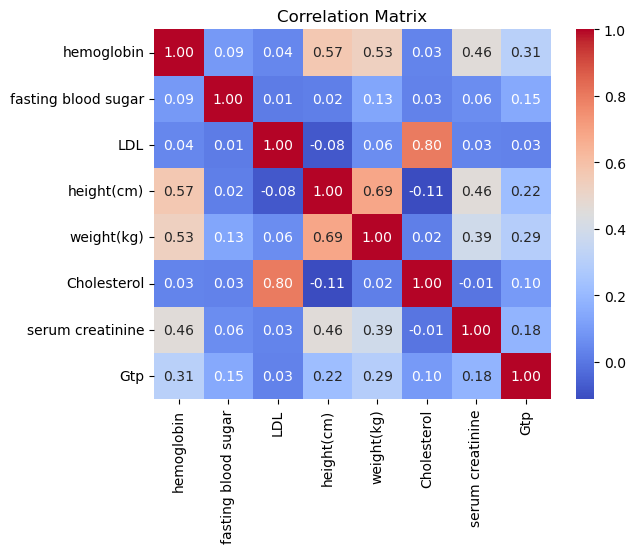

In [53]:
continuous_features = train_df.drop(columns = ['Unnamed: 0', 'hearing(right)', 'dental caries', 'smoking'])

# Visualize the correlation matrix using Seaborn's heatmap
sns.heatmap(continuous_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

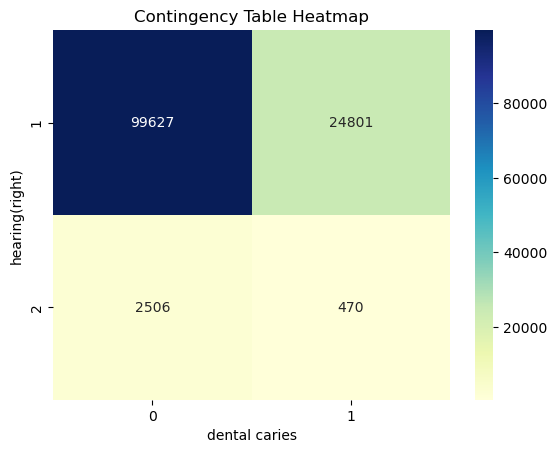

In [54]:
contingency_table = pd.crosstab(train_df['hearing(right)'], train_df['dental caries'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

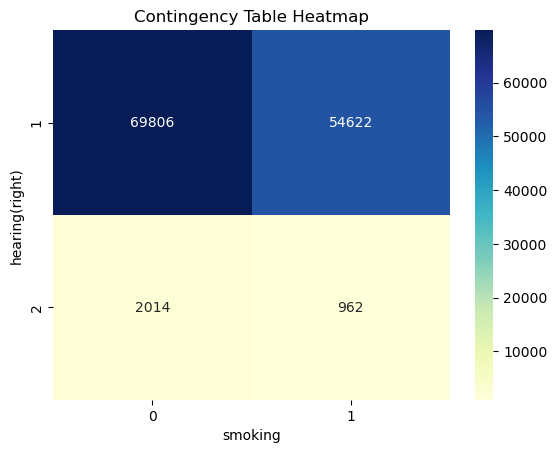

In [55]:
contingency_table = pd.crosstab(train_df['hearing(right)'], train_df['smoking'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

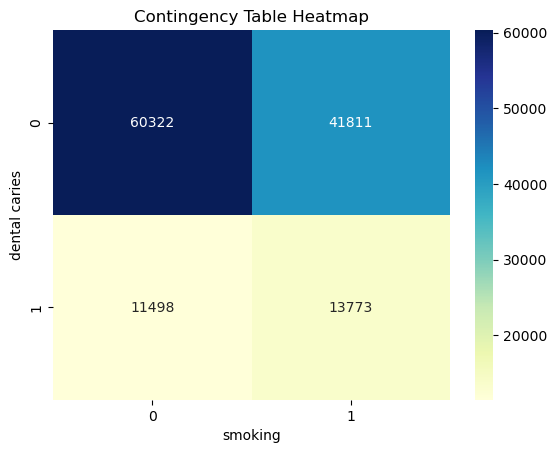

In [56]:
contingency_table = pd.crosstab(train_df['dental caries'], train_df['smoking'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

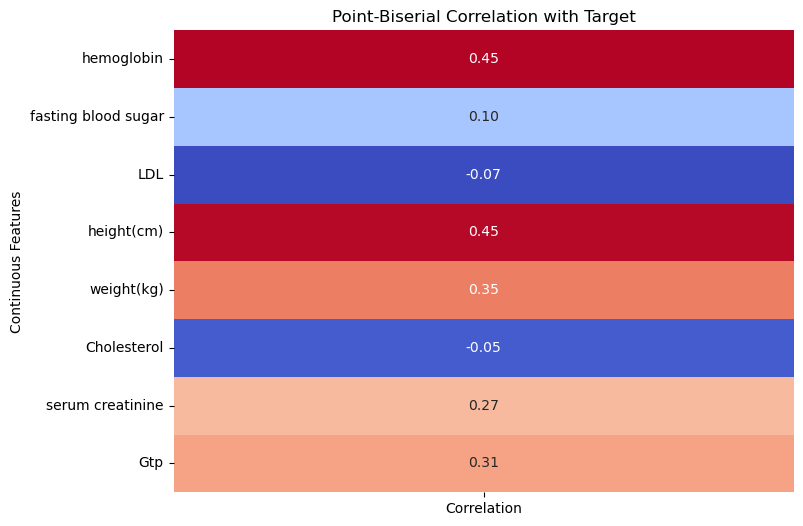

In [57]:
import scipy.stats as stats

continuous_features = ['hemoglobin','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']  # Add more features as needed
target_variable = 'smoking'  

correlation_values = []

for feature in continuous_features:
    corr, p_value = stats.pointbiserialr(train_df[target_variable], train_df[feature])
    correlation_values.append(corr)

# Create a DataFrame with correlation values
correlation_df = pd.DataFrame(data=correlation_values, index=continuous_features, columns=['Correlation'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Point-Biserial Correlation with Target')
plt.ylabel('Continuous Features')
plt.show()

<h3>LDL and Cholestrol:</h3>

There is a very high correlation between LDL and Cholestrol.
This makes sense because total cholestrol equals LDL + HDL.
Out of 150,000+ samples, there are 24 with LDL > Cholestrol, which is impossible.
This means that the dataset contains some incorrect readings for LDL and/or Cholestrol levels.

In [58]:
df_chol_LDL = train_df[train_df["LDL"] >= train_df["Cholesterol"]][["Cholesterol", "LDL"]]
print("Lenght Equals: ", len(df_chol_LDL))
print(df_chol_LDL)

Lenght Equals:  22
        Cholesterol   LDL
21041           176  1070
35901           181  1120
109197          245  1860
12273           252  1660
94519           197  1200
148944          167   167
15691           202  1220
100443          255  1660
60339           121   121
111220          207  1220
15898           139   790
32148            77  1220
141717          140   165
94365           172   220
138443          154   168
3004             91   156
55119           183  1070
120247          174  1200
52900           130   149
75992           152   216
92036           119   119
120029          174  1010


<h3>Categorical Plots:</h3>

In [59]:
sns.pairplot(pd.concat([continuous_features.reset_index(drop=True), train_df[["smoking"]].reset_index(drop=True)], axis=1), hue='smoking')
plt.show()

AttributeError: 'list' object has no attribute 'reset_index'

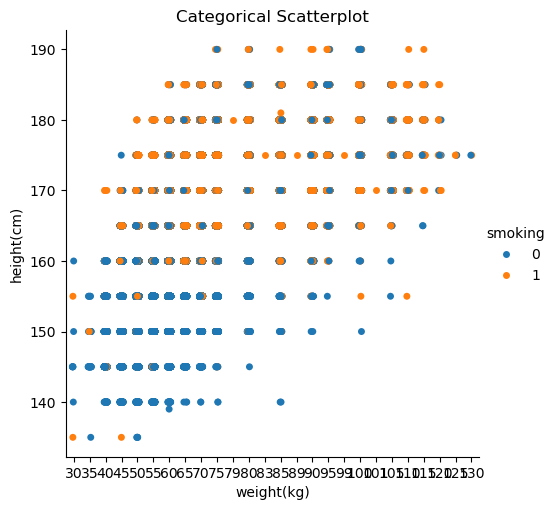

In [60]:
sns.catplot(x='weight(kg)', y='height(cm)', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

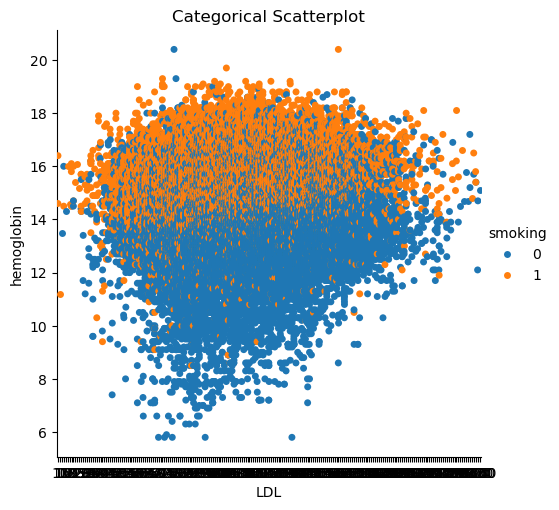

In [61]:
sns.catplot(x='LDL', y='hemoglobin', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

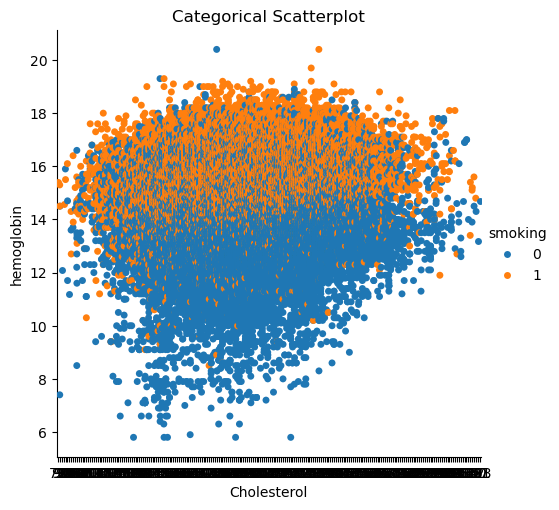

In [62]:
sns.catplot(x='Cholesterol', y='hemoglobin', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

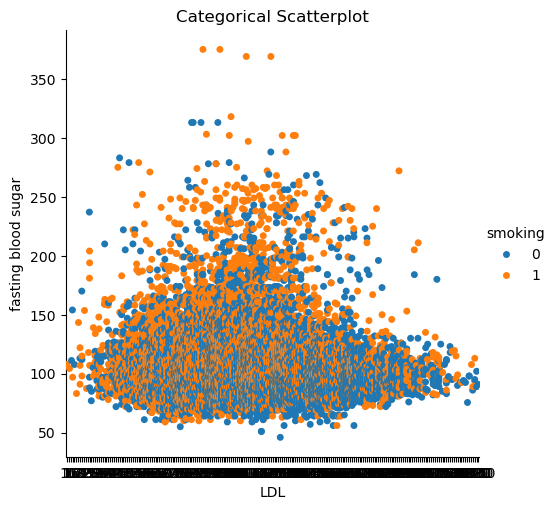

In [63]:
sns.catplot(x='LDL', y='fasting blood sugar', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

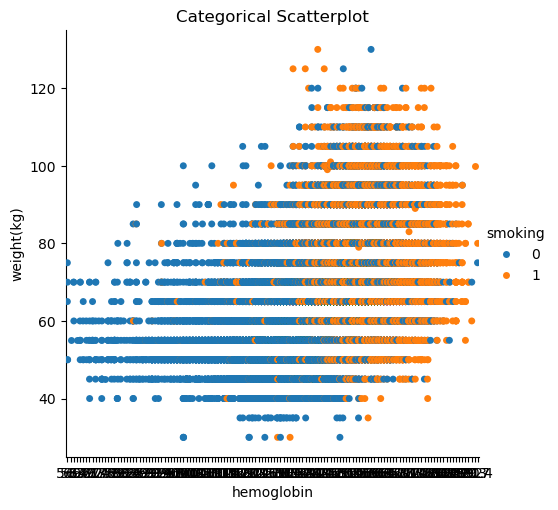

In [64]:
sns.catplot(x='hemoglobin', y='weight(kg)', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

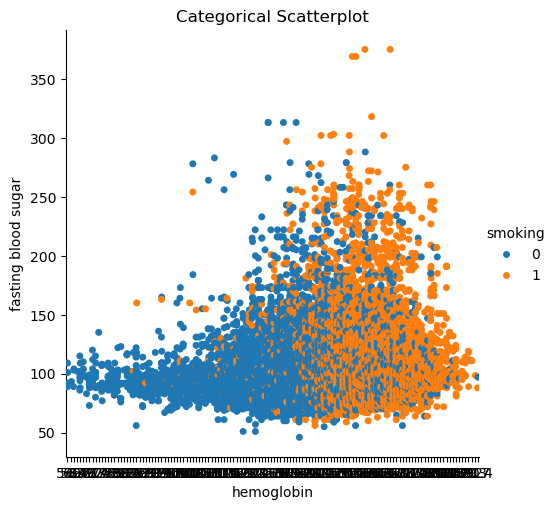

In [65]:
sns.catplot(x='hemoglobin', y='fasting blood sugar', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

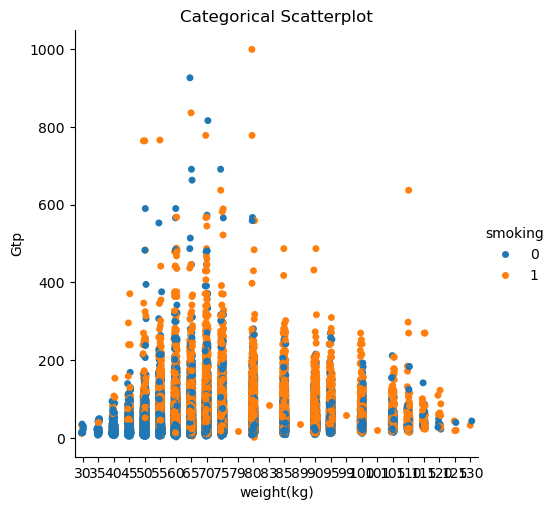

In [66]:
sns.catplot(x='weight(kg)', y='Gtp', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

<h3>Logistic Analysis </h3>

<Axes: >

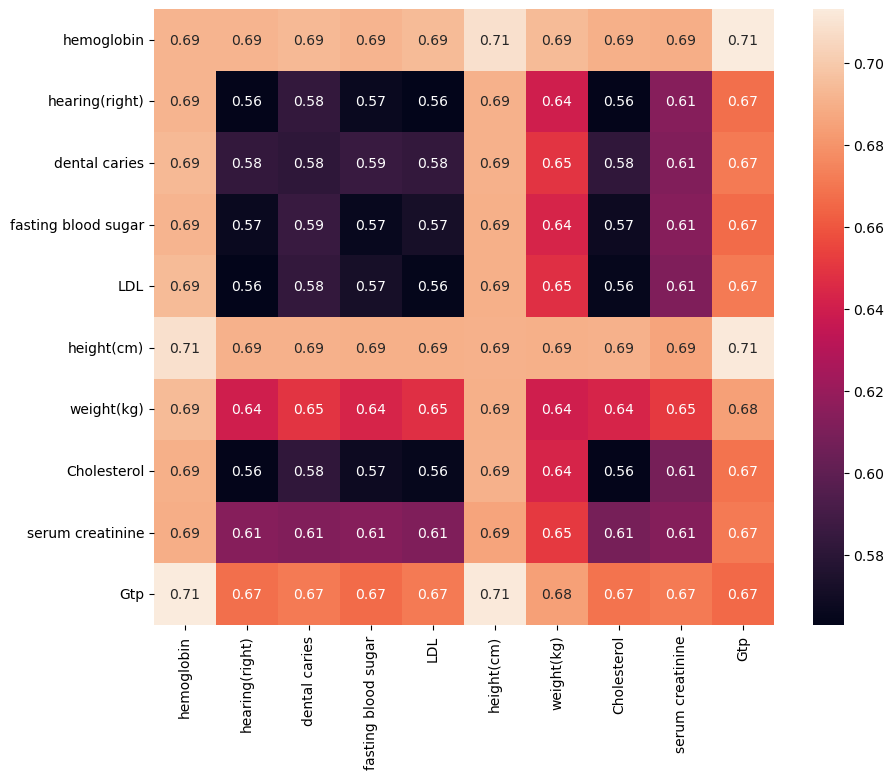

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


logistic_df = train_df.copy()

#Preprocessing
logistic_df['hemoglobin'] = (logistic_df['hemoglobin'] - logistic_df['hemoglobin'].mean()) / logistic_df['hemoglobin'].std()
logistic_df['hearing(right)'] = logistic_df['hearing(right)'] - 1
logistic_df['fasting blood sugar'] = (logistic_df['fasting blood sugar'] - logistic_df['fasting blood sugar'].mean()) / logistic_df['fasting blood sugar'].std()
logistic_df['LDL'] = (logistic_df['LDL'] - logistic_df['LDL'].mean()) / logistic_df['LDL'].std()
logistic_df['height(cm)'] = (logistic_df['height(cm)'] - logistic_df['height(cm)'].mean()) / logistic_df['height(cm)'].std()
logistic_df['weight(kg)'] = (logistic_df['weight(kg)'] - logistic_df['weight(kg)'].mean()) / logistic_df['weight(kg)'].std()
logistic_df['Cholesterol'] = (logistic_df['Cholesterol'] - logistic_df['Cholesterol'].mean()) / logistic_df['Cholesterol'].std()
logistic_df['serum creatinine'] = (logistic_df['serum creatinine'] - logistic_df['serum creatinine'].mean()) / logistic_df['serum creatinine'].std()
logistic_df['Gtp'] = (logistic_df['Gtp'] - logistic_df['Gtp'].mean()) / logistic_df['Gtp'].std()

 

#Performing Logistic Regression On every pair

features = ['hemoglobin','hearing(right)','dental caries','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']
matrix = np.zeros((len(features), len(features)))

for i in range(0,len(features)):
    for j in range(0, len(features)):
        if j >= i:
            logreg = LogisticRegression()
            logreg.fit(logistic_df[[features[i], features[j]]], logistic_df["smoking"])
            matrix[i][j] = accuracy_score(logistic_df["smoking"], logreg.predict(logistic_df[[features[i], features[j]]]))
        else:
            matrix[i][j] = matrix[j][i]


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, xticklabels=features, yticklabels=features)
